In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.font_manager
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
from matplotlib import cm
from shapely import geometry
from descartes import PolygonPatch
import math

from PIL import Image

In [2]:
from aux_func_States import getLegend
from aux_func_States import equals
from aux_func_States import getStates
from aux_func_States import getCompHybridVal

from plottingFunctions import *

In [3]:
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'

# Figure S1
## L, Ym and Yu functions - will need to adjust parameters

In [8]:
def M(u,nX,i,u0):
        return ((u/u0)**i)/((1+u/u0)**nX)
def combination(n,i):
        return math.factorial(n)/math.factorial(i)/math.factorial(n-i)
def L(nX,u,u0,li):
        total=0
        for i in range(int(nX+1)):
                total +=li[i]*combination(nX,i)*M(u,nX,i,u0)
        return total
def Yu(nX,u,u0,yui):
        total=0
        for i in range(int(nX+1)):
                total +=i*yui[i]*combination(nX,i)*M(u,nX,i,u0)
        return total
def Ym(nX,u,u0,ymi):
        total=0
        for i in range(int(nX+1)):
                total +=ymi[i]*combination(nX,i)*M(u,nX,i,u0)
        return total

In [9]:
def H(X,X0,l,nX):
        return (l+(1.-l)/(1.+(X/X0)**nX))

In [10]:
def P(n,u,u0,ymi,li):
    kmh=0.143
    return 1-L(n,u,u0,li)/(1.+Ym(n,u,u0,ymi)/kmh)

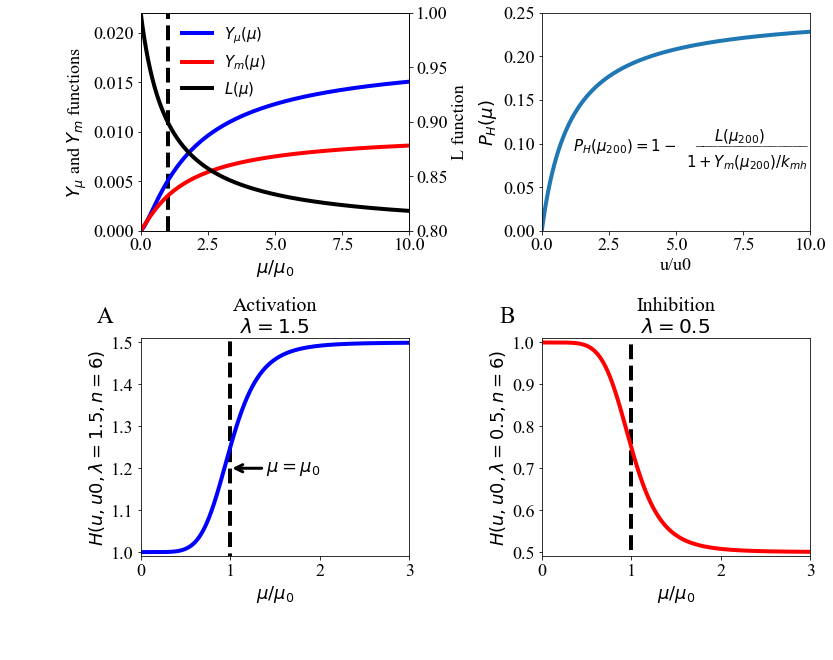

In [17]:
fig = plt.figure(figsize=(12,10))#figsize=(8,13))
gs1 = gridspec.GridSpec(3,3, height_ratios=[1,0.2,1.], width_ratios=[1.,0.2,1])
#gs1.update(left=0.05, right=4, wspace=0.05,hspace=0.05,top=2,bottom=0)
fs =18
matplotlib.rcParams.update({'font.size':fs})


ax1 = plt.subplot(gs1[0,0])

u0 = 10000.
nu= 2#6.
x = (np.arange(0,100000)).astype(float)
li = [1.0,0.9,0.8]#[1.,0.6,0.3,0.1,0.05,0.05,0.05]
yui=[0.,0.001,0.009]#[0,0.005,0.05,0.5,0.5,0.5,0.5]
ymi=[0,0.002,0.01]#[0,0.04, 0.2,1.0,1., 1.,1.]


yyu = Yu(nu,x,u0,yui)
yym = Ym(nu,x,u0,ymi)
llu = L(nu,x,u0,li)

l1=ax1.plot(x/10000.,yyu,label='$Y_{\mu}(\mu)$',linewidth=4,color='b')
l2=ax1.plot(x/10000.,yym,label='$Y_m(\mu)$',linewidth=4,color='r')
ax1.vlines(1.,0,2.8,linestyle='--',lw=4)
ax1.set_xlabel("$\mu/\mu_0$")
ax1.set_ylabel("$Y_\mu$ and $Y_m$ functions")
ax1.set_xlim(0,10)
ax1.set_ylim(0,0.022)
ax2 = ax1.twinx()
l3=ax2.plot(x/10000.,llu,label='$L(\mu)$',linewidth=4,color='k')
ax2.set_ylabel("L function")
ax2.set_ylim(0.8,1.0)
lns = l1+l2+l3
labs = [l.get_label() for l in lns]
ax2.legend(lns,labs,frameon=False,loc=(0.13,0.58),fontsize=15)
ax1.annotate('$\mu=\mu_0$', fontsize=fs,xy=(1,2.5), xycoords="data",xytext=(1.7,2.5), textcoords="data",va="center", ha='center',arrowprops=dict(arrowstyle="->",lw=3))

#######################################################
#######################################################
#######################################################
li = [1.,0.9,0.8]#[1.,0.6,0.3,0.1,0.05,0.05,0.05]
yui=[0.0,0.001,0.009]#[0,0.005,0.05,0.5,0.5,0.5,0.5]
ymi=[0.0,0.002,0.01]
x = np.arange(0,100000,1)
x0=10000.
y = P(2,x,x0,ymi,li)

ax1 = plt.subplot(gs1[0,2])
ax1.plot(x/x0,y,lw=4)
ax1.set_xlabel("u/u0")
ax1.set_ylabel("$P_H(\mu)$")
ax1.set_xlim(0,10)
ax1.set_ylim(0.,0.25)

fs=15
ax1.text(0.5, .43, '$P_H(\mu_{200})=1-$',transform=ax1.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs)
ax1.text(0.83, .48, '$ L(\mu_{200})$',transform=ax1.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs)
ax1.text(0.99, .45, '_______________',transform=ax1.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs)
ax1.text(0.99, .36, '$1+Y_m(\mu_{200})/k_{mh}$',transform=ax1.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs)


####################################
##################################

ax1 = plt.subplot(gs1[2,0])
ax2 = plt.subplot(gs1[2,2])
fs=18

u0 = 10000.
nu= 6.
x = (np.arange(0,100000)).astype(float)

yA = H(x,u0,1.5,nu)
yI = H(x,u0,0.5,nu)

l1=ax1.plot(x/10000.,yA,label='$H(u,u0,1.5,n)$',linewidth=4,color='b')
l2=ax2.plot(x/10000.,yI,label='$H(u,u0,0.5,n)$',linewidth=4,color='r')
ax1.vlines(1.,0,2.8,linestyle='--',lw=4)
ax2.vlines(1.,0,2.8,linestyle='--',lw=4)
ax1.set_xlabel("$\mu/\mu_0$")
ax2.set_xlabel("$\mu/\mu_0$")
ax1.set_ylabel("$H(u,u0,\lambda=1.5,n=6)$")
ax2.set_ylabel("$H(u,u0,\lambda=0.5,n=6)$")
ax1.set_xlim(0,3)
ax2.set_xlim(0,3)
ax1.set_ylim(0.99,1.51)
ax2.set_ylim(0.49,1.01)
ax1.set_title("Activation\n$\lambda=1.5$",fontsize=fs+2)
ax2.set_title("Inhibition\n$\lambda=0.5$",fontsize=fs+2)

ax1.text(-0.1, 1.15, 'A',transform=ax1.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
ax2.text(-0.1, 1.15, 'B',transform=ax2.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)

ax1.annotate('$\mu=\mu_0$', fontsize=fs,xy=(1,1.2), xycoords="data",xytext=(1.7,1.2), textcoords="data",va="center", ha='center',arrowprops=dict(arrowstyle="->",lw=3))


fig.savefig("Figure_S1.png",bbox_inches='tight')#,dpi=300)

# Figure S2
### Comparison of how many initial conditions needed if the systems are inactive or coupled

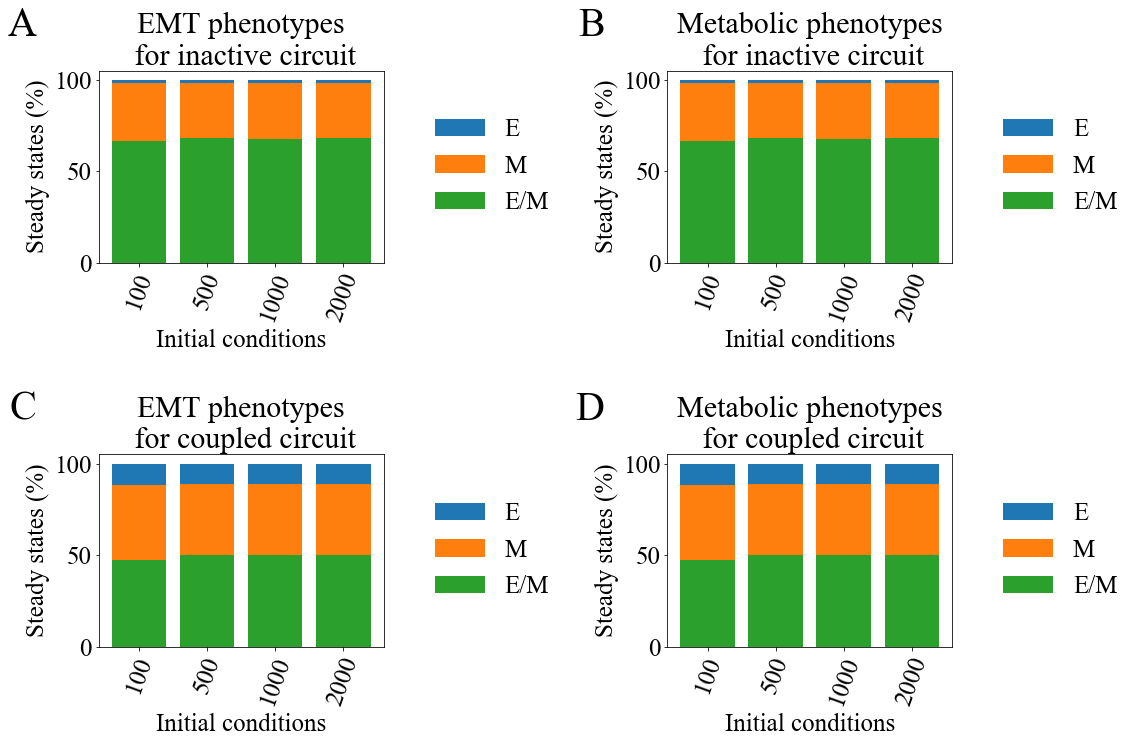

In [18]:
fig = plt.figure(figsize=(3,4))#figsize=(8,13))
gs1 = gridspec.GridSpec(3,3, height_ratios=[1,0.9,1.], width_ratios=[1.,0.9,1.])
gs1.update(left=0.05, right=4, wspace=0.05,hspace=0.05,top=2,bottom=0)
fs =25
matplotlib.rcParams.update({'font.size':fs})

ax1c=plt.subplot(gs1[0,0])
df1c = pd.read_csv("data/data_1c.txt")
plotICS(ax1c,df1c,'E','M','EM',fs=fs)
ax1c.set_title('EMT phenotypes\n for inactive circuit')
ax1c.text(-0.22, 1.33, 'A',transform=ax1c.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+15)

ax1d=plt.subplot(gs1[0,2])
plotICS(ax1d,df1c,'O','W','WO',fs=fs)
ax1d.set_title('Metabolic phenotypes\n for inactive circuit')
ax1d.text(-0.22, 1.33, 'B',transform=ax1d.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+15)


####

df1d = pd.read_csv("data/data_1d.txt")
ax1c=plt.subplot(gs1[2,0])
plotICS(ax1c,df1d,'E','M','EM',fs=fs)
ax1c.set_title('EMT phenotypes\n for coupled circuit')
ax1c.text(-0.22, 1.33, 'C',transform=ax1c.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+15)

ax1d=plt.subplot(gs1[2,2])
plotICS(ax1d,df1d,'O','W','WO',fs=fs)
ax1d.set_title('Metabolic phenotypes\n for coupled circuit')
ax1d.text(-0.22, 1.33, 'D',transform=ax1d.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+15)

fig.savefig("Figure_S2.png",bbox_inches='tight')#,dpi=300)

# Figure S3

coupled states of inactive circuit

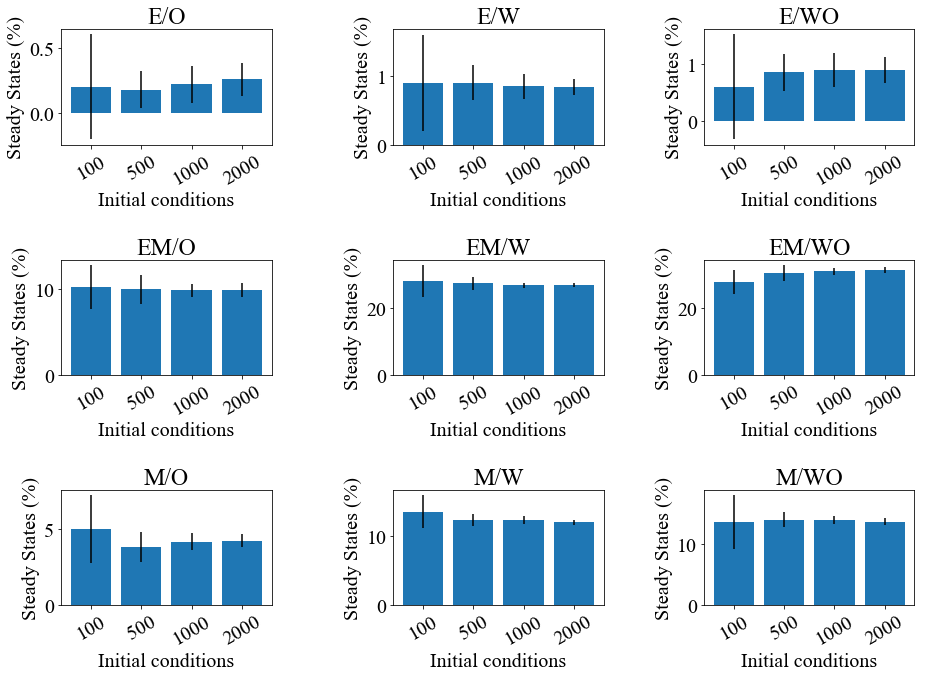

In [11]:
fig = plt.figure(figsize=(3,4))#figsize=(8,13))
gs1 = gridspec.GridSpec(5,5, height_ratios=[1,0.9,1.,0.9,1.], width_ratios=[1.,0.5,1.,0.4,1])
gs1.update(left=0.05, right=4, wspace=0.05,hspace=0.05,top=2,bottom=0)
fs =20
matplotlib.rcParams.update({'font.size':fs})
df = pd.read_csv("data/data_1c.txt")
plotICS_coupled(gs1,df,5)

fig.savefig("Figure_S3.png",bbox_inches='tight')#,dpi=300)

# Figure S4

coupled states  of coupled circuit

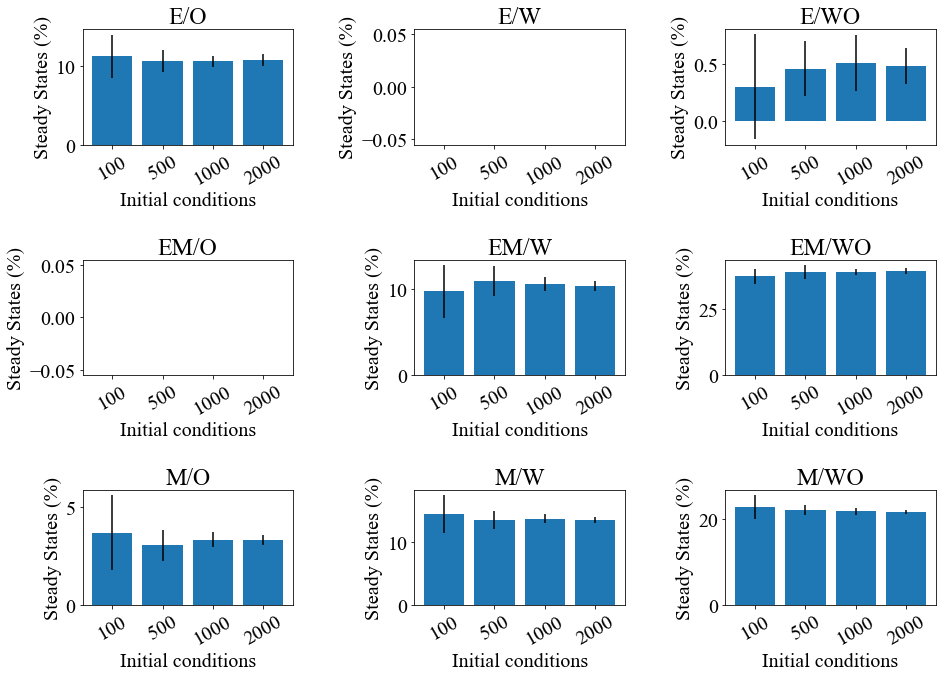

In [19]:
fig = plt.figure(figsize=(3,4))#figsize=(8,13))
gs1 = gridspec.GridSpec(5,5, height_ratios=[1,0.9,1.,0.9,1.], width_ratios=[1.,0.5,1.,0.4,1])
gs1.update(left=0.05, right=4, wspace=0.05,hspace=0.05,top=2,bottom=0)
fs =20
matplotlib.rcParams.update({'font.size':fs})
df = pd.read_csv("data/data_s1.txt")

plotICS_coupled(gs1,df,5)

fig.savefig("Figure_S4.png",bbox_inches='tight')#,dpi=300)

# Figure  S5

data/data_s2a $\Lambda_{\mu_{34}->mtROS}$


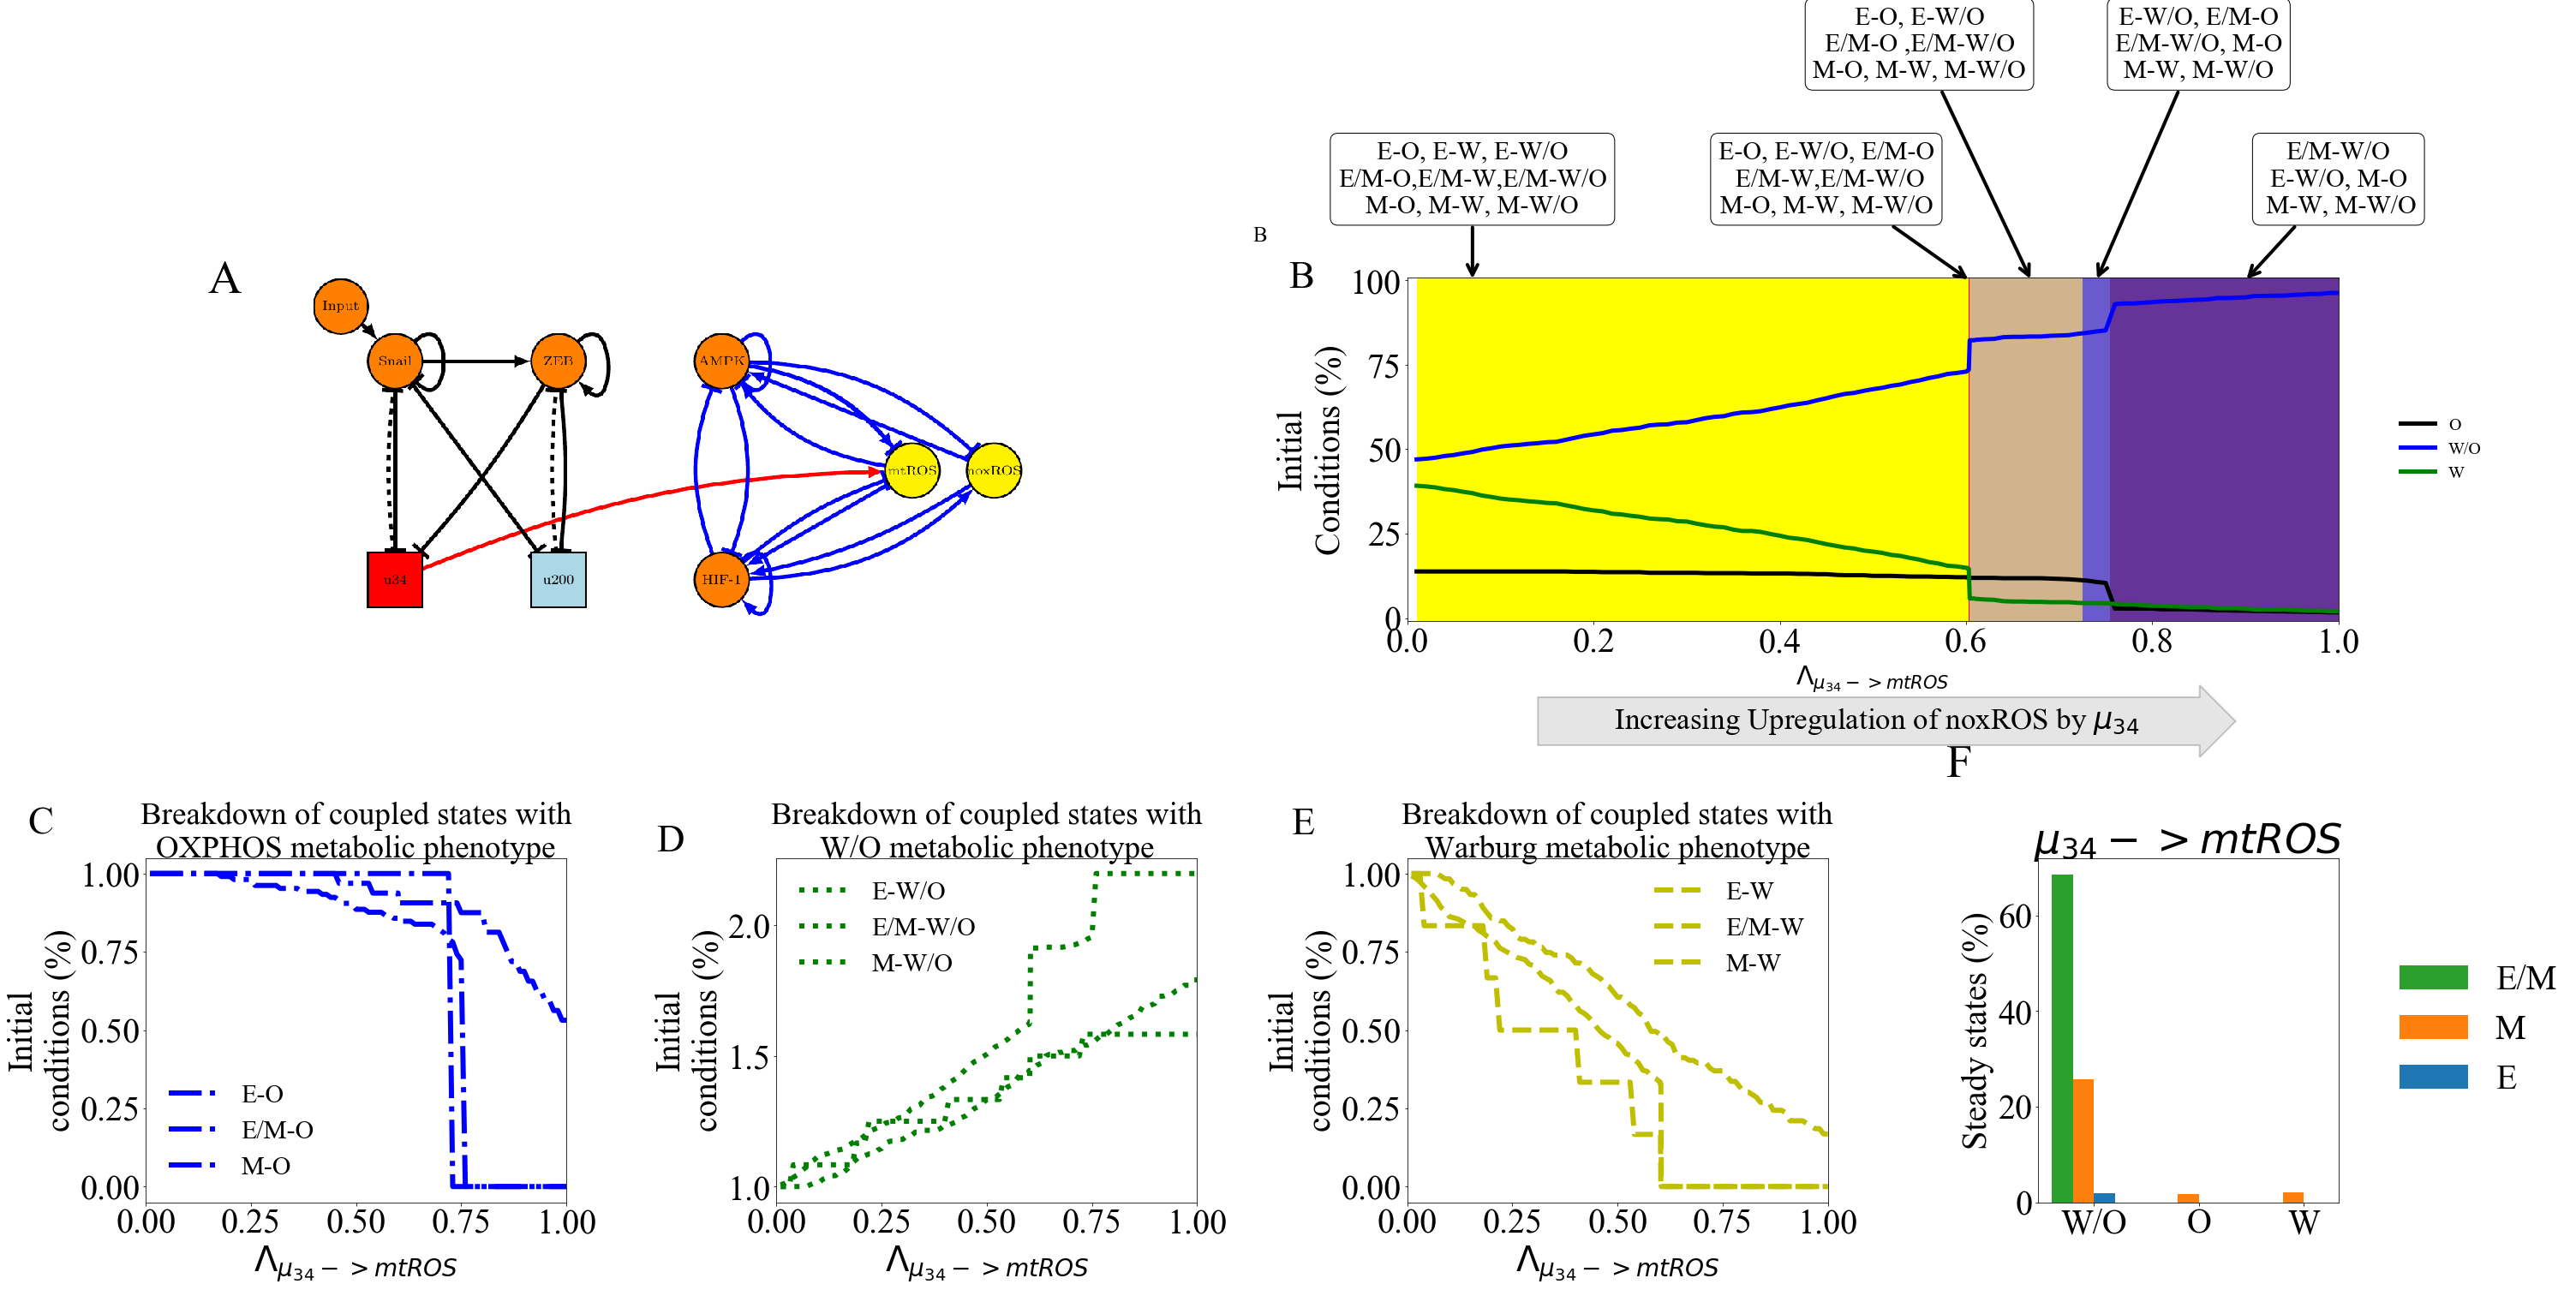

In [20]:
fig = plt.figure(figsize=(9,5))
gs1 = gridspec.GridSpec(3,7, height_ratios=[1,0.6,1], width_ratios=[0.7,0.3,0.7,0.3,0.7,0.3,0.5])
gs1.update(left=0.05, right=4, wspace=0.05,hspace=0.05,top=3.,bottom=0)
fs =40
matplotlib.rcParams.update({'font.size':fs})
matplotlib.rcParams.update({'hatch.linewidth':3})
##########
##########

ax2z = plt.subplot(gs1[0,0:3])
img = Image.open('networks/singleLink_u3m.png')
img.resize((1,1))
a = np.asarray(img)
ax2z.imshow(a)
ax2z.axis("off")
ax2z.text(-0.1, 1.05, 'A',transform=ax2z.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+15)

######################
######################
######################

##########
##########
ax2b = plt.subplot(gs1[0,4:])
labs = colorMap("data/data_s2a_legend.txt")
df = pd.read_csv("data/data_s2a.txt")

ax2b.text(-0.1, 1.05, 'B',transform=ax2b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)

plotPhaseICS(ax2b,'B','data/data_s2a','MR',xlabel="$\Lambda_{\mu_{34}->mtROS}$",xlim=[0,1])

ax2b.annotate('E-O, E-W, E-W/O\nE/M-O,E/M-W,E/M-W/O\nM-O, M-W, M-W/O', fontsize=30,xy=(0.07, 100), xycoords="data",xytext=(0.07,130), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-O, E-W/O, E/M-O\n E/M-W,E/M-W/O\nM-O, M-W, M-W/O', fontsize=30,xy=(0.604, 100), xycoords="data",xytext=(0.45,130), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-O, E-W/O\nE/M-O ,E/M-W/O\nM-O, M-W, M-W/O', fontsize=30,xy=(0.67, 100), xycoords="data",xytext=(0.55,170), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-W/O, E/M-O\nE/M-W/O, M-O\nM-W, M-W/O', fontsize=30,xy=(0.74, 100), xycoords="data",xytext=(0.85,170), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E/M-W/O\nE-W/O, M-O\n M-W, M-W/O', fontsize=30,xy=(0.9, 100), xycoords="data",xytext=(1.0,130), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.text(0,0.752,' ')

t=ax2b.text(0.15, -35, "         Increasing Upregulation of noxROS by $\mu_{34}$          ",
            size=fs-5,verticalalignment='bottom', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=0)

#####################
df2b = pd.read_csv("data/data_s2a_ics.txt")
ax2e = plt.subplot(gs1[2,0])
ax2e.text(-0.22, 1.15, 'C',transform=ax2e.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
plotBreakdown(ax2e,df2b,'O',fs=fs)
ax2e.set_xlabel("$\Lambda_{\mu_{34}->mtROS}$")
ax2e.set_xlim(0,1)

ax2d = plt.subplot(gs1[2,2])
ax2d.text(-0.22, 1.1, 'D',transform=ax2d.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
plotBreakdown(ax2d,df2b,'WO',fs=fs)
ax2d.set_xlabel("$\Lambda_{\mu_{34}->mtROS}$")
ax2d.set_xlim(0,1)

ax2e = plt.subplot(gs1[2,4])
ax2e.text(-0.22, 1.15, 'E',transform=ax2e.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
plotBreakdown(ax2e,df2b,'W',fs=fs)
ax2e.set_xlabel("$\Lambda_{\mu_{34}->mtROS}$")
ax2e.set_xlim(0,1)

####
ax1d=plt.subplot(gs1[2,6])
plotNumberBreakdown(ax1d,df2b,'min','MR',titleSub='$\mu_{34}->mtROS$',fs=fs)
ax1d.text(-0.22, 1.33, 'F',transform=ax1d.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+15)

fig.savefig("Figure_S5.png",bbox_inches='tight')#,dpi=300)

# Figure S6

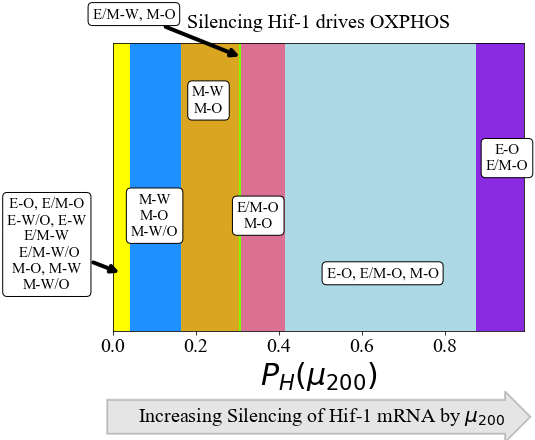

In [21]:
fig = plt.figure()#figsize=(3,5))
gs1 = gridspec.GridSpec(1,1)#, height_ratios=[1], width_ratios=[1,0.6,0.49,0.02,0.49,0.8,0.49,0.02,0.49])
gs1.update(left=0.05, right=1, wspace=0.,hspace=0.0,top=1.,bottom=0)
fs =20
matplotlib.rcParams.update({'font.size':fs})
matplotlib.rcParams.update({'hatch.linewidth':3})

######################
######################
ax2a = plt.subplot(gs1[0,0])
ax2a.text(0.5,1.1, 'Silencing Hif-1 drives OXPHOS',transform=ax2a.transAxes,verticalalignment='top', 
          horizontalalignment='center',color='black', fontsize=fs)
##########
plotPhases(ax2a,'',"data_uh_coupled","$\lambda_{}$","$\lambda_{}$",reduced=False,ylim=[0.5,1],xlim=(0,0.99),noEMWO=True)#,legend=True,legendLoc=(2,1))
ax2a.annotate('E-O\nE/M-O', fontsize=fs-5,xy=(0.95, 0.8), xycoords="data",xytext=(0.95,0.8), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))#,arrowprops=dict(arrowstyle="->",lw=4))
ax2a.annotate('E-O, E/M-O, M-O', fontsize=fs-5,xy=(0.65, 0.6), xycoords="data",xytext=(0.65,0.6), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))#,arrowprops=dict(arrowstyle="->",lw=4))
ax2a.annotate('E/M-O\nM-O', fontsize=fs-5,xy=(0.95, 0.7), xycoords="data",xytext=(0.35,0.7), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))#,arrowprops=dict(arrowstyle="->",lw=4))
ax2a.annotate('E/M-W, M-O', fontsize=fs-5,xy=(0.31, 0.975), xycoords="data",xytext=(0.05,1.05), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2a.annotate('M-W\nM-O', fontsize=fs-5,xy=(0.23, 0.9), xycoords="data",xytext=(0.23,0.9), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))#,arrowprops=dict(arrowstyle="->",lw=4))
ax2a.annotate('M-W\nM-O\nM-W/O', fontsize=fs-5,xy=(0.1, 0.7), xycoords="data",xytext=(0.1,0.7), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))#,arrowprops=dict(arrowstyle="->",lw=4))
ax2a.annotate('E-O, E/M-O\nE-W/O, E-W\nE/M-W\n E/M-W/O\nM-O, M-W\nM-W/O', fontsize=fs-5,xy=(0.02, 0.6), xycoords="data",xytext=(-.16,0.65), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))

ax2a.set_xlabel("$P_H(\mu_{200})$")
ax2a.set_yticks([])
ax2a.set_ylabel("")
t=ax2a.text(0., .37, "     Increasing Silencing of Hif-1 mRNA by $\mu_{200}$  ",
            size=fs,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=0)
ax2a.text(0.5,0.33,' ')
######################



fig.savefig("Figure_S6.png",bbox_inches='tight')#,dpi=300)
plt.show()
plt.close()

# Figure S7
### noxRos vs  mtROS

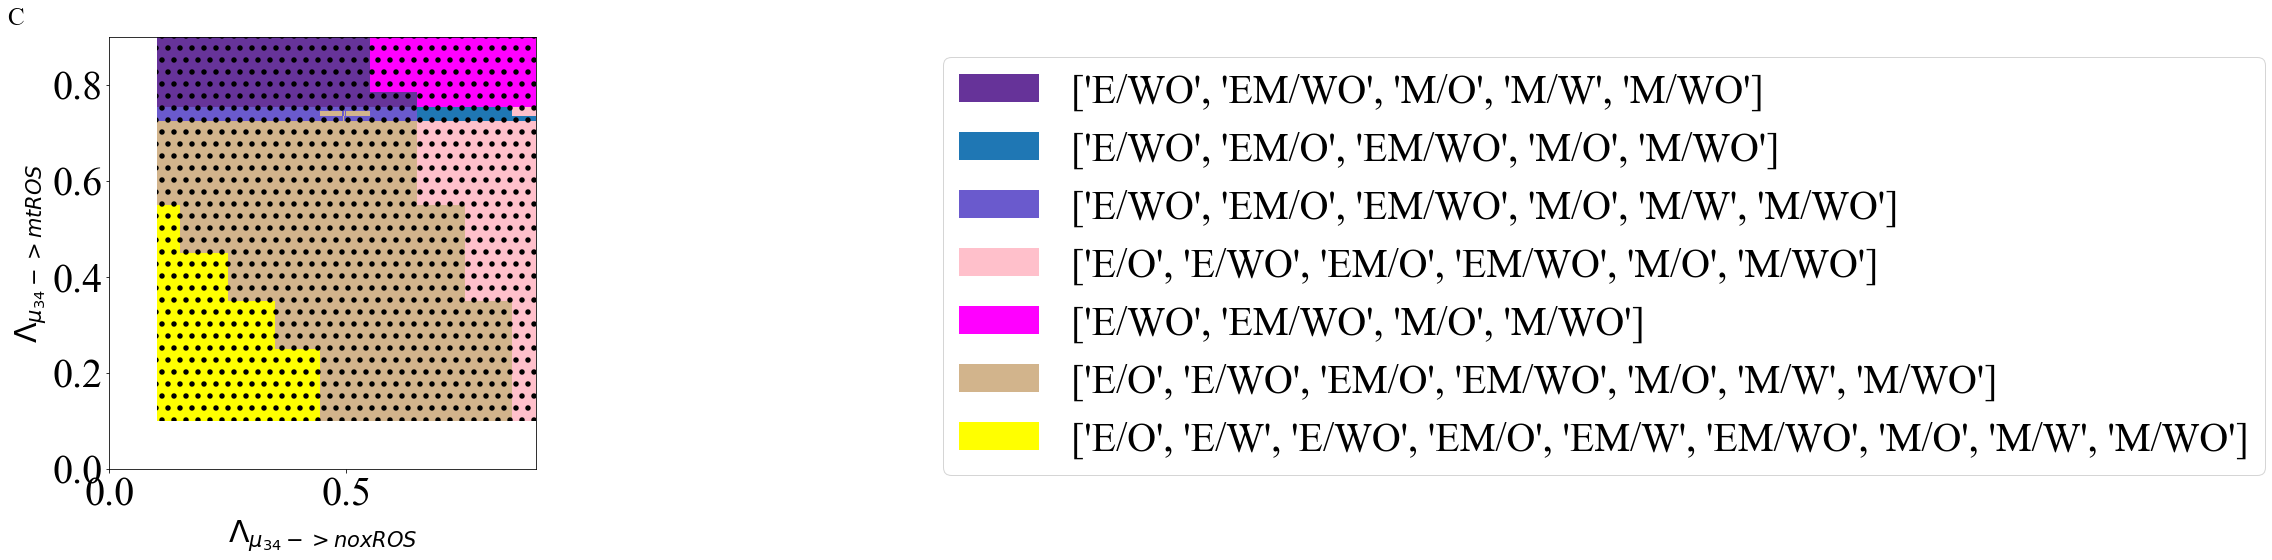

In [15]:
fig = plt.figure(figsize=(1.5,2))
gs1 = gridspec.GridSpec(1,1)#, height_ratios=[1], width_ratios=[1,0.3,1])
gs1.update(left=0.05, right=4, wspace=0.05,hspace=0.05,top=3.,bottom=0)
fs =40
matplotlib.rcParams.update({'font.size':fs})
matplotlib.rcParams.update({'hatch.linewidth':3})
##########

##########
##########
ax2b = plt.subplot(gs1[0,0])
plotPhases(ax2b,'C',"data/data_u3n_u3m","$\Lambda_{\mu_{34}->noxROS}$","$\Lambda_{\mu_{34}->mtROS}$",reduced=False,xlim=[0,0.9],ylim=[0,0.9],legend=True)

#ax2b = plt.subplot(gs1[0,2])
#plotEMWOheatmap(ax2b,'D',"data/data_u3n_u3m","$\lambda_{}$","$\lambda_{}$")

fig.savefig("Figure_S9.png",bbox_inches='tight')#,dpi=300)

# Figure S10
### noxRos vs UH and mtROS vs UH

(['bisque', 'blueviolet', 'darkorange', 'palevioletred', 'lightblue', 'goldenrod', 'mediumturquoise', 'dodgerblue', 'chartreuse', 'darkmagenta'], [['E/O'], ['E/O', 'EM/O'], ['M/O'], ['EM/O', 'M/O'], ['E/O', 'EM/O', 'M/O'], ['M/O', 'M/W'], ['M/W', 'M/WO'], ['M/O', 'M/W', 'M/WO'], ['M/WO'], ['M/O', 'M/WO']])


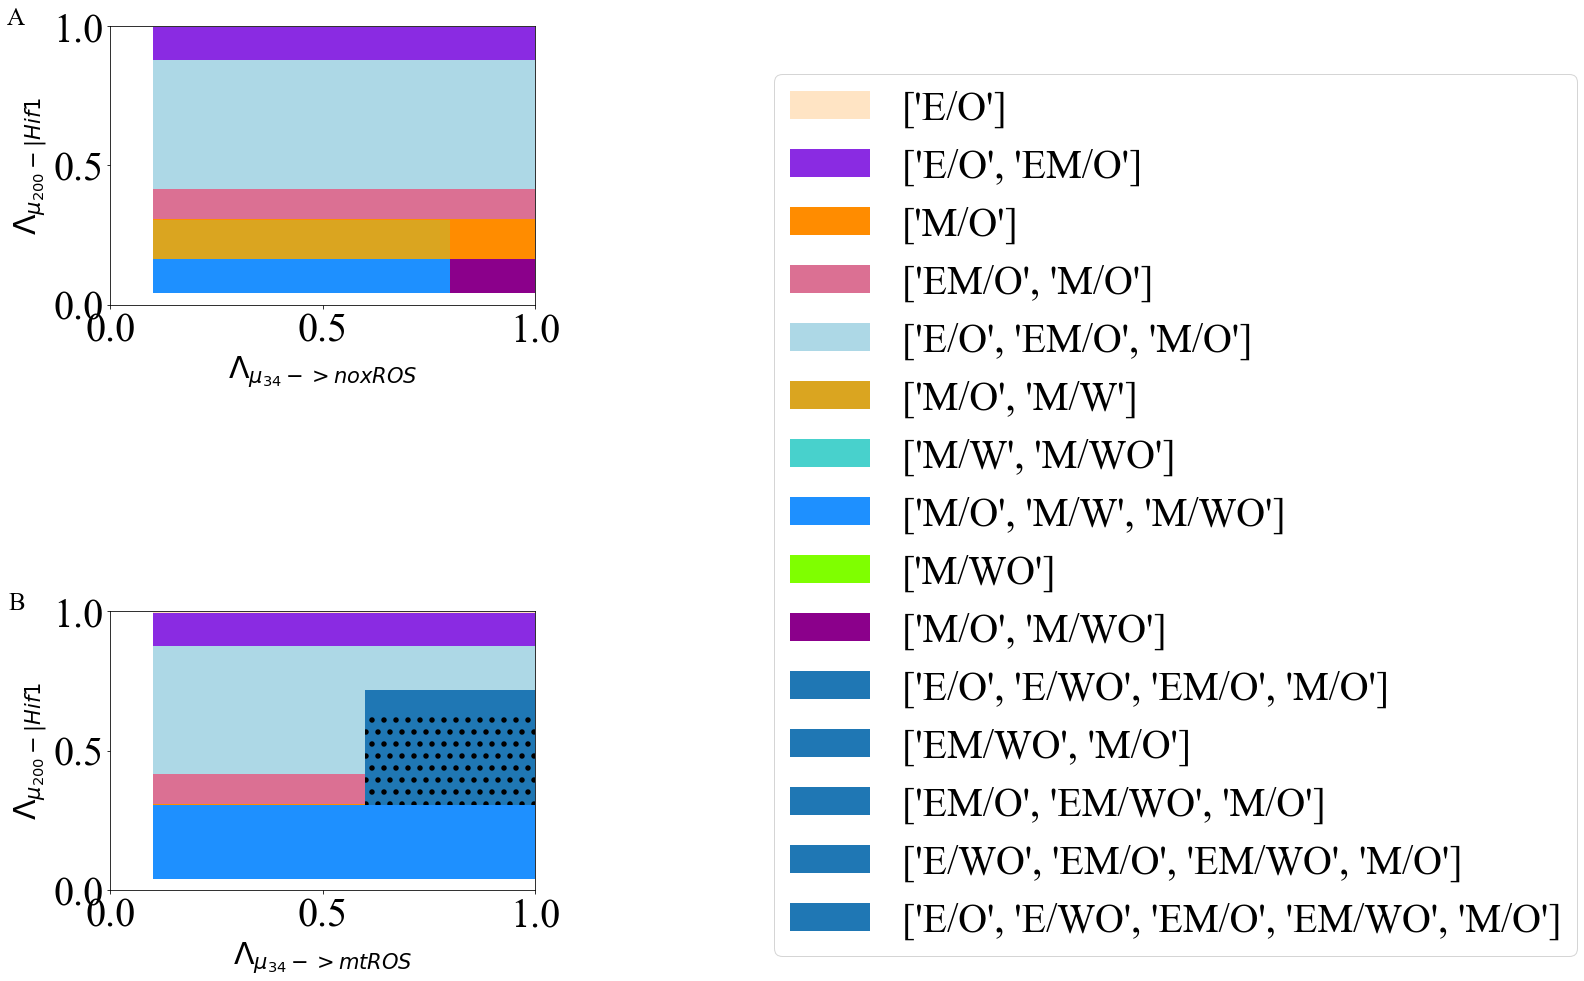

In [16]:
fig = plt.figure(figsize=(2,4))
gs1 = gridspec.GridSpec(3,1)#, height_ratios=[1,0.3,1], width_ratios=[1,0.3,1])
gs1.update(left=0.05, right=3, wspace=0.05,hspace=0.05,top=3.,bottom=0)
fs =40
matplotlib.rcParams.update({'font.size':fs})
matplotlib.rcParams.update({'hatch.linewidth':3})
##########

##########
##########
ax2b = plt.subplot(gs1[0,0])
l1=plotPhases(ax2b,'A',"data/data_uh_u3n","$\Lambda_{\mu_{34}->noxROS}$","$\Lambda_{\mu_{200}-|Hif1}$",reduced=False,legend='return',xlim=(0,1),ylim=(0,1))
##########
#ax2b = plt.subplot(gs1[0,2])
#plotEMWOheatmap(ax2b,'B',"data/data_uh_u3n","$\lambda_{}$","$\lambda_{}$")



ax2b = plt.subplot(gs1[2,0])
l2=plotPhases(ax2b,'B',"data/data_uh_u3m","$\Lambda_{\mu_{34}->mtROS}$","$\Lambda_{\mu_{200}-|Hif1}$",reduced=False,legend='return',xlim=(0,1),ylim=(0,1))
#ax2b = plt.subplot(gs1[2,2])
#plotEMWOheatmap(ax2b,'D',"data/data_uh_u3m","$\lambda_{}$","$\lambda_{}$")

print l1
checks=[]
legend_elements=[]
for i in range(len(l1[1])):
    item = l1[1][i]
    col=l1[0][i]
    if item not in checks:
        legend_elements+=[ Patch(facecolor=col,label=item)]
        checks+=[item]
for i in range(len(l2[1])):
    item = l2[1][i]
    col=l2[0][i]
    if item not in checks:
        legend_elements+=[ Patch(facecolor=col,label=item)]
        checks+=[item]

        
ax2b.legend(handles=legend_elements, bbox_to_anchor=(3.5,3))


fig.savefig("Figure_S10.png",bbox_inches='tight')#,dpi=300)

# Figure S11  FIX!!!

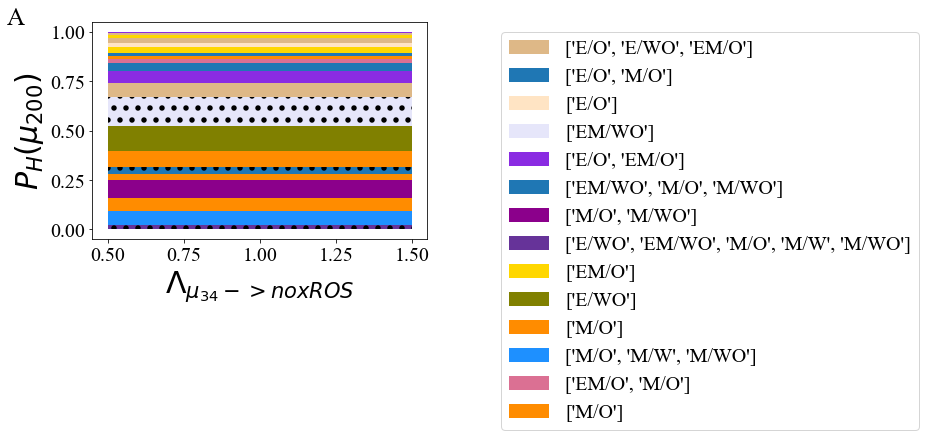

In [17]:

fig = plt.figure()#figsize=(2,4))
gs1 = gridspec.GridSpec(1,1)#, height_ratios=[1,0.3,1], width_ratios=[1,0.3,1])
fs =20
matplotlib.rcParams.update({'font.size':fs})
matplotlib.rcParams.update({'hatch.linewidth':3})
##########

##########
##########
ax2b = plt.subplot(gs1[0,0])
l1=plotPhases(ax2b,'A',"data/data_3_MR3_single","$\Lambda_{\mu_{34}->noxROS}$","$P_H(\mu_{200})$",reduced=False,legend=True,legendLoc=(2.5,1))
##########

fig.savefig("Figure_S11.png",bbox_inches='tight')#,dpi=300)

# Figure S12

HS

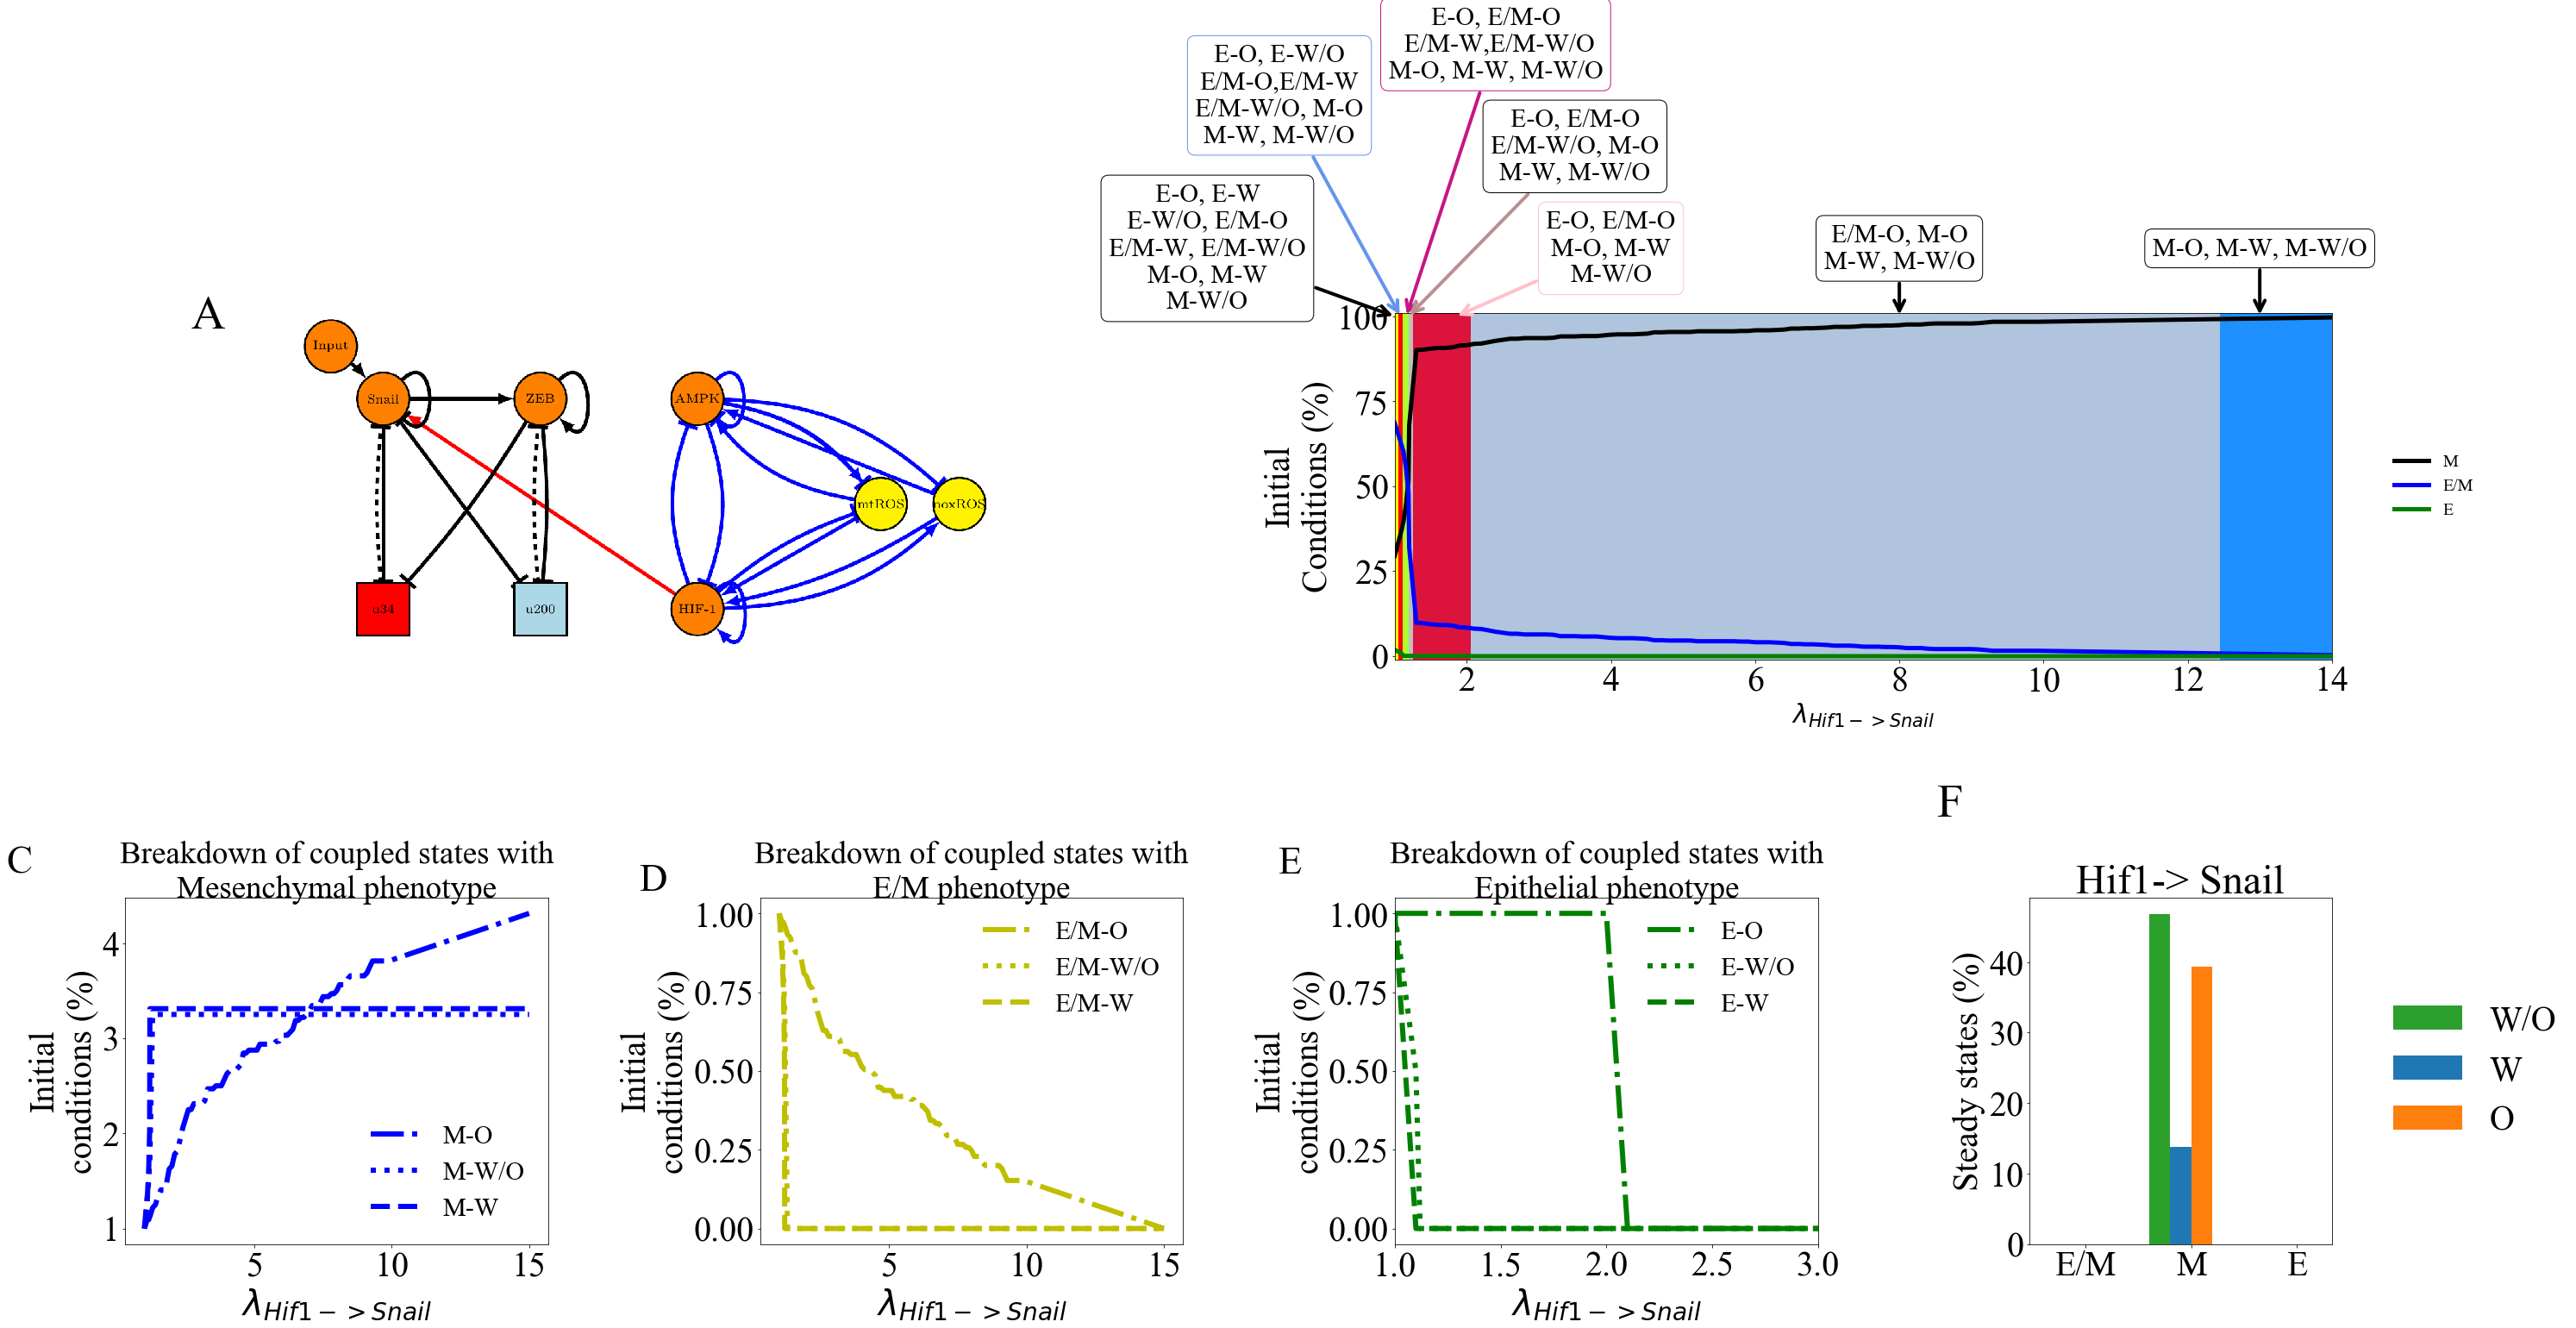

In [18]:
#labelPlot={'c':'AS','d':'AZ','e':'Au','f':'Hu','g':'HS','h':'input'}
#for el in ['c','d','e','f','g','h']:
fig = plt.figure(figsize=(9,5))
gs1 = gridspec.GridSpec(3,7, height_ratios=[1,0.6,1], width_ratios=[0.7,0.3,0.7,0.3,0.7,0.3,0.5])
gs1.update(left=0.05, right=4, wspace=0.05,hspace=0.05,top=3.,bottom=0)
fs =40
matplotlib.rcParams.update({'font.size':fs})
matplotlib.rcParams.update({'hatch.linewidth':3})
    ##########
    ##########

ax2z = plt.subplot(gs1[0,:3])
img = Image.open('networks/singleLink_HS.png')
img.resize((1,1))
a = np.asarray(img)
ax2z.imshow(a)
ax2z.axis("off")
ax2z.text(-0.1, 1.05, 'A',transform=ax2z.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+15)


el = 'g'
######################
######################
######################
ax2b = plt.subplot(gs1[0,4:])
plotPhaseICS(ax2b,'B',"data/data_s2"+el,'EMT',xlabel="$\lambda_{Hif1-> Snail}$",xlim=[1,14])
ax2b.annotate('E-O, E-W\nE-W/O, E/M-O\nE/M-W, E/M-W/O\nM-O, M-W\nM-W/O', fontsize=30,xy=(1, 100), xycoords="data",xytext=(-1.6,120), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-O, E/M-O\n E/M-W,E/M-W/O\nM-O, M-W, M-W/O', fontsize=30,xy=(1.16, 100), xycoords="data",xytext=(2.4,180), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w",ec='mediumvioletred'),arrowprops=dict(arrowstyle="->",lw=4,color='mediumvioletred'))
ax2b.annotate('E-O, E-W/O\nE/M-O,E/M-W\nE/M-W/O, M-O\nM-W, M-W/O', fontsize=30,xy=(1.08, 100), xycoords="data",xytext=(-0.6,165), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w",ec='cornflowerblue'),arrowprops=dict(arrowstyle="->",lw=4,color='cornflowerblue'))
ax2b.annotate('E-O, E/M-O\nE/M-W/O, M-O\nM-W, M-W/O', fontsize=30,xy=(1.19, 100), xycoords="data",xytext=(3.5,150), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4,color='rosybrown'))
ax2b.annotate('E-O, E/M-O\nM-O, M-W\nM-W/O', fontsize=30,xy=(1.85, 100), xycoords="data",xytext=(4.0,120), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w",ec='pink'),arrowprops=dict(arrowstyle="->",lw=4,color='pink'))
ax2b.annotate('E/M-O, M-O\nM-W, M-W/O', fontsize=30,xy=(8, 100), xycoords="data",xytext=(8.0,120), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('M-O, M-W, M-W/O', fontsize=30,xy=(13, 100), xycoords="data",xytext=(13.0,120), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))


df2b = pd.read_csv("data/data_s2"+el+"_ics.txt")
ax2e = plt.subplot(gs1[2,0])
ax2e.text(-0.22, 1.15, 'C',transform=ax2e.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
plotBreakdown(ax2e,df2b,'M',fs=fs)
ax2e.set_xlabel("$\lambda_{Hif1-> Snail}$")

ax2d = plt.subplot(gs1[2,2])
ax2d.text(-0.22, 1.1, 'D',transform=ax2d.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
plotBreakdown(ax2d,df2b,'EM',fs=fs)
ax2d.set_xlabel("$\lambda_{Hif1-> Snail}$")

ax2e = plt.subplot(gs1[2,4])
ax2e.text(-0.22, 1.15, 'E',transform=ax2e.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
plotBreakdown(ax2e,df2b,'E',fs=fs)
ax2e.set_xlabel("$\lambda_{Hif1-> Snail}$")
ax2e.set_xlim(1,3)

####
ax2e=plt.subplot(gs1[2,6])
plotNumberBreakdown(ax2e,df2b,'max','EMT',titleSub='Hif1-> Snail',fs=fs)
ax2e.text(-0.22, 1.33, 'F',transform=ax2e.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+15)


fig.savefig("Figure_S12.png",bbox_inches='tight')#,dpi=300)

# Figure S13

Hu

data/data_s2f $\Lambda_{Hif1-|\mu_{200}}$


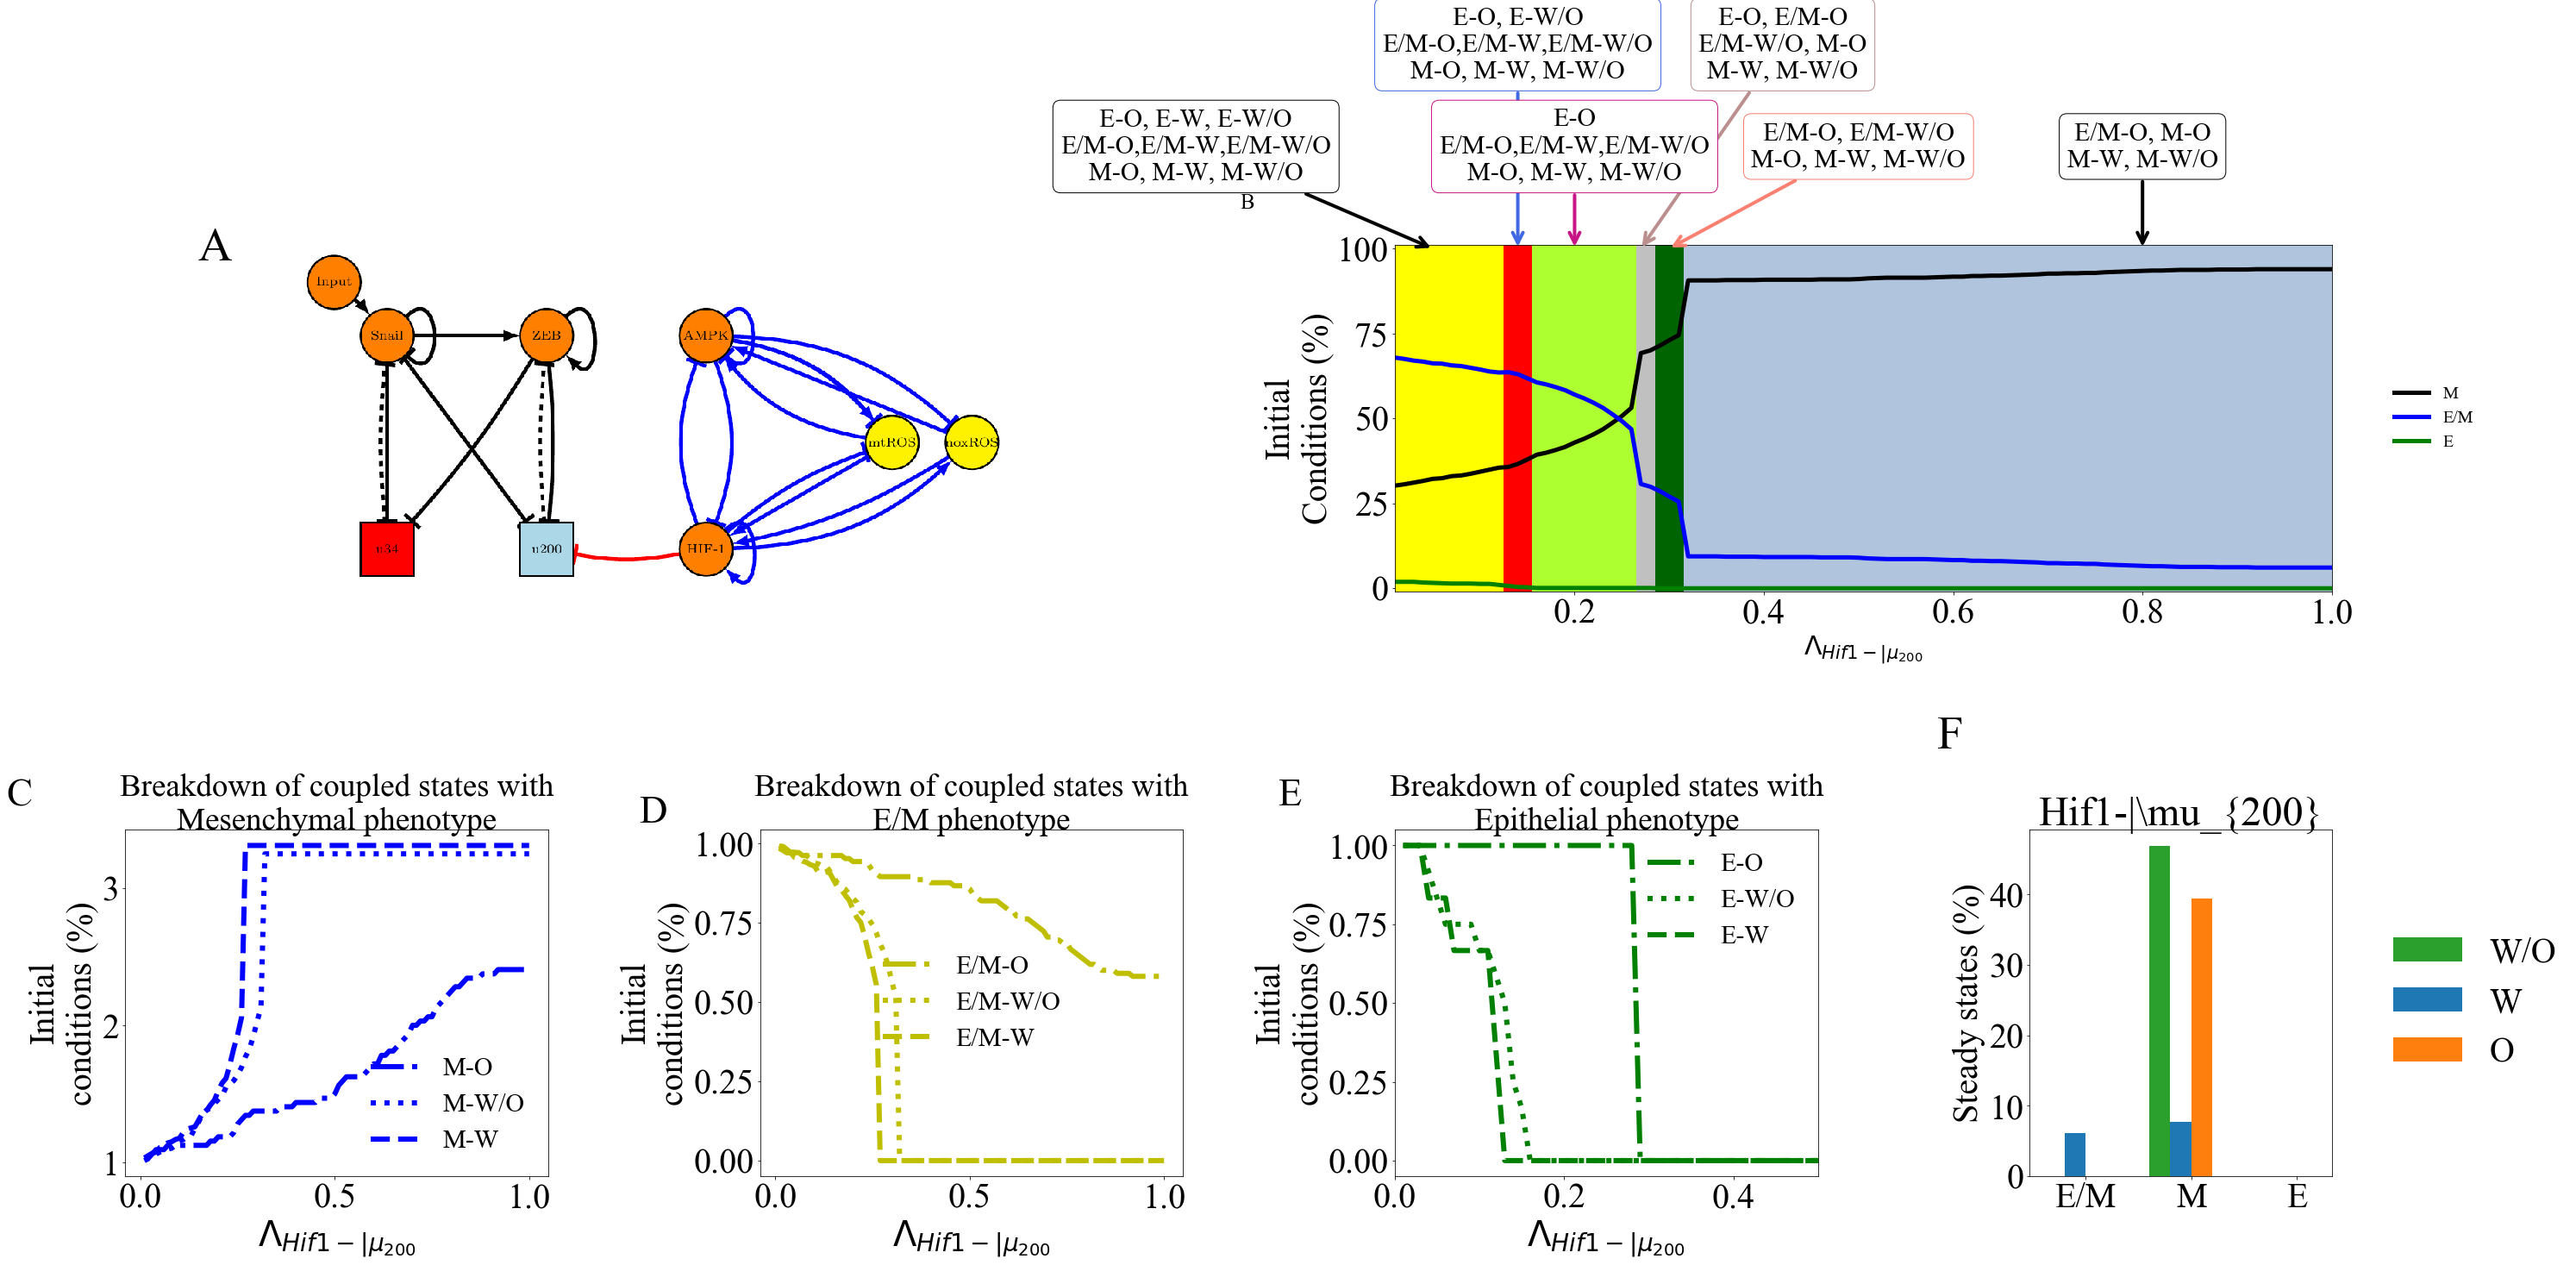

In [19]:
#labelPlot={'c':'AS','d':'AZ','e':'Au','f':'Hu','g':'HS','h':'input'}
#for el in ['c','d','e','f','g','h']:
fig = plt.figure(figsize=(9,5))
gs1 = gridspec.GridSpec(3,7, height_ratios=[1,0.6,1], width_ratios=[0.7,0.3,0.7,0.3,0.7,0.3,0.5])
gs1.update(left=0.05, right=4, wspace=0.05,hspace=0.05,top=3.,bottom=0)
fs =40
matplotlib.rcParams.update({'font.size':fs})
matplotlib.rcParams.update({'hatch.linewidth':3})
    ##########
    ##########

ax2z = plt.subplot(gs1[0,:3])
img = Image.open('networks/singleLink_Hu.png')
img.resize((1,1))
a = np.asarray(img)
ax2z.imshow(a)
ax2z.axis("off")
ax2z.text(-0.1, 1.05, 'A',transform=ax2z.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+15)


el = 'f'
######################
######################
######################
ax2b = plt.subplot(gs1[0,4:])
plotPhaseICS(ax2b,'B',"data/data_s2"+el,'EMT',xlabel="$\Lambda_{Hif1-|\mu_{200}}$",xlim=[0,1])
ax2b.annotate('E-O, E-W, E-W/O\nE/M-O,E/M-W,E/M-W/O\nM-O, M-W, M-W/O', fontsize=30,xy=(0.05, 100), xycoords="data",xytext=(-0.2,130), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-O, E/M-O\nE/M-W/O, M-O\nM-W, M-W/O', fontsize=30,xy=(0.27, 100), xycoords="data",xytext=(0.42,160), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w",ec='rosybrown'),arrowprops=dict(arrowstyle="->",lw=4,color='rosybrown'))
ax2b.annotate('E-O, E-W/O\nE/M-O,E/M-W,E/M-W/O\nM-O, M-W, M-W/O', fontsize=30,xy=(0.14, 100), xycoords="data",xytext=(0.14,160), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w",ec='royalblue'),arrowprops=dict(arrowstyle="->",lw=4,color='royalblue'))
ax2b.annotate('E-O\nE/M-O,E/M-W,E/M-W/O\nM-O, M-W, M-W/O', fontsize=30,xy=(0.2, 100), xycoords="data",xytext=(0.2,130), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w",ec='mediumvioletred'),arrowprops=dict(arrowstyle="->",lw=4,color='mediumvioletred'))
ax2b.annotate('E/M-O, E/M-W/O\nM-O, M-W, M-W/O', fontsize=30,xy=(0.3, 100), xycoords="data",xytext=(0.5,130), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w",ec='salmon'),arrowprops=dict(arrowstyle="->",lw=4,color='salmon'))
ax2b.annotate('E/M-O, M-O\nM-W, M-W/O', fontsize=30,xy=(0.8, 100), xycoords="data",xytext=(0.8,130), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.set_xlim(0.01,1)

df2b = pd.read_csv("data/data_s2"+el+"_ics.txt")
ax2e = plt.subplot(gs1[2,0])
ax2e.text(-0.22, 1.15, 'C',transform=ax2e.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
plotBreakdown(ax2e,df2b,'M',fs=fs)
ax2e.set_xlabel("$\Lambda_{Hif1-|\mu_{200}}$")

ax2d = plt.subplot(gs1[2,2])
ax2d.text(-0.22, 1.1, 'D',transform=ax2d.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
plotBreakdown(ax2d,df2b,'EM',fs=fs)
ax2d.set_xlabel("$\Lambda_{Hif1-|\mu_{200}}$")

ax2e = plt.subplot(gs1[2,4])
ax2e.text(-0.22, 1.15, 'E',transform=ax2e.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
plotBreakdown(ax2e,df2b,'E',fs=fs)
ax2e.set_xlim(0,0.5)
ax2e.set_xlabel("$\Lambda_{Hif1-|\mu_{200}}$")

####
ax2e=plt.subplot(gs1[2,6])
plotNumberBreakdown(ax2e,df2b,'min','EMT',titleSub='Hif1-|\mu_{200}',fs=fs)
ax2e.text(-0.22, 1.33, 'F',transform=ax2e.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+15)


fig.savefig("Figure_S13.png",bbox_inches='tight')#,dpi=300)

# Figure S14
### input to snail

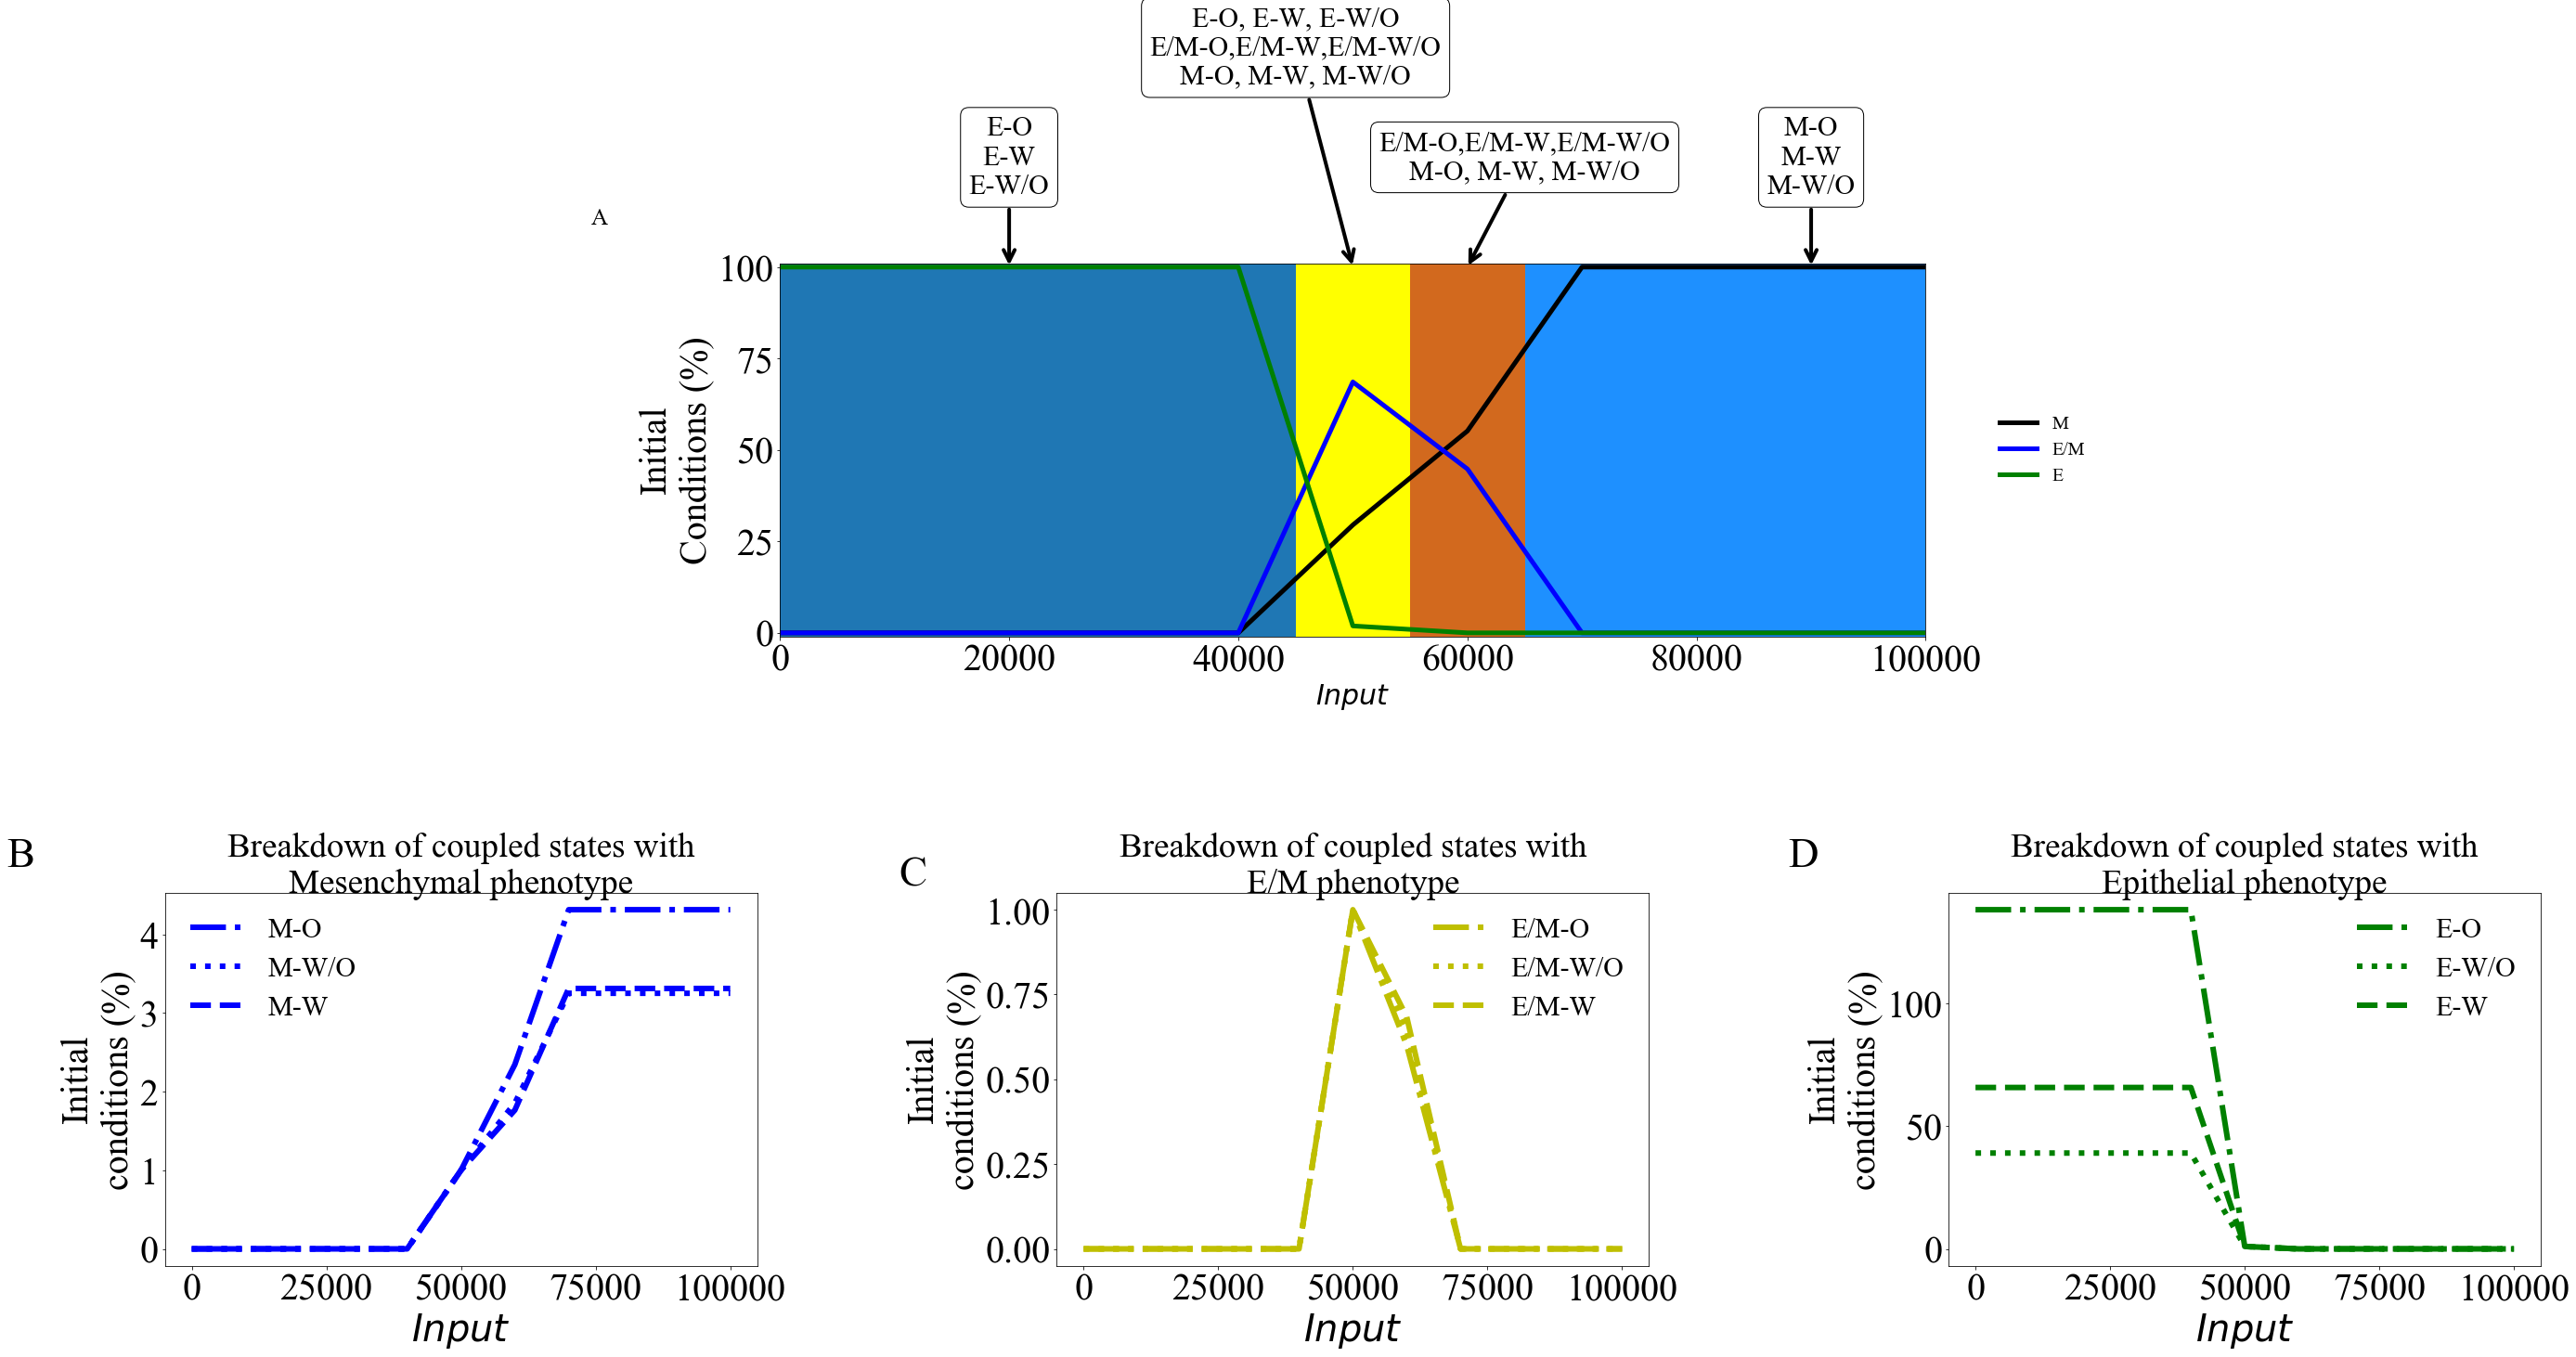

In [20]:
#labelPlot={'c':'AS','d':'AZ','e':'Au','f':'Hu','g':'HS','h':'input'}
#for el in ['c','d','e','f','g','h']:
fig = plt.figure(figsize=(9,5))
gs1 = gridspec.GridSpec(3,5, height_ratios=[1,0.6,1], width_ratios=[0.7,0.3,0.7,0.3,0.7])
gs1.update(left=0.05, right=4, wspace=0.05,hspace=0.05,top=3.,bottom=0)
fs =40
matplotlib.rcParams.update({'font.size':fs})
matplotlib.rcParams.update({'hatch.linewidth':3})
    ##########
    ##########

el = 'h'
######################
######################
######################
ax2b = plt.subplot(gs1[0,1:-1])
plotPhaseICS(ax2b,'A',"data/data_s2"+el,'EMT',xlabel="$Input$",xlim=[0,100000])
ax2b.annotate('M-O\nM-W\nM-W/O', fontsize=30,xy=(90000, 100), xycoords="data",xytext=(90000,130), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E/M-O,E/M-W,E/M-W/O\nM-O, M-W, M-W/O', fontsize=30,xy=(60000, 100), xycoords="data",xytext=(65000,130), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-O, E-W, E-W/O\nE/M-O,E/M-W,E/M-W/O\nM-O, M-W, M-W/O', fontsize=30,xy=(50000, 100), xycoords="data",xytext=(45000,160), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-O\nE-W\nE-W/O', fontsize=30,xy=(20000, 100), xycoords="data",xytext=(20000,130), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))

df2b = pd.read_csv("data/data_s2"+el+"_ics.txt")
ax2e = plt.subplot(gs1[2,0])
ax2e.text(-0.22, 1.15, 'B',transform=ax2e.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
plotBreakdown(ax2e,df2b,'M',fs=fs)
ax2e.set_xlabel("$Input$")

ax2d = plt.subplot(gs1[2,2])
ax2d.text(-0.22, 1.1, 'C',transform=ax2d.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
plotBreakdown(ax2d,df2b,'EM',fs=fs)
ax2d.set_xlabel("$Input$")

ax2e = plt.subplot(gs1[2,4])
ax2e.text(-0.22, 1.15, 'D',transform=ax2e.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
plotBreakdown(ax2e,df2b,'E',fs=fs)
ax2e.set_xlabel("$Input$")

fig.savefig("Figure_S14.png",bbox_inches='tight')#,dpi=300)

# Figure S15

Au

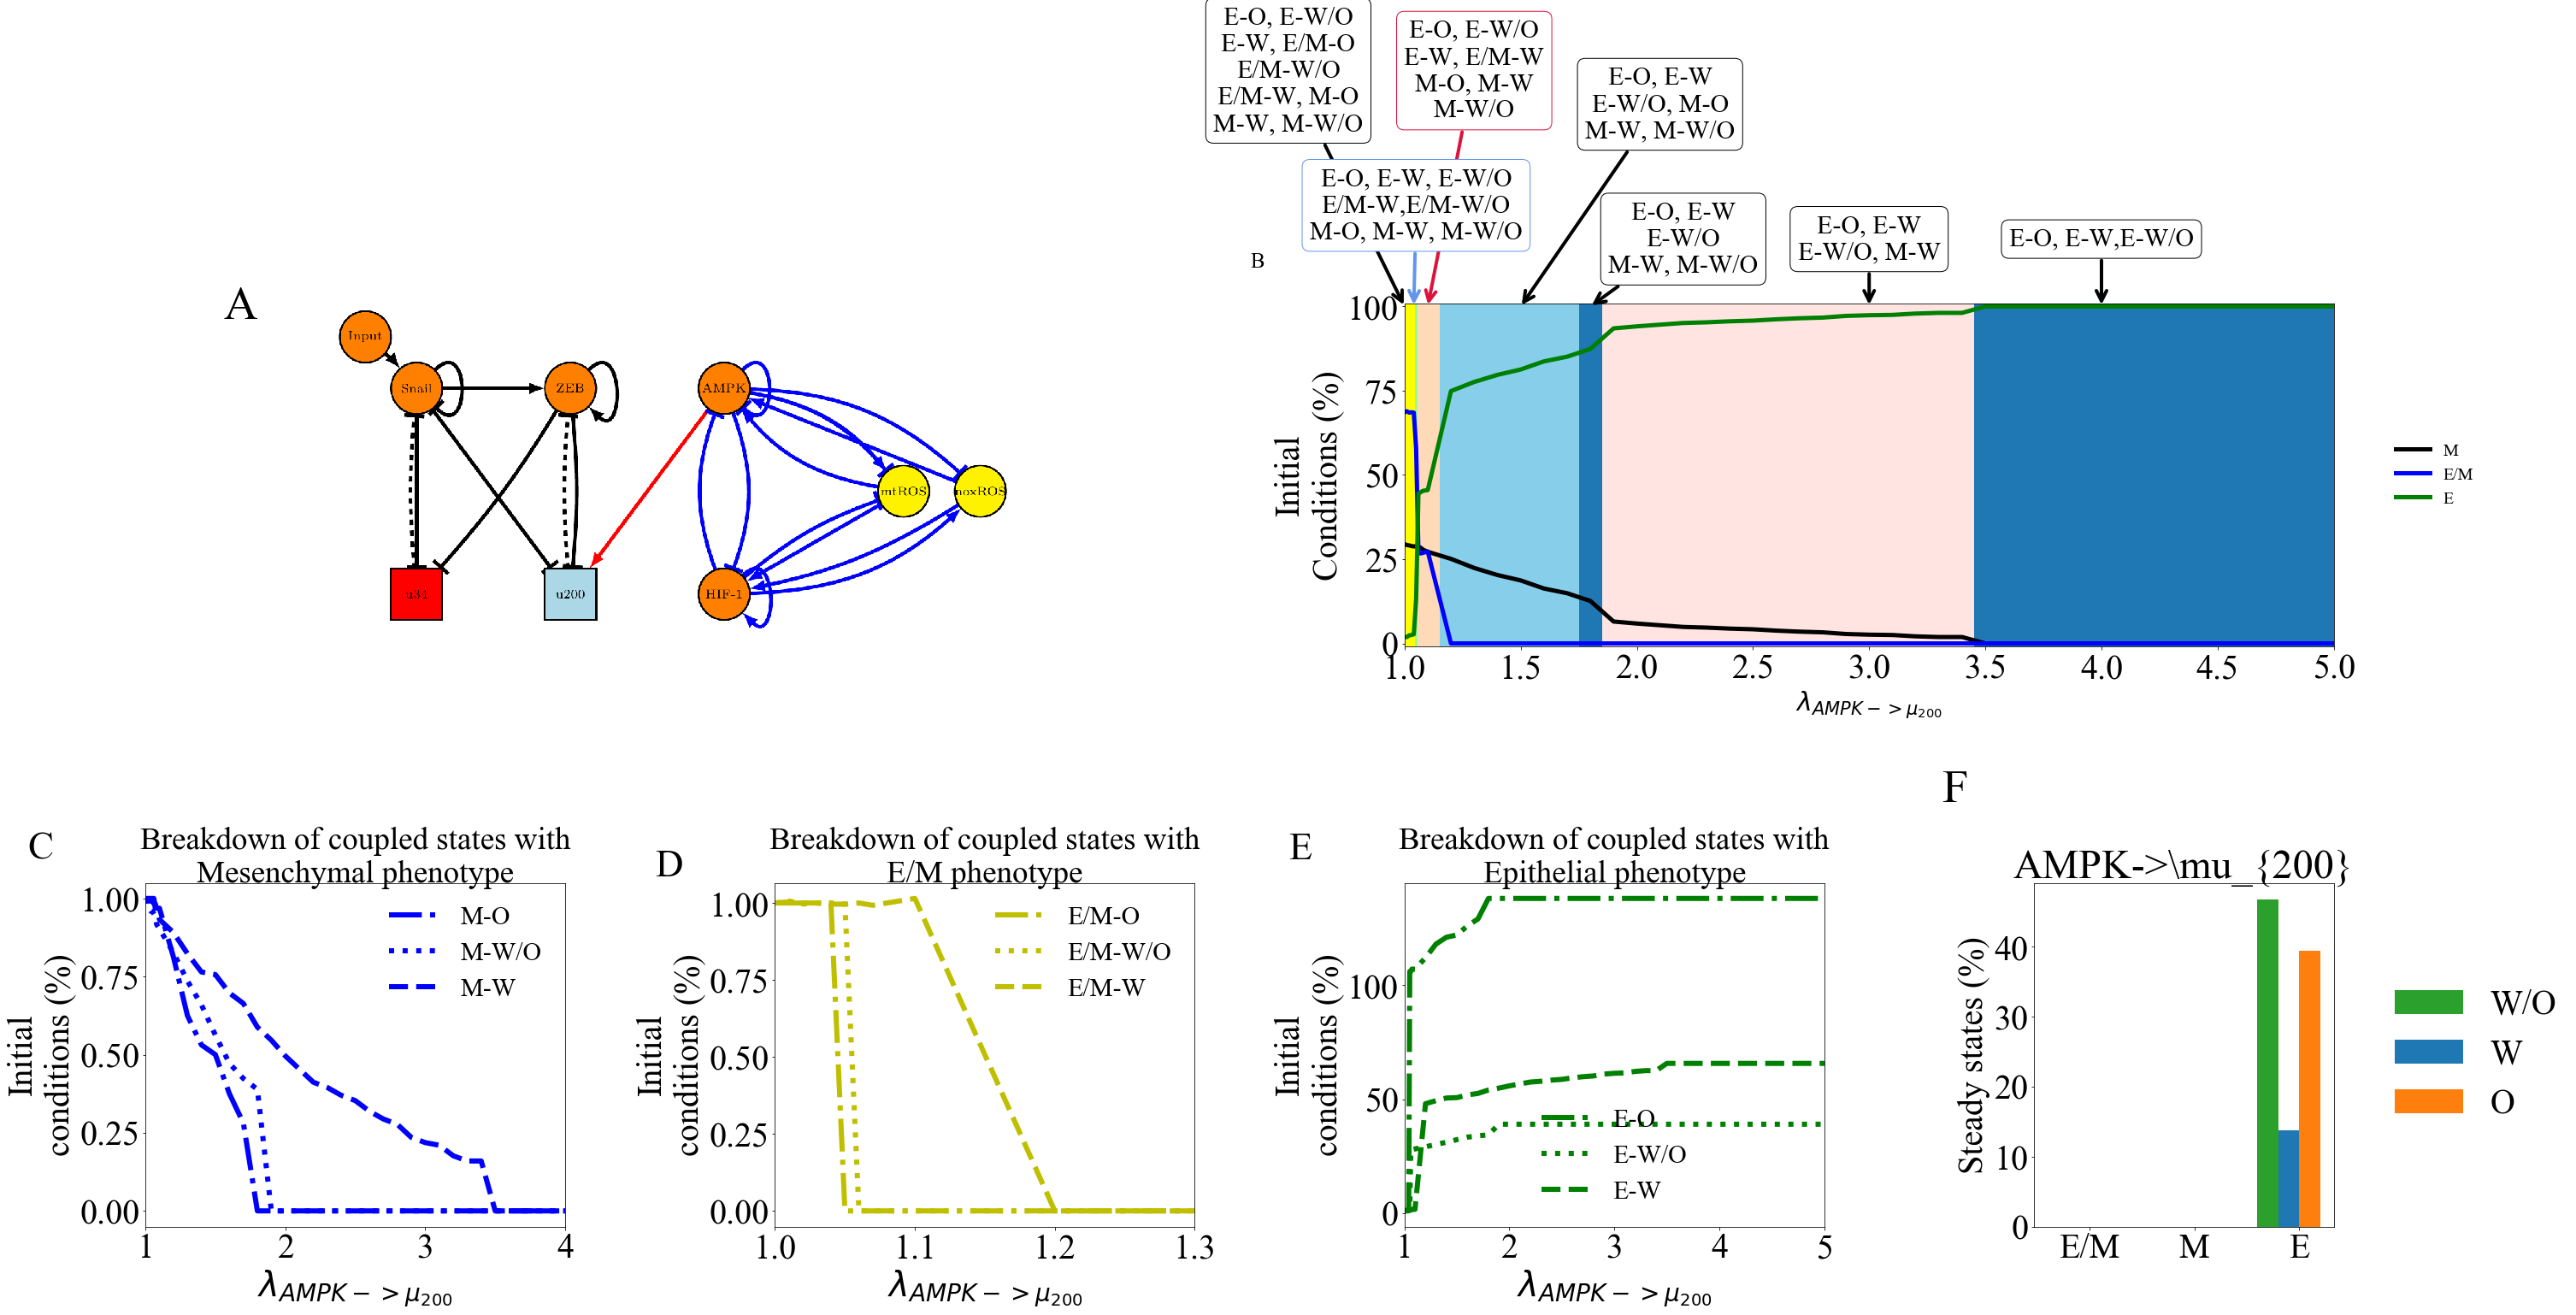

In [21]:
#labelPlot={'c':'AS','d':'AZ','e':'Au','f':'Hu','g':'HS','h':'input'}
#for el in ['c','d','e','f','g','h']:
fig = plt.figure(figsize=(9,5))
gs1 = gridspec.GridSpec(3,7, height_ratios=[1,0.6,1], width_ratios=[0.7,0.3,0.7,0.3,0.7,0.3,0.5])
gs1.update(left=0.05, right=4, wspace=0.05,hspace=0.05,top=3.,bottom=0)
fs =40
matplotlib.rcParams.update({'font.size':fs})
matplotlib.rcParams.update({'hatch.linewidth':3})
    ##########
    ##########

ax2z = plt.subplot(gs1[0,:3])
img = Image.open('networks/singleLink_Au.png')
img.resize((1,1))
a = np.asarray(img)
ax2z.imshow(a)
ax2z.axis("off")
ax2z.text(-0.1, 1.05, 'A',transform=ax2z.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+15)


el = 'e'
######################
######################
######################
ax2b = plt.subplot(gs1[0,4:])
plotPhaseICS(ax2b,'B',"data/data_s2"+el,'EMT',xlabel="$\lambda_{AMPK -> \mu_{200}}$",xlim=[1,5])
ax2b.annotate('E-O, E-W/O\nE-W, E/M-O\nE/M-W/O\nE/M-W, M-O\nM-W, M-W/O', fontsize=30,xy=(1, 100), xycoords="data",xytext=(0.5,170), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-O, E-W/O\nE-W, E/M-W\nM-O, M-W\nM-W/O', fontsize=30,xy=(1.1, 100), xycoords="data",xytext=(1.3,170), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w",ec='crimson'),arrowprops=dict(arrowstyle="->",lw=4,color='crimson'))
ax2b.annotate('E-O, E-W, E-W/O\nE/M-W,E/M-W/O\nM-O, M-W, M-W/O', fontsize=30,xy=(1.04, 100), xycoords="data",xytext=(1.05,130), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w",ec='cornflowerblue'),arrowprops=dict(arrowstyle="->",lw=4,color='cornflowerblue'))
ax2b.annotate('E-O, E-W\nE-W/O, M-O\nM-W, M-W/O', fontsize=30,xy=(1.5, 100), xycoords="data",xytext=(2.1,160), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-O, E-W\nE-W/O\nM-W, M-W/O', fontsize=30,xy=(1.8, 100), xycoords="data",xytext=(2.2,120), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-O, E-W\nE-W/O, M-W', fontsize=30,xy=(3, 100), xycoords="data",xytext=(3.,120), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-O, E-W,E-W/O', fontsize=30,xy=(4, 100), xycoords="data",xytext=(4,120), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))



df2b = pd.read_csv("data/data_s2"+el+"_ics.txt")
ax2e = plt.subplot(gs1[2,0])
ax2e.text(-0.22, 1.15, 'C',transform=ax2e.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
plotBreakdown(ax2e,df2b,'M',fs=fs)
ax2e.set_xlabel("$\lambda_{AMPK->\mu_{200}}$")
ax2e.set_xlim(1,4)

ax2d = plt.subplot(gs1[2,2])
ax2d.text(-0.22, 1.1, 'D',transform=ax2d.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
plotBreakdown(ax2d,df2b,'EM',fs=fs)
ax2d.set_xlabel("$\lambda_{AMPK->\mu_{200}}$")
ax2d.set_xlim(1,1.3)

ax2e = plt.subplot(gs1[2,4])
ax2e.text(-0.22, 1.15, 'E',transform=ax2e.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
plotBreakdown(ax2e,df2b,'E',fs=fs)
ax2e.set_xlabel("$\lambda_{AMPK->\mu_{200}}$")
ax2e.set_xlim(1,5)

####
ax2e=plt.subplot(gs1[2,6])
plotNumberBreakdown(ax2e,df2b,'max','EMT',titleSub='AMPK->\mu_{200}',fs=fs)
ax2e.text(-0.22, 1.33, 'F',transform=ax2e.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+15)

fig.savefig("Figure_S15.png",bbox_inches='tight')#,dpi=300)

# Figure S16

AZ

data/data_s2d $\Lambda_{AMPK -| Zeb}$


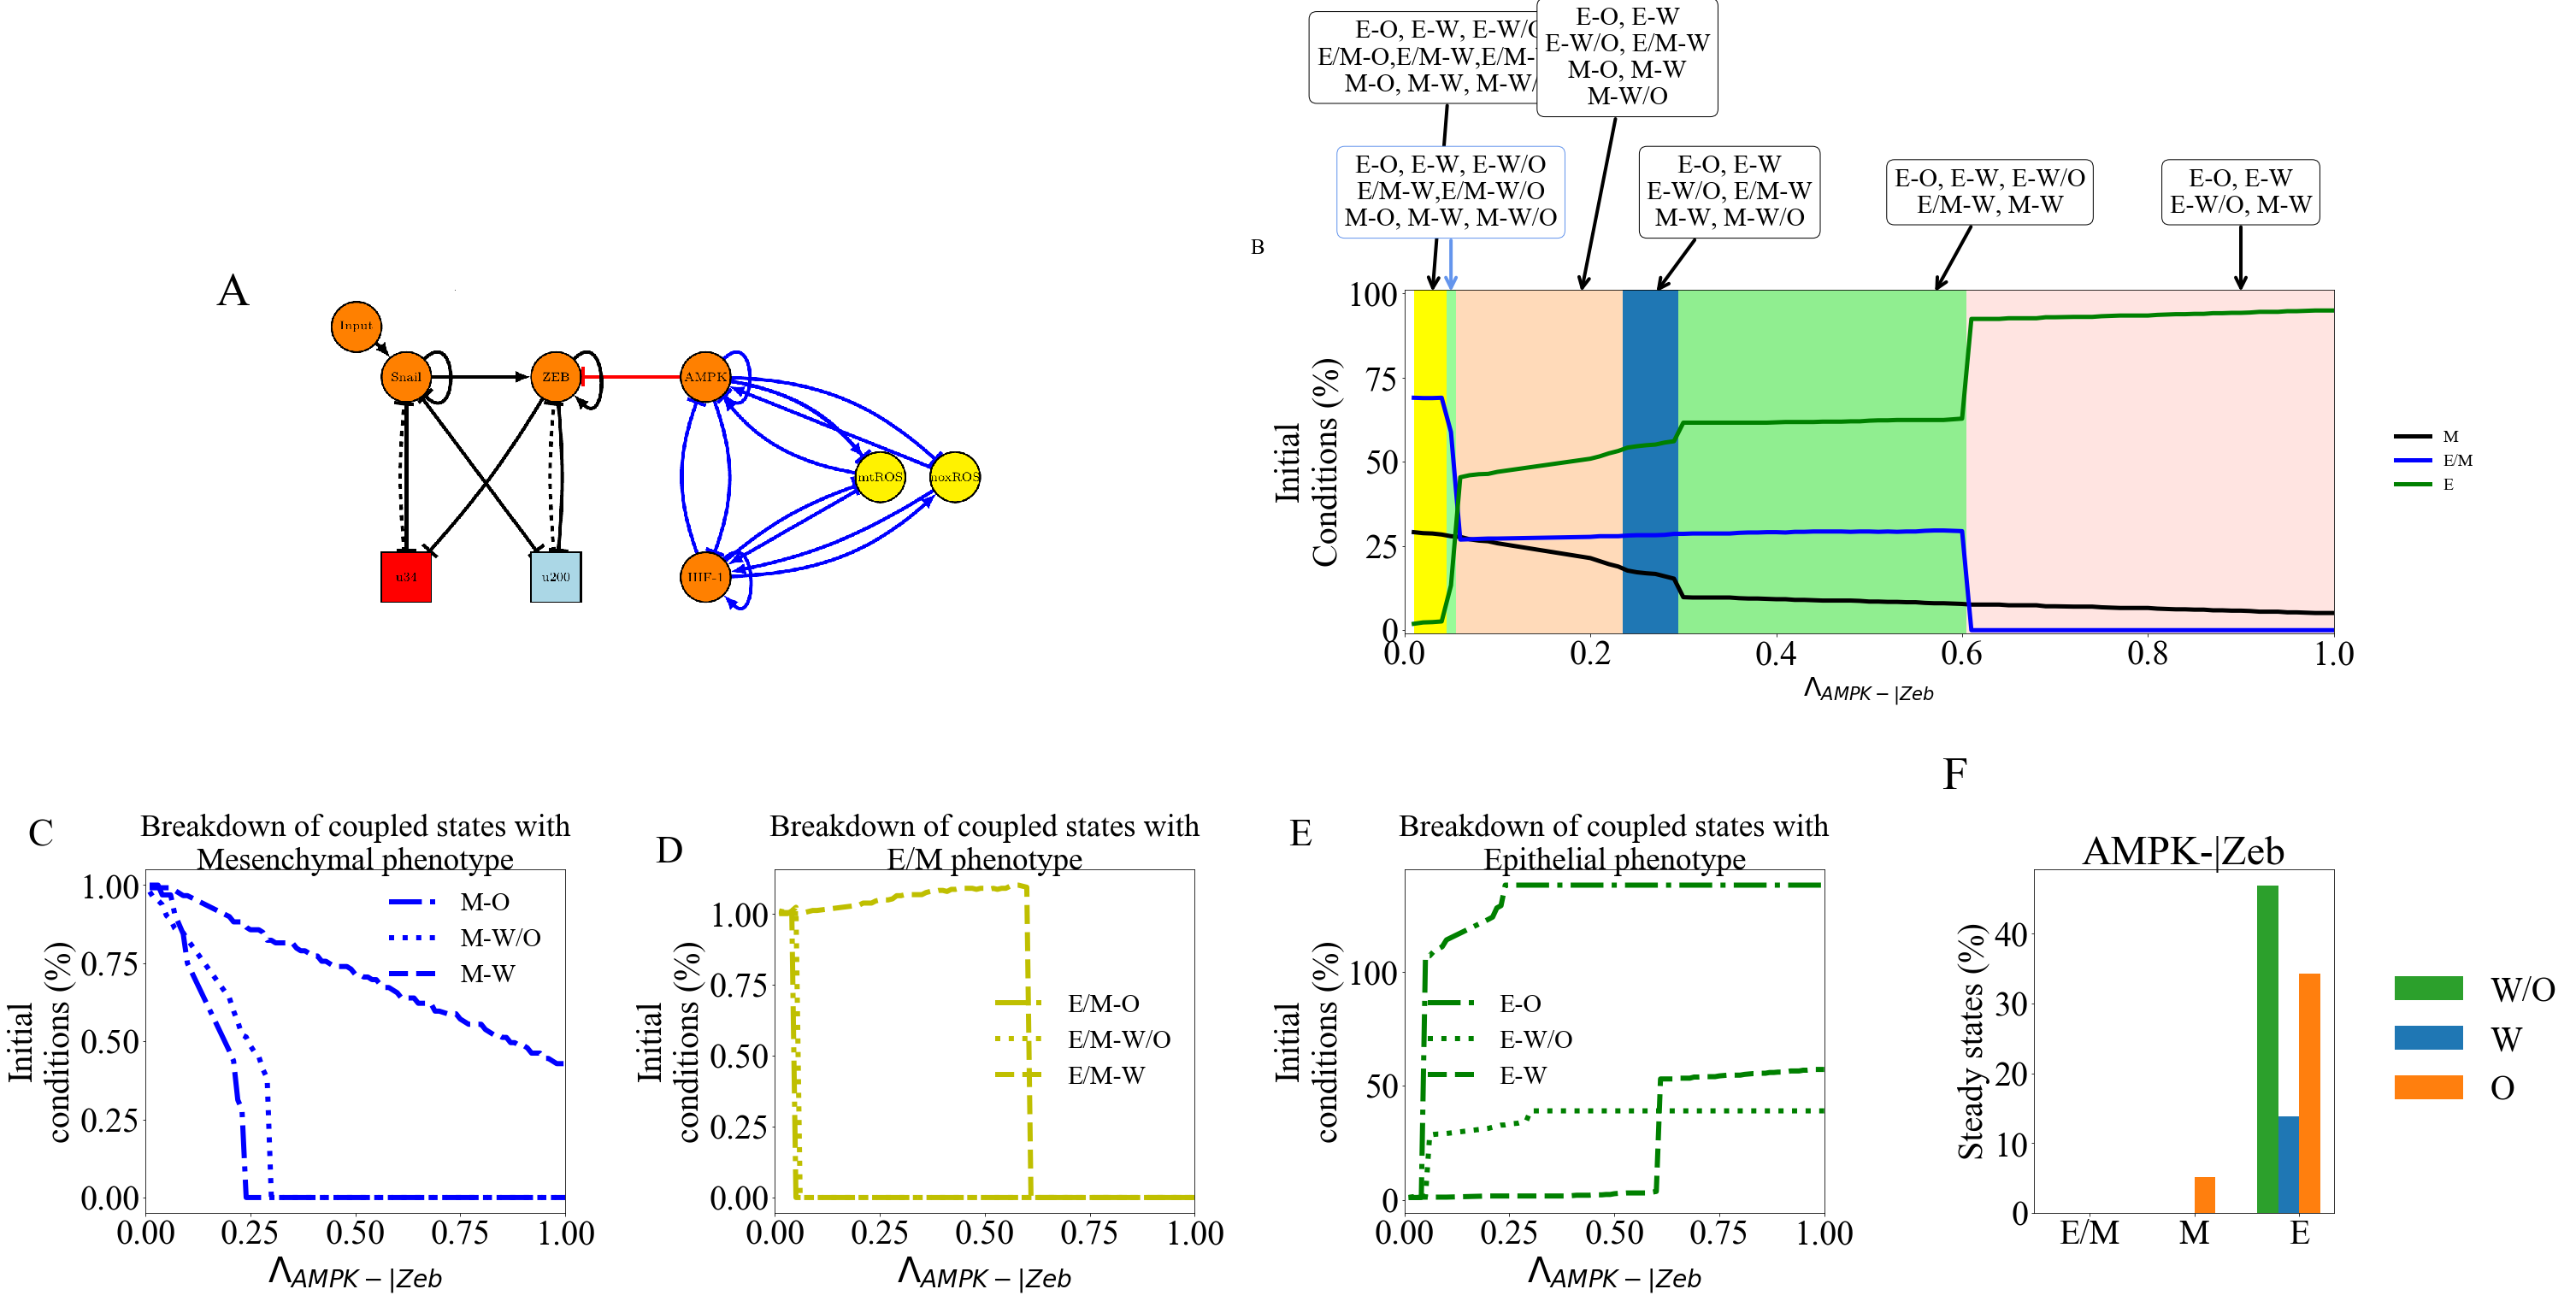

In [22]:
#labelPlot={'c':'AS','d':'AZ','e':'Au','f':'Hu','g':'HS','h':'input'}
#for el in ['c','d','e','f','g','h']:
fig = plt.figure(figsize=(9,5))
gs1 = gridspec.GridSpec(3,7, height_ratios=[1,0.6,1], width_ratios=[0.7,0.3,0.7,0.3,0.7,0.3,0.5])
gs1.update(left=0.05, right=4, wspace=0.05,hspace=0.05,top=3.,bottom=0)
fs =40
matplotlib.rcParams.update({'font.size':fs})
matplotlib.rcParams.update({'hatch.linewidth':3})
    ##########
    ##########

ax2z = plt.subplot(gs1[0,:3])
img = Image.open('networks/singleLink_AZ.png')
img.resize((1,1))
a = np.asarray(img)
ax2z.imshow(a)
ax2z.axis("off")
ax2z.text(-0.1, 1.05, 'A',transform=ax2z.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+15)



el = 'd'
######################
######################
######################
ax2b = plt.subplot(gs1[0,4:])
plotPhaseICS(ax2b,'B',"data/data_s2"+el,'EMT',xlabel="$\Lambda_{AMPK -| Zeb}$",xlim=[0,1])
ax2b.annotate('E-O, E-W, E-W/O\nE/M-O,E/M-W,E/M-W/O\nM-O, M-W, M-W/O', fontsize=30,xy=(0.03, 100), xycoords="data",xytext=(.05,170), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-O, E-W, E-W/O\nE/M-W,E/M-W/O\nM-O, M-W, M-W/O', fontsize=30,xy=(0.05, 100), xycoords="data",xytext=(0.05,130), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w",ec='cornflowerblue'),arrowprops=dict(arrowstyle="->",lw=4.,color='cornflowerblue'))
ax2b.annotate('E-O, E-W\nE-W/O, E/M-W\nM-O, M-W\nM-W/O', fontsize=30,xy=(0.19, 100), xycoords="data",xytext=(0.24,170), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-O, E-W\nE-W/O, E/M-W\nM-W, M-W/O', fontsize=30,xy=(0.27, 100), xycoords="data",xytext=(0.35,130), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-O, E-W, E-W/O\nE/M-W, M-W', fontsize=30,xy=(0.57, 100), xycoords="data",xytext=(0.63,130), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-O, E-W\nE-W/O, M-W', fontsize=30,xy=(0.9, 100), xycoords="data",xytext=(0.9,130), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))

df2b = pd.read_csv("data/data_s2"+el+"_ics.txt")

ax2e = plt.subplot(gs1[2,0])
ax2e.text(-0.22, 1.15, 'C',transform=ax2e.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
plotBreakdown(ax2e,df2b,'M',fs=fs)
ax2e.set_xlabel("$\Lambda_{AMPK-|Zeb}$")
ax2e.set_xlim(0,1)

ax2d = plt.subplot(gs1[2,2])
ax2d.text(-0.22, 1.1, 'D',transform=ax2d.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
plotBreakdown(ax2d,df2b,'EM',fs=fs)
ax2d.set_xlabel("$\Lambda_{AMPK-|Zeb}$")
ax2d.set_xlim(0,1)

ax2e = plt.subplot(gs1[2,4])
ax2e.text(-0.22, 1.15, 'E',transform=ax2e.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
plotBreakdown(ax2e,df2b,'E',fs=fs)
ax2e.set_xlabel("$\Lambda_{AMPK-|Zeb}$")
ax2e.set_xlim(0,1)

####
ax2e=plt.subplot(gs1[2,6])
plotNumberBreakdown(ax2e,df2b,'min','EMT',titleSub="AMPK-|Zeb",fs=fs)
ax2e.text(-0.22, 1.33, 'F',transform=ax2e.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+15)

fig.savefig("Figure_S16.png",bbox_inches='tight')#,dpi=300)

# Figure S17

AS

data/data_s2c $\Lambda_{AMPK -| Snail}$


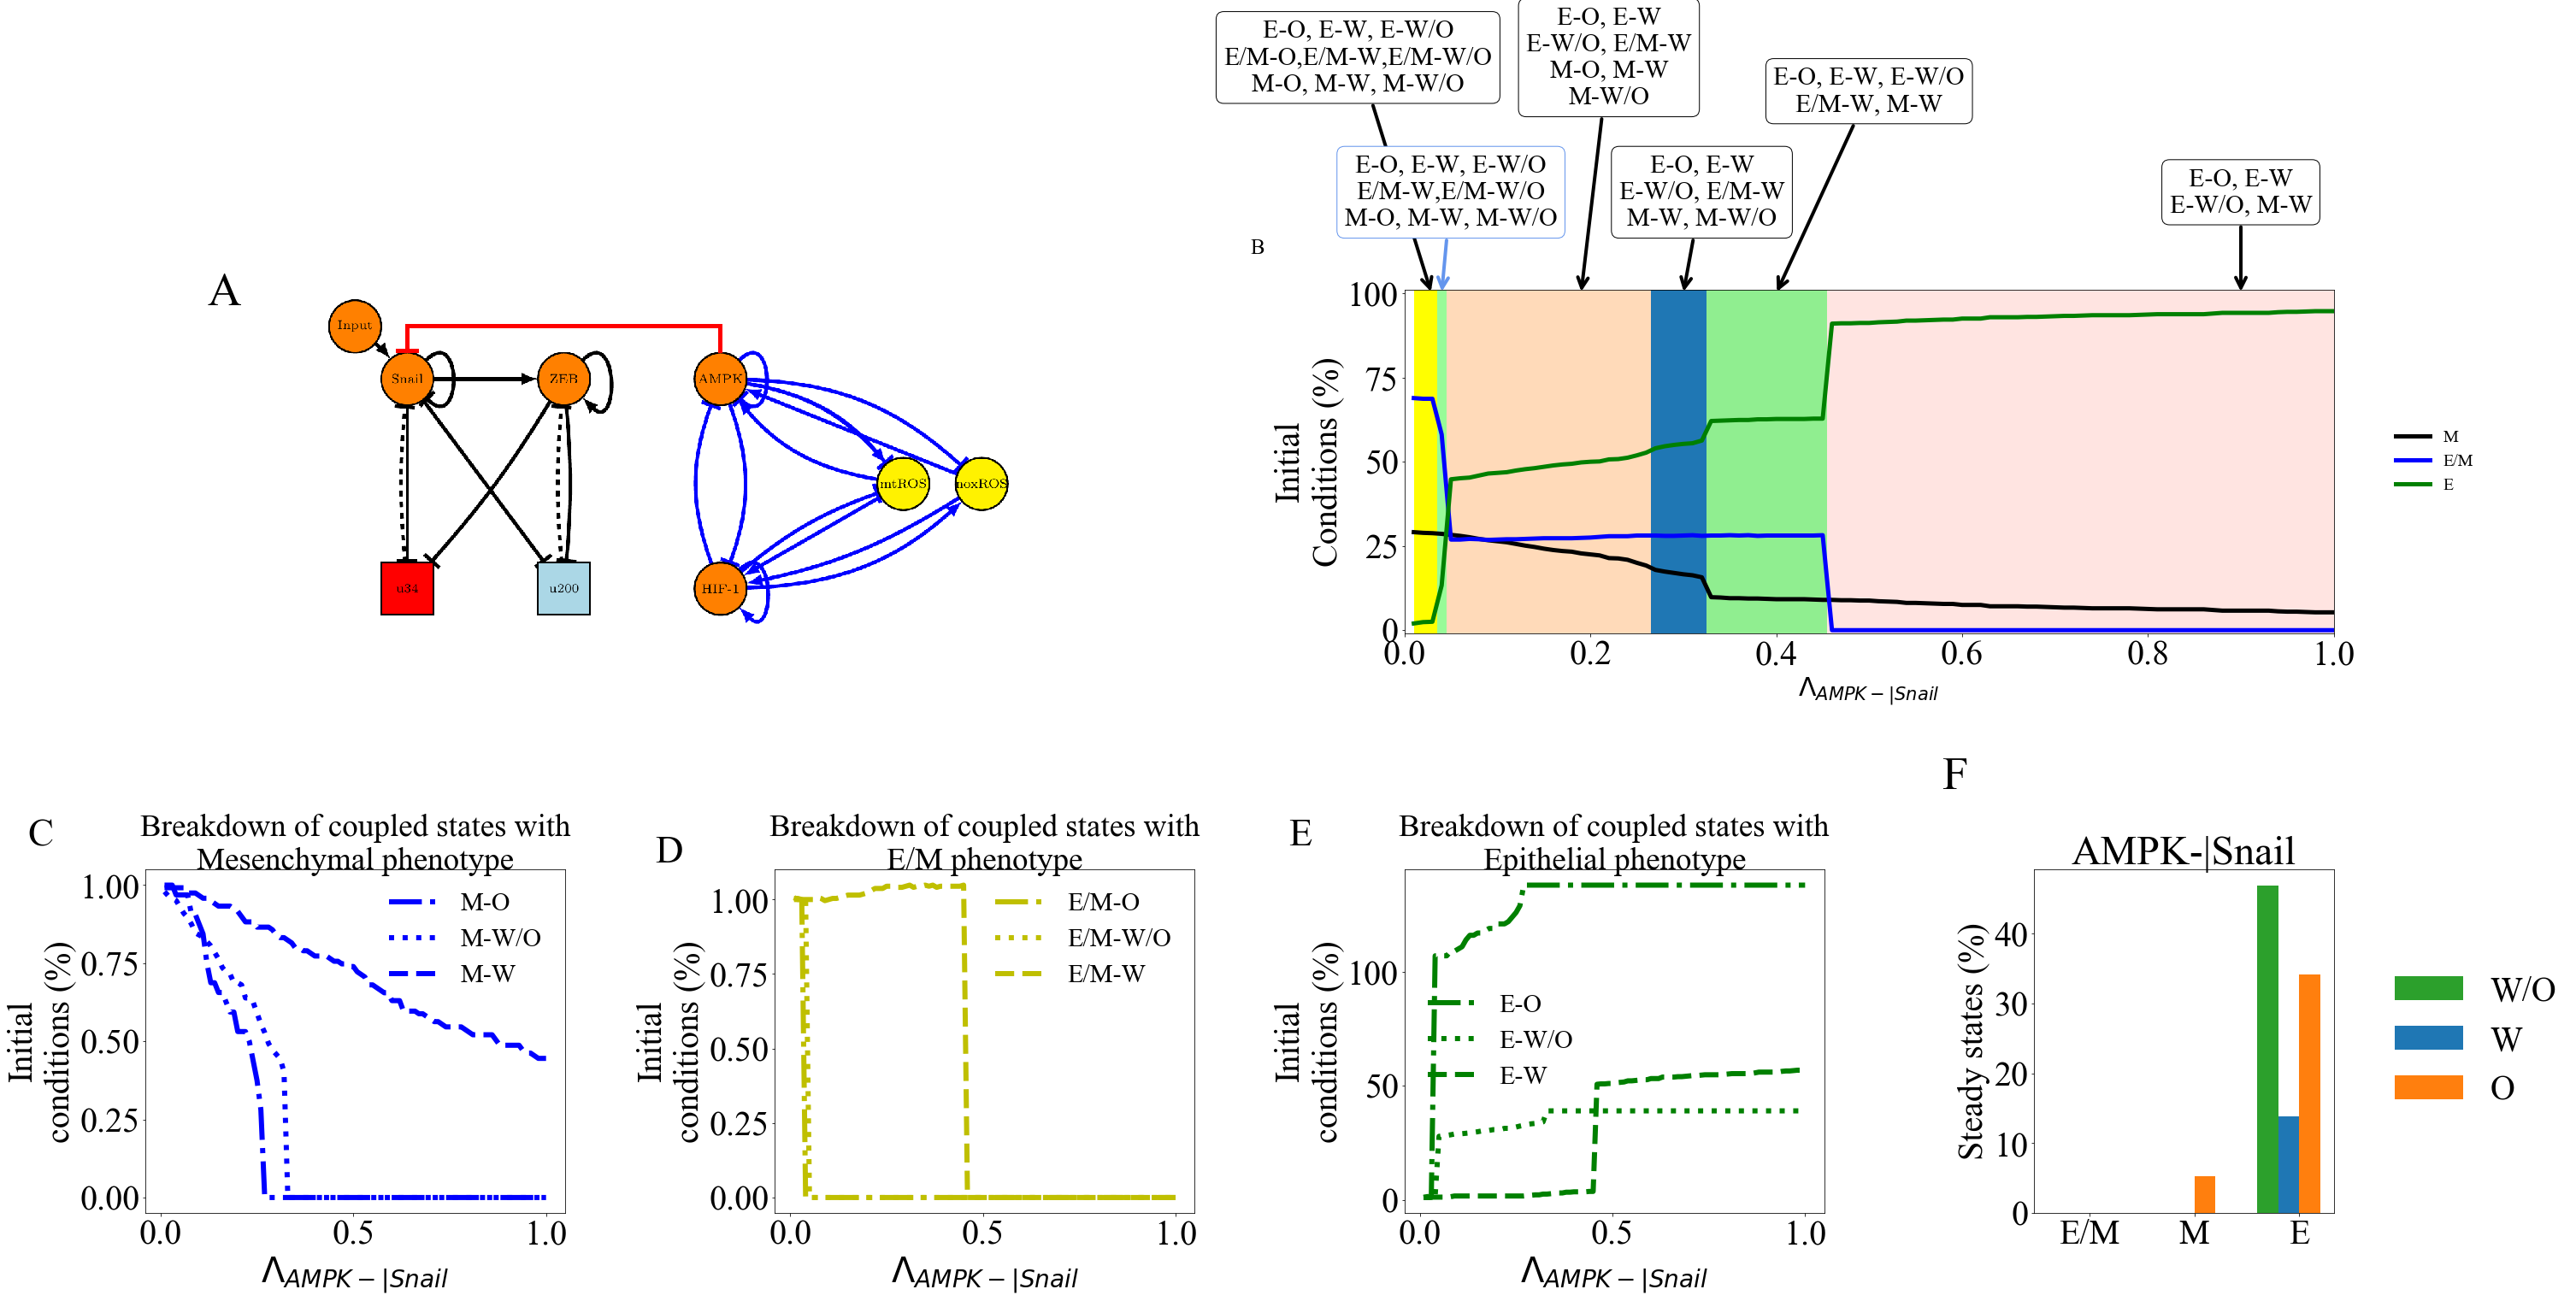

In [23]:
#labelPlot={'c':'AS','d':'AZ','e':'Au','f':'Hu','g':'HS','h':'input'}
#for el in ['c','d','e','f','g','h']:
fig = plt.figure(figsize=(9,5))
gs1 = gridspec.GridSpec(3,7, height_ratios=[1,0.6,1], width_ratios=[0.7,0.3,0.7,0.3,0.7,0.3,0.5])
gs1.update(left=0.05, right=4, wspace=0.05,hspace=0.05,top=3.,bottom=0)
fs =40
matplotlib.rcParams.update({'font.size':fs})
matplotlib.rcParams.update({'hatch.linewidth':3})
    ##########
    ##########

ax2z = plt.subplot(gs1[0,:3])
img = Image.open('networks/singleLink_AS.png')
img.resize((1,1))
a = np.asarray(img)
ax2z.imshow(a)
ax2z.axis("off")
ax2z.text(-0.1, 1.05, 'A',transform=ax2z.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+15)


el = 'c'
######################
######################
######################
ax2b = plt.subplot(gs1[0,4:])
plotPhaseICS(ax2b,'B',"data/data_s2"+el,'EMT',xlabel="$\Lambda_{AMPK -| Snail}$",xlim=[0,1])
ax2b.annotate('E-O, E-W, E-W/O\nE/M-O,E/M-W,E/M-W/O\nM-O, M-W, M-W/O', fontsize=30,xy=(0.029, 100), xycoords="data",xytext=(-.05,170), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-O, E-W, E-W/O\nE/M-W,E/M-W/O\nM-O, M-W, M-W/O', fontsize=30,xy=(0.04, 100), xycoords="data",xytext=(0.05,130), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w",ec='cornflowerblue'),arrowprops=dict(arrowstyle="->",lw=4.,color='cornflowerblue'))
ax2b.annotate('E-O, E-W\nE-W/O, E/M-W\nM-O, M-W\nM-W/O', fontsize=30,xy=(0.19, 100), xycoords="data",xytext=(0.22,170), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-O, E-W\nE-W/O, E/M-W\nM-W, M-W/O', fontsize=30,xy=(0.3, 100), xycoords="data",xytext=(0.32,130), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-O, E-W, E-W/O\nE/M-W, M-W', fontsize=30,xy=(0.4, 100), xycoords="data",xytext=(0.5,160), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-O, E-W\nE-W/O, M-W', fontsize=30,xy=(0.9, 100), xycoords="data",xytext=(0.9,130), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))

df2b = pd.read_csv("data/data_s2"+el+"_ics.txt")
ax2e = plt.subplot(gs1[2,0])
ax2e.text(-0.22, 1.15, 'C',transform=ax2e.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
plotBreakdown(ax2e,df2b,'M',fs=fs)
ax2e.set_xlabel("$\Lambda_{AMPK-|Snail}$")

ax2d = plt.subplot(gs1[2,2])
ax2d.text(-0.22, 1.1, 'D',transform=ax2d.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
plotBreakdown(ax2d,df2b,'EM',fs=fs)
ax2d.set_xlabel("$\Lambda_{AMPK-|Snail}$")

ax2e = plt.subplot(gs1[2,4])
ax2e.text(-0.22, 1.15, 'E',transform=ax2e.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
plotBreakdown(ax2e,df2b,'E',fs=fs)
ax2e.set_xlabel("$\Lambda_{AMPK-|Snail}$")

####
ax2e=plt.subplot(gs1[2,6])
plotNumberBreakdown(ax2e,df2b,'min','EMT',titleSub='AMPK-|Snail',fs=fs)
ax2e.text(-0.22, 1.33, 'F',transform=ax2e.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+15)


fig.savefig("Figure_S17.png",bbox_inches='tight')#,dpi=300)

# Figures S18
### Au/HS, AS/Hu, Au/Hu, AS/HS

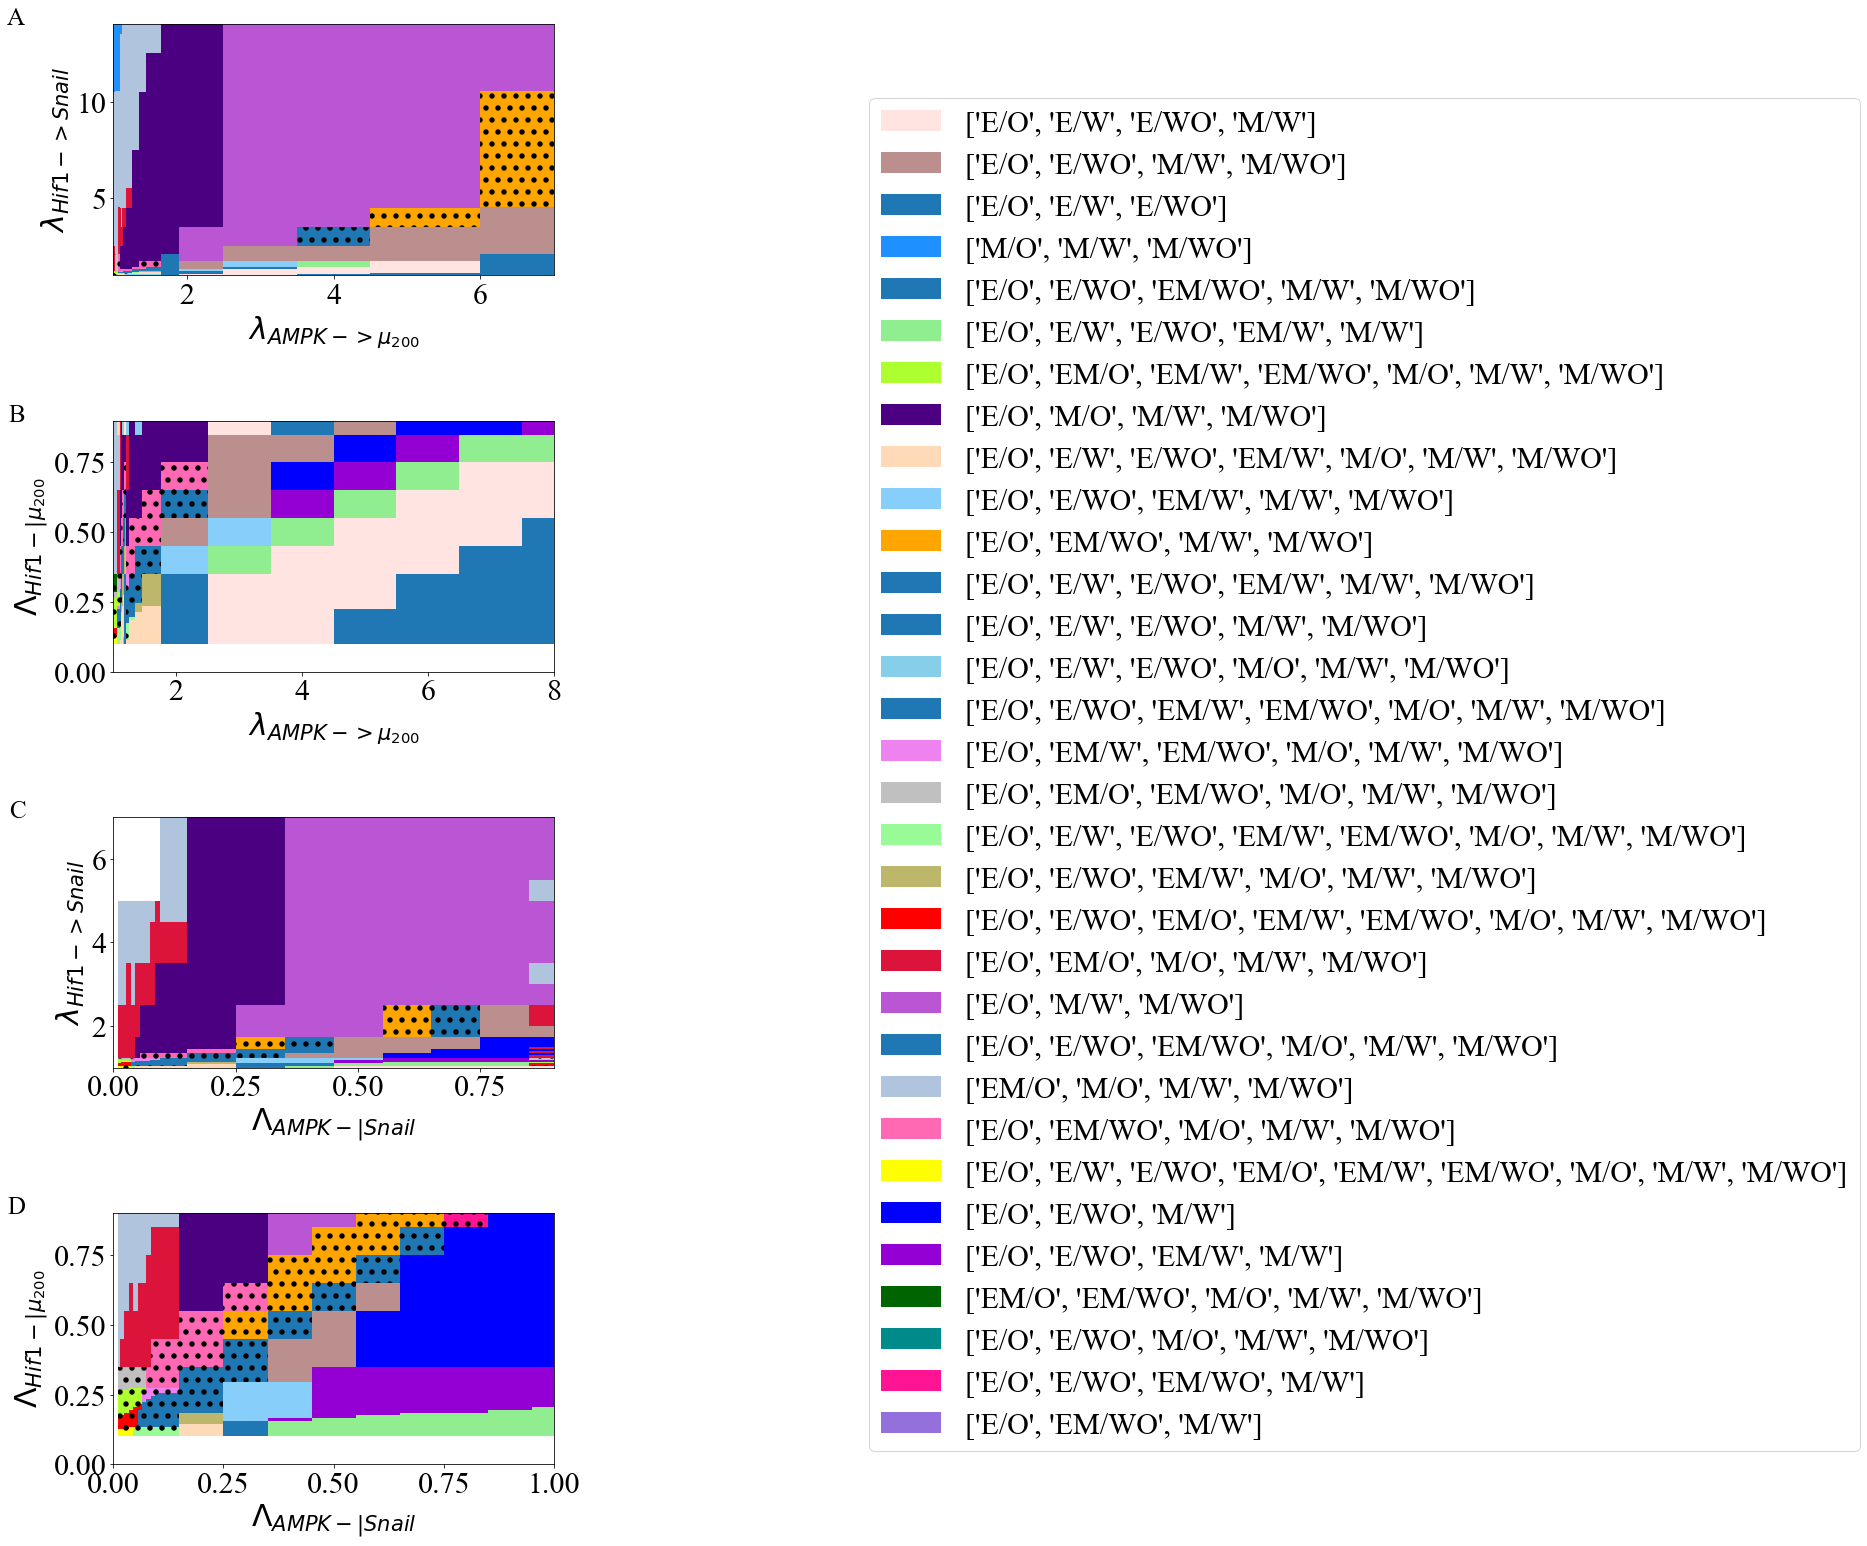

In [24]:
fig = plt.figure(figsize=(4,10))#figsize=(8,13))
gs1 = gridspec.GridSpec(7,3, height_ratios=[1,0.5,1.,0.5,1,0.5,1], width_ratios=[1.,0.5,1])
gs1.update(left=0.05, right=4, wspace=0.05,hspace=0.05,top=2,bottom=0)
fs =30
matplotlib.rcParams.update({'font.size':fs})
##########
axa = plt.subplot(gs1[0,0])
l1=plotPhases(axa,'A','data/data_Au_HS',"$\lambda_{AMPK->\mu_{200}}$","$\lambda_{Hif1 -> Snail}$",legend='return',xlim=[1,7],ylim=[1,14])
#axa = plt.subplot(gs1[0,2])
#plotEMWOheatmap(axa,'','data/data_Au_HS',"$\lambda_{}$","$\lambda_{}$")#,xlim=[0,1],ylim=[0,1])


axa = plt.subplot(gs1[2,0])
l2=plotPhases(axa,'B','data/data_Au_Hu',"$\lambda_{AMPK->\mu_{200}}$","$\Lambda_{Hif1 -| \mu_{200}}$",legend='return',xlim=[1,8],ylim=[0,0.9])
#axa = plt.subplot(gs1[2,2])
#plotEMWOheatmap(axa,'','data/data_Au_Hu',"$\lambda_{}$","$\lambda_{}$")#,xlim=[0,1],ylim=[0,1])

axa = plt.subplot(gs1[4,0])
l3=plotPhases(axa,'C','data/data_AS_HS',"$\Lambda_{AMPK-|Snail}$","$\lambda_{Hif1 -> Snail}$",legend='return',xlim=[0,0.9],ylim=[1,7])
#axa = plt.subplot(gs1[4,2])
#plotEMWOheatmap(axa,'','data/data_AS_HS',"$\lambda_{}$","$\lambda_{}$")#,xlim=[0,1],ylim=[0,1])

axa = plt.subplot(gs1[6,0])
l4=plotPhases(axa,'D','data/data_AS_Hu',"$\Lambda_{AMPK-| Snail}$","$\Lambda_{Hif1 -| \mu_{200}}$",legend='return',xlim=[0,1],ylim=[0,0.9])
#axa = plt.subplot(gs1[6,2])
#plotEMWOheatmap(axa,'','data/data_AS_Hu',"$\lambda_{}$","$\lambda_{}$")#,xlim=[0,1],ylim=[0,1])


checks=[]
legend_elements=[]
for i in range(len(l1[1])):
    item = l1[1][i]
    col=l1[0][i]
    if item not in checks:
        legend_elements+=[ Patch(facecolor=col,label=item)]
        checks+=[item]
for i in range(len(l2[1])):
    item = l2[1][i]
    col=l2[0][i]
    if item not in checks:
        legend_elements+=[ Patch(facecolor=col,label=item)]
        checks+=[item]
for i in range(len(l3[1])):
    item = l3[1][i]
    col=l3[0][i]
    if item not in checks:
        legend_elements+=[ Patch(facecolor=col,label=item)]
        checks+=[item]
for i in range(len(l4[1])):
    item = l4[1][i]
    col=l4[0][i]
    if item not in checks:
        legend_elements+=[ Patch(facecolor=col,label=item)]
        checks+=[item]
        
axa.legend(handles=legend_elements, bbox_to_anchor=(4.,5.5))


fig.savefig("Figure_S18.png",bbox_inches='tight')#,dpi=300)

## Figure S19

### Full  picture for 5A -D

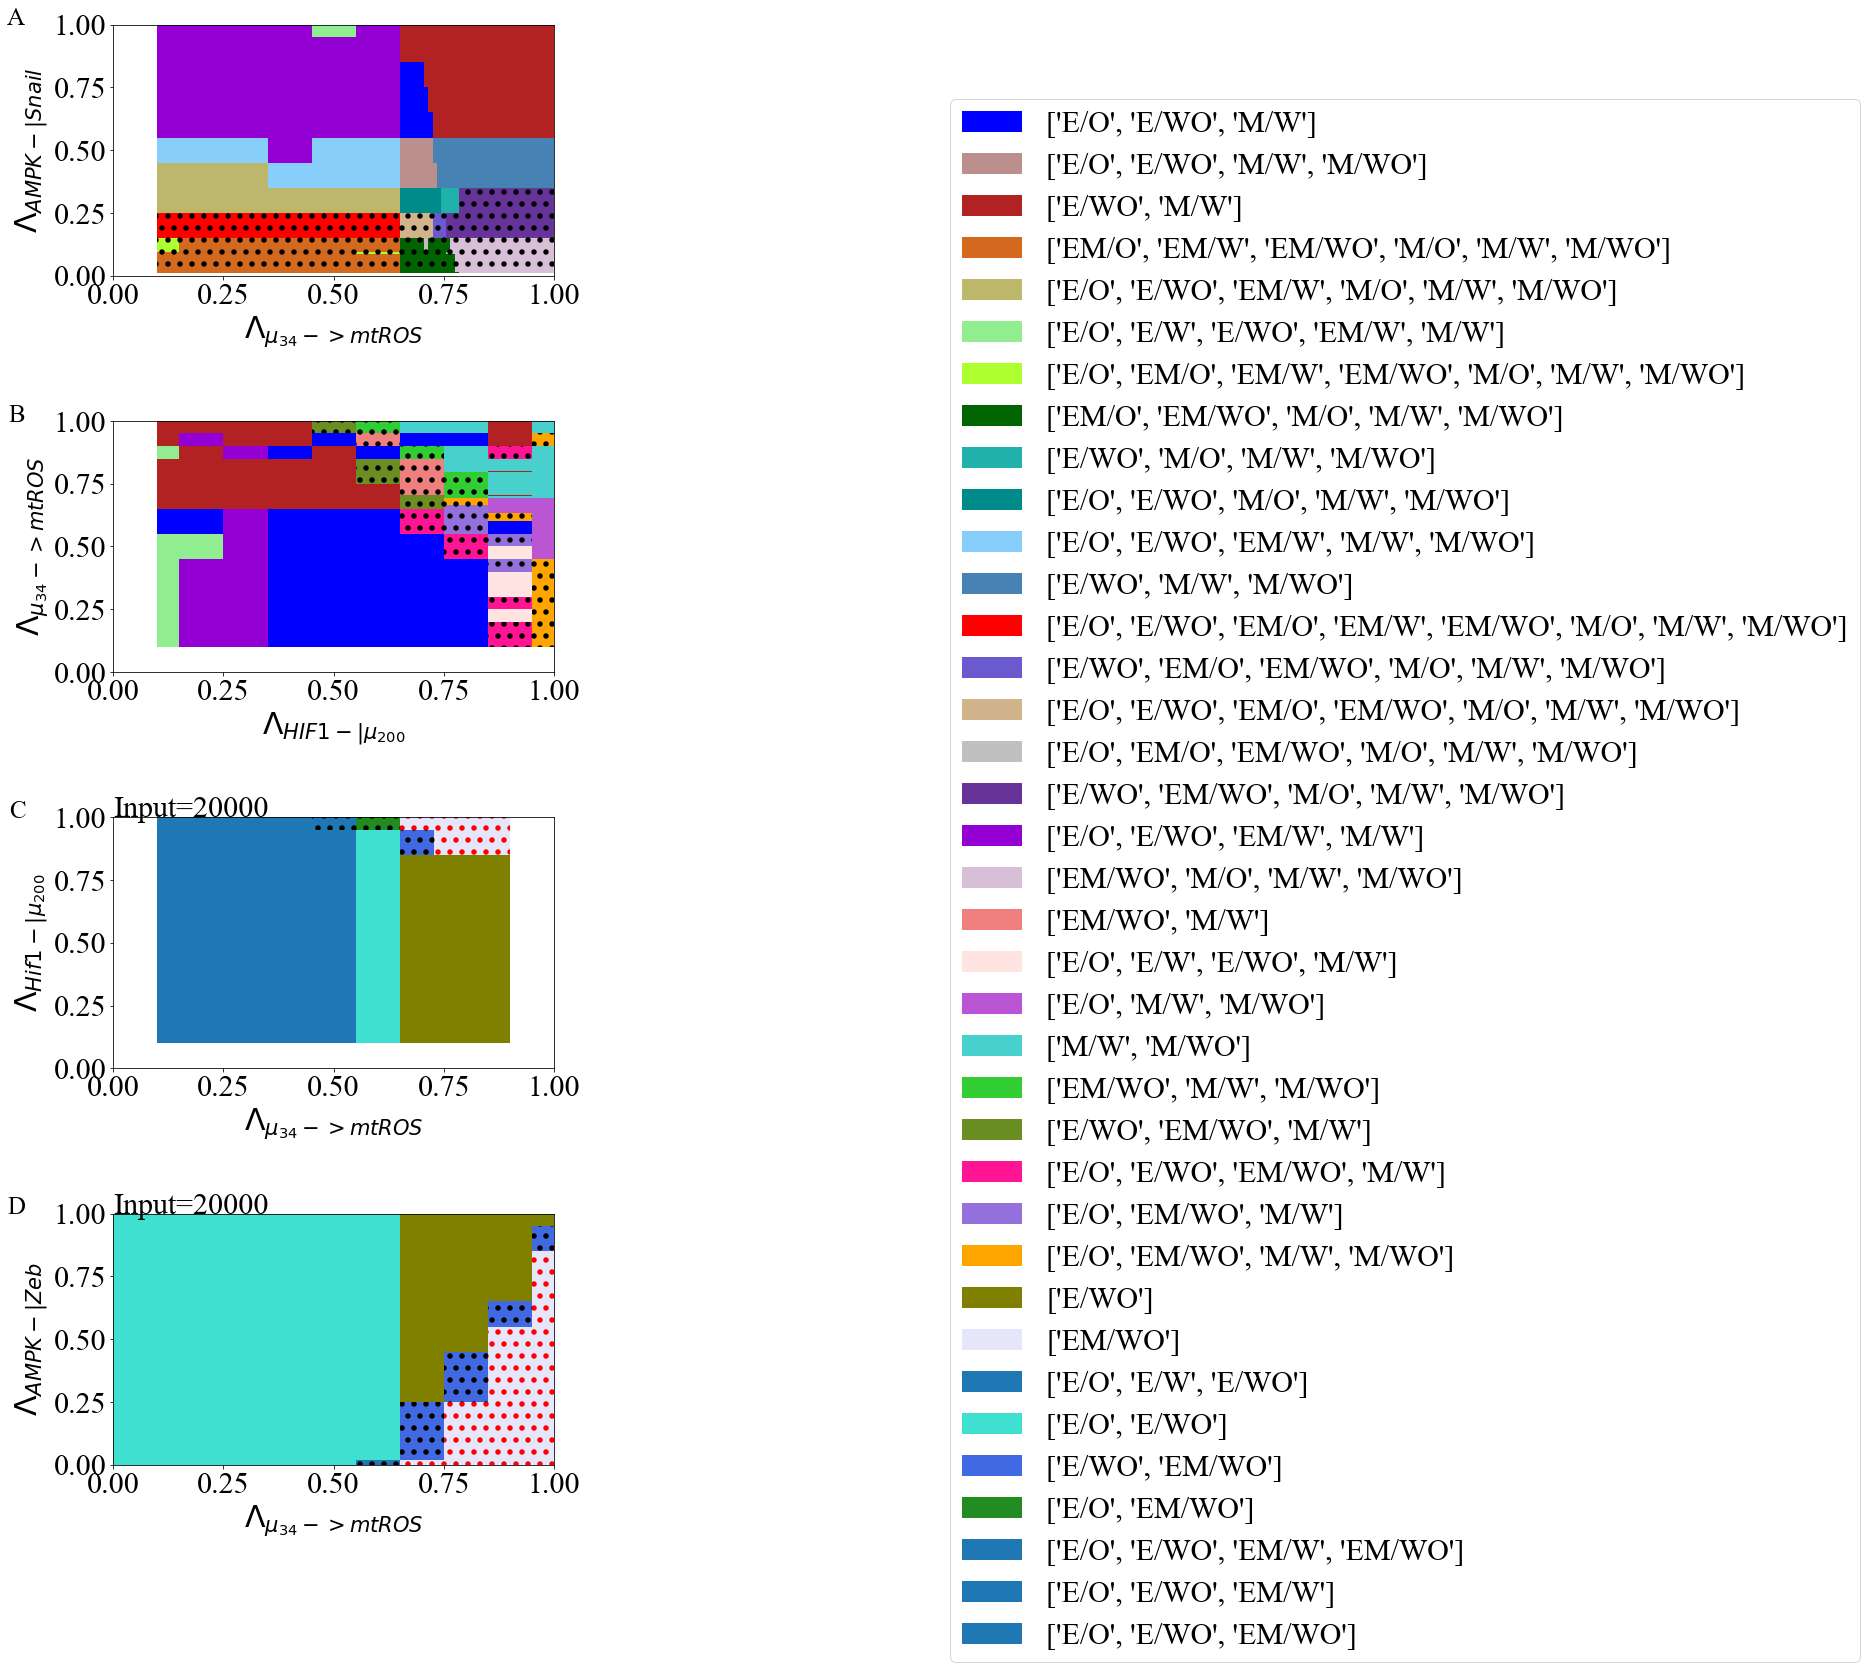

In [25]:
fig = plt.figure(figsize=(4,10))#figsize=(8,13))
gs1 = gridspec.GridSpec(7,3, height_ratios=[1,0.5,1.,0.5,1,0.5,1], width_ratios=[1.,0.5,1])
gs1.update(left=0.05, right=4, wspace=0.05,hspace=0.05,top=2,bottom=0)
fs =30
matplotlib.rcParams.update({'font.size':fs})
##########
axa = plt.subplot(gs1[0,0])
l1=plotPhases(axa,'A','data/data_4a_si',"$\Lambda_{\mu_{34}->mtROS}$","$\Lambda_{AMPK-|Snail}$",xlim=[0,1],ylim=[0,1],legend='return')
#axa.text(0,1,'UHV=310')
#axa = plt.subplot(gs1[0,2])
#plotEMWOheatmap(axa,'','data/data_s2',"$\lambda_{\mu_{34}->noxROS}$","$\lambda_{\mu_{34}->mtROS}$",xlim=[0,1],ylim=[0,1])


axb = plt.subplot(gs1[2,0])
l2=plotPhases(axb,'B','data/data_4b_si',"$\Lambda_{HIF1-|\mu_{200}}$","$\Lambda_{\mu_{34}->mtROS}$",xlim=[0,1],ylim=[0,1],legend='return')
#axb.text(0,9,'AZ=0.4, HS=1.1, Hu=0.1')
#axb = plt.subplot(gs1[2,2])
#plotEMWOheatmap(axb,'','data/data_s3',"$\lambda_{\mu_{34}->noxROS}$","$\lambda_{\mu_{34}->mtROS}$",xlim=[0,0.9],ylim=[1,9])


axc = plt.subplot(gs1[4,0])
l3=plotPhases(axc,'C','data/data_s4',"$\Lambda_{\mu_{34}->mtROS}$","$\Lambda_{Hif1-|\mu_{200}}$",xlim=[0,1],ylim=[0,1],legend='return')
axc.text(0,1,'Input=20000')
#axc = plt.subplot(gs1[4,2])
#plotEMWOheatmap(axc,'','data/data_s4',"$\lambda_{\mu_{34}->noxROS}$","$\lambda_{\mu_{34}->mtROS}$",xlim=[0,1],ylim=[0,1])

axc = plt.subplot(gs1[6,0])
l4=plotPhases(axc,'D','data/data_s4d',"$\Lambda_{\mu_{34}->mtROS}$","$\Lambda_{AMPK-|Zeb}$",legend='return',xlim=(0,1),ylim=(0,1))
axc.text(0,1,'Input=20000')
#axc = plt.subplot(gs1[6,2])



checks=[]
legend_elements=[]
for i in range(len(l1[1])):
    item = l1[1][i]
    col=l1[0][i]
    if item not in checks:
        legend_elements+=[ Patch(facecolor=col,label=item)]
        checks+=[item]
for i in range(len(l2[1])):
    item = l2[1][i]
    col=l2[0][i]
    if item not in checks:
        legend_elements+=[ Patch(facecolor=col,label=item)]
        checks+=[item]
for i in range(len(l3[1])):
    item = l3[1][i]
    col=l3[0][i]
    if item not in checks:
        legend_elements+=[ Patch(facecolor=col,label=item)]
        checks+=[item]
for i in range(len(l4[1])):
    item = l4[1][i]
    col=l4[0][i]
    if item not in checks:
        legend_elements+=[ Patch(facecolor=col,label=item)]
        checks+=[item]
        
axc.legend(handles=legend_elements, bbox_to_anchor=(4,5.5))

fig.savefig("Figure_S19.png",bbox_inches='tight')#,dpi=300)

# Figure S20
### MR bifurcation - noWO

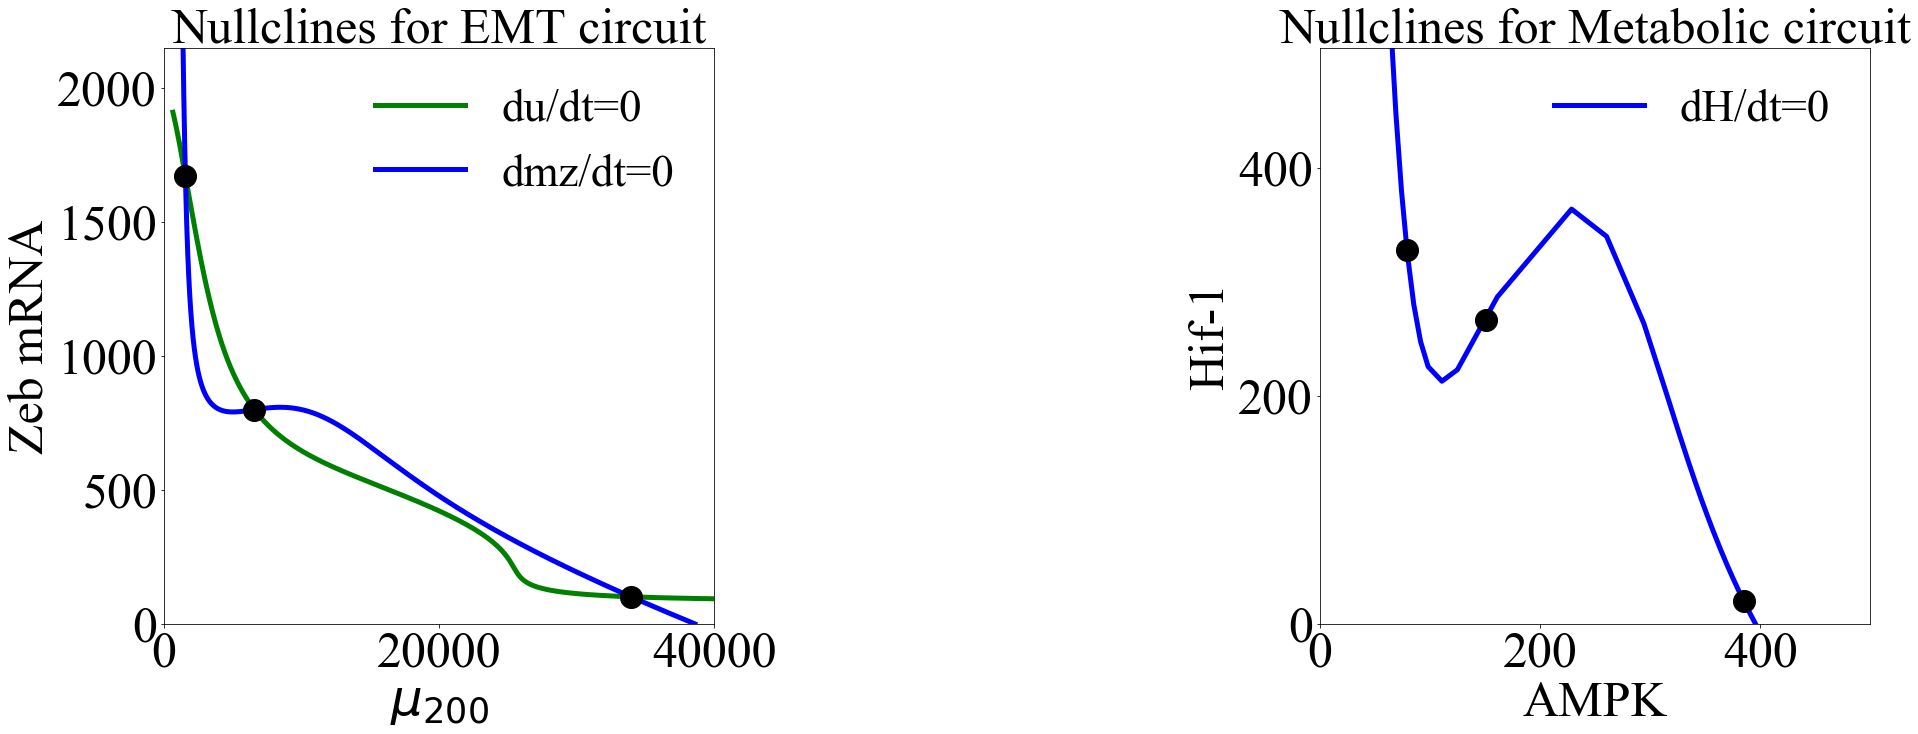

In [26]:
fig = plt.figure(figsize=(6,4))#figsize=(8,13))
gs1 = gridspec.GridSpec(1,3)#5, 3, height_ratios=[1,0.5,1.,0.7,1.], width_ratios=[1.2,0.3,0.6])
gs1.update(left=0.05, right=4, wspace=0.05,hspace=0.05,top=2,bottom=0)
fs =50
matplotlib.rcParams.update({'font.size':fs})



ax1a = plt.subplot(gs1[0,0])
    
df_nullU=pd.read_csv("data/nullU_noEM.txt")
df_nullZ=pd.read_csv("data/nullMZ_noEM.txt")
df_fp=pd.read_csv("data/noEM_fp.txt")

ax1a.plot(df_nullU['u'],df_nullU['mz'],'g',label='du/dt=0',linewidth=5)
ax1a.plot(df_nullZ['u'],df_nullZ['mz'],'b',label='dmz/dt=0',lw=5)
ax1a.legend(frameon=False,fontsize=fs-5)
ax1a.plot(df_fp['u'],df_fp['mz'],'ok',markersize=22)
ax1a.set_xlabel("$\mu_{200}$")
ax1a.set_ylabel("Zeb mRNA")
ax1a.set_xlim(0,40000)
ax1a.set_ylim(0,2150)
ax1a.set_title("Nullclines for EMT circuit",fontsize=fs)

ax1a = plt.subplot(gs1[0,2])
    
df_nullA=pd.read_csv("data/nullA_noWO.txt")
df_nullH=pd.read_csv("data/nullh_noWO.txt")
df_fp=pd.read_csv("data/noWO_fp.txt")


#ax1a.plot(df_nullA['A'],df_nullA['h'],'g',label='dA/dt=0',linewidth=5)
ax1a.plot(df_nullH['A'],df_nullH['h'],'b',label='dH/dt=0',lw=5)
ax1a.legend(frameon=False,fontsize=fs-5)#,bbox_to_anchor=(0.7,0.2))
ax1a.plot(df_fp['A'],df_fp['h'],'ok',markersize=22)
ax1a.set_xlabel("AMPK")
ax1a.set_ylabel("Hif-1")
ax1a.set_xlim(0,500)
ax1a.set_ylim(0,505)
ax1a.set_title("Nullclines for Metabolic circuit",fontsize=fs)

fig.savefig("Figure_S20.png",bbox_inches='tight')#,dpi=300)

# Figure S21

ics for noHH

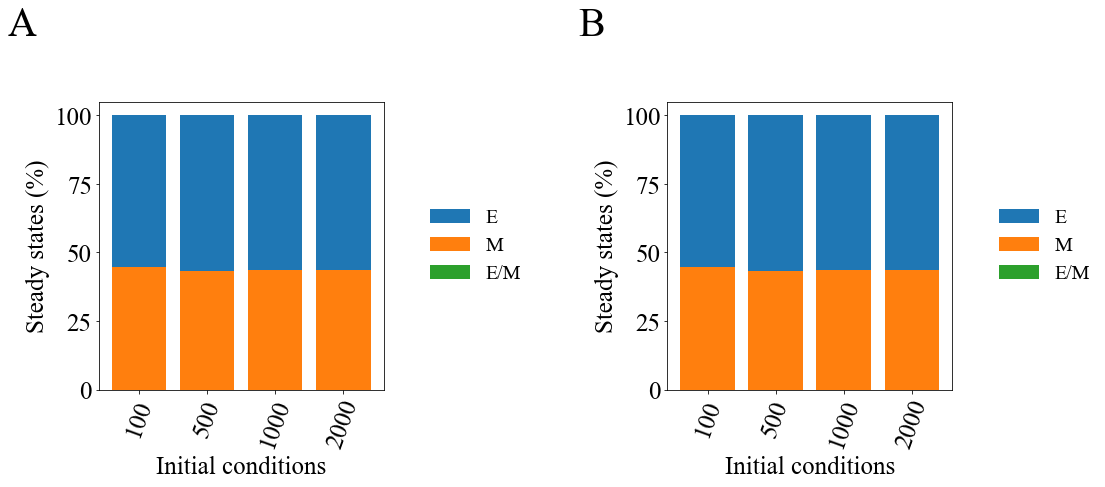

In [27]:
fig = plt.figure(figsize=(3,2))#figsize=(8,13))
gs1 = gridspec.GridSpec(1,3, height_ratios=[1], width_ratios=[1.,0.9,1.])
gs1.update(left=0.05, right=4, wspace=0.05,hspace=0.05,top=2,bottom=0)
fs =25
matplotlib.rcParams.update({'font.size':fs})

ax1c=plt.subplot(gs1[0,0])
df1c = pd.read_csv("data/data_noHHics.txt")
plotICS(ax1c,df1c,'E','M','EM')
ax1c.text(-0.22, 1.33, 'A',transform=ax1c.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+15)

ax1d=plt.subplot(gs1[0,2])
plotICS(ax1d,df1c,'O','W','WO')
ax1d.text(-0.22, 1.33, 'B',transform=ax1d.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+15)

fig.savefig("Figure_S21.png",bbox_inches='tight')#,dpi=300)

# Figure S22
noHH coupled ics

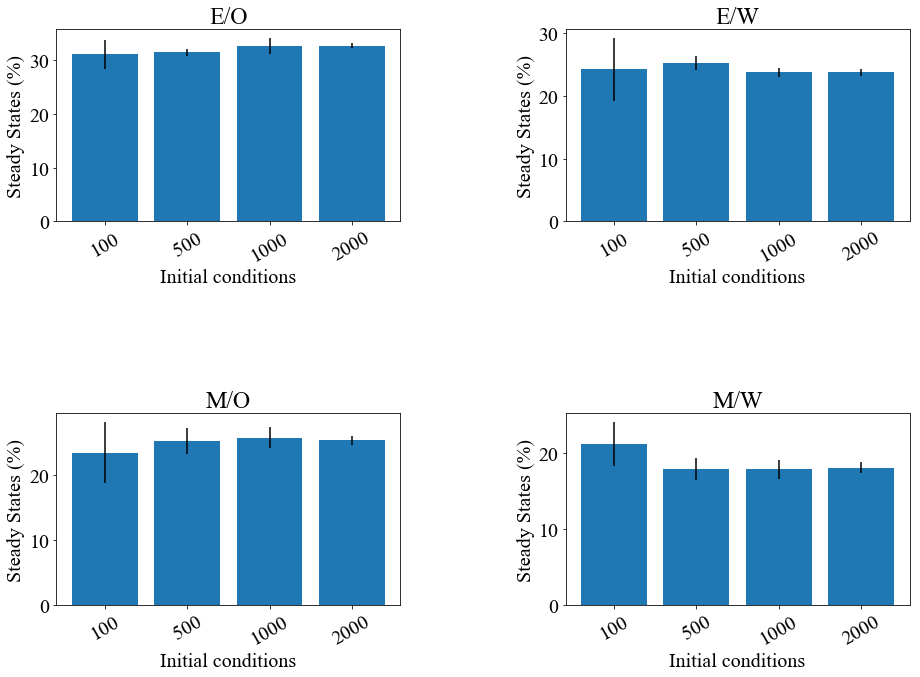

In [28]:
fig = plt.figure(figsize=(3,4))#figsize=(8,13))
gs1 = gridspec.GridSpec(3,3, height_ratios=[1,0.9,1.], width_ratios=[1.,0.4,1])
gs1.update(left=0.05, right=4, wspace=0.05,hspace=0.05,top=2,bottom=0)
fs =20
matplotlib.rcParams.update({'font.size':fs})
df = pd.read_csv("data/data_noHHics.txt")

row,col=0,0
for key in ['E/O','E/W','M/O','M/W']:
    ax = plt.subplot(gs1[row,col])
    inds = np.argsort(df['icsNumber'].values)
    ax.bar(np.arange(len(df['icsNumber'])),df[key+"Avg"].values[inds],yerr=df[key+"Std"].values[inds])
    ax.set_title(key)
    ax.set_ylabel("Steady States (%)")
    ax.set_xlabel("Initial conditions")
    ax.set_xticks(np.arange(len(df['icsNumber'])))
    ax.set_xticklabels(df['icsNumber'].values[inds],rotation=30)
    col+=2
    if col==4:
        row+=2
        col=0
fig.savefig("Figure_S22.png",bbox_inches='tight')#,dpi=300)

# Figure S23

NoWO: u3n and uh singles

data/data_nowo_u3n $\Lambda_{\mu_{34}->noxROS}$


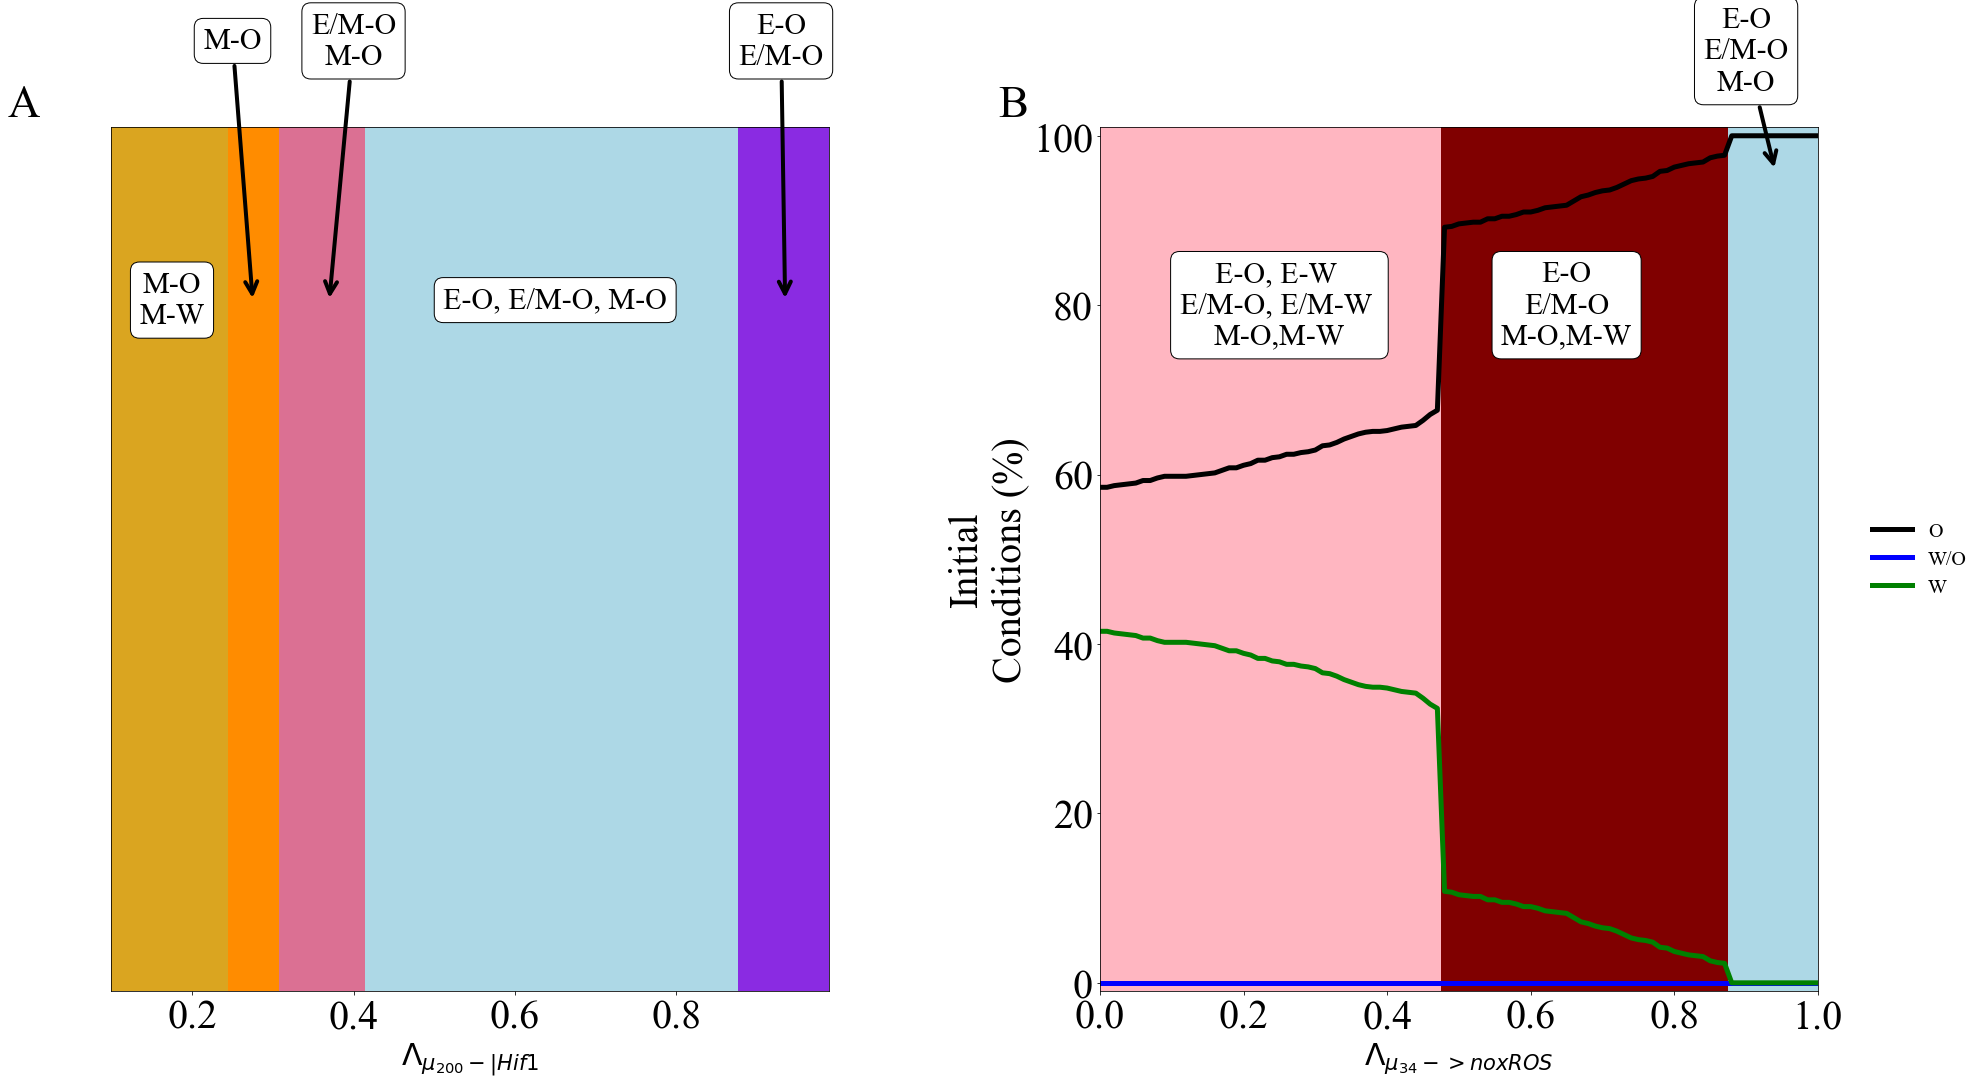

In [29]:
fig = plt.figure(figsize=(6,4))
gs1 = gridspec.GridSpec(1,3, height_ratios=[1], width_ratios=[1,0.3,1])
gs1.update(left=0.05, right=4, wspace=0.05,hspace=0.05,top=3.,bottom=0)
fs =40
matplotlib.rcParams.update({'font.size':fs})
matplotlib.rcParams.update({'hatch.linewidth':3})
##########


##########
##########
ax2b = plt.subplot(gs1[0,0])
ax2b.text(-0.1, 1.05, 'A',transform=ax2b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
plotPhases(ax2b,'',"data/data_nowo_uh",xlabel="$\Lambda_{\mu_{200}-| Hif1}$",legend=False,ylim=[0.5,1],xlim=(0.1,0.99))
#ax2b.text(0,0.2,'FIX!!!')
ax2b.set_yticks([])
ax2b.set_yticklabels([])

ax2b.annotate('M-O\nM-W', fontsize=30,xy=(0.175, 0.9), xycoords="data",xytext=(0.175,0.9), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))#,arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('M-O', fontsize=30,xy=(0.275, 0.9), xycoords="data",xytext=(0.25,1.05), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E/M-O\nM-O', fontsize=30,xy=(0.37, 0.9), xycoords="data",xytext=(0.4,1.05), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-O, E/M-O, M-O', fontsize=30,xy=(0.65, 0.9), xycoords="data",xytext=(0.65,0.9), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))#,arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-O\nE/M-O', fontsize=30,xy=(0.935,0.9), xycoords="data",xytext=(0.93,1.05), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))

#titleStart = 'data/data_nowo_uh'
#labs = colorMap(titleStart+"_legend.txt",reduced=True)
#df = pd.read_csv(titleStart+".txt")
#for i in range(len(df)):
#            ax2b.fill_between([df['X1'].values[i],df['X2'].values[i]],-10,110,facecolor=getColor(labs[df['color'].values[i]]),linewidth=0.0)


##########
##########
ax2b = plt.subplot(gs1[0,2])
ax2b.text(-0.1, 1.05, 'B',transform=ax2b.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
plotPhaseICS(ax2b,'',"data/data_nowo_u3n",'MR',xlabel="$\Lambda_{\mu_{34}->noxROS}$",xlim=(0,1))
ax2b.annotate('E-O\nE/M-O\nM-O', fontsize=30,xy=(0.94, 96), xycoords="data",xytext=(0.9,110), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-O\nE/M-O\nM-O,M-W', fontsize=30,xy=(0.65, 80), xycoords="data",xytext=(0.65,80), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))#,arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-O, E-W \nE/M-O, E/M-W \nM-O,M-W', fontsize=30,xy=(0.25, 90), xycoords="data",xytext=(0.25,80), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))#,arrowprops=dict(arrowstyle="->",lw=4))


fig.savefig("Figure_S23.png",bbox_inches='tight')#,dpi=300)

# Figure S24

NoEM: all singles except Hu

data/data_noem_AS $\Lambda_{AMPK-|Snail}$
data/data_noem_AZ $\Lambda_{Ampk-|Zeb}$


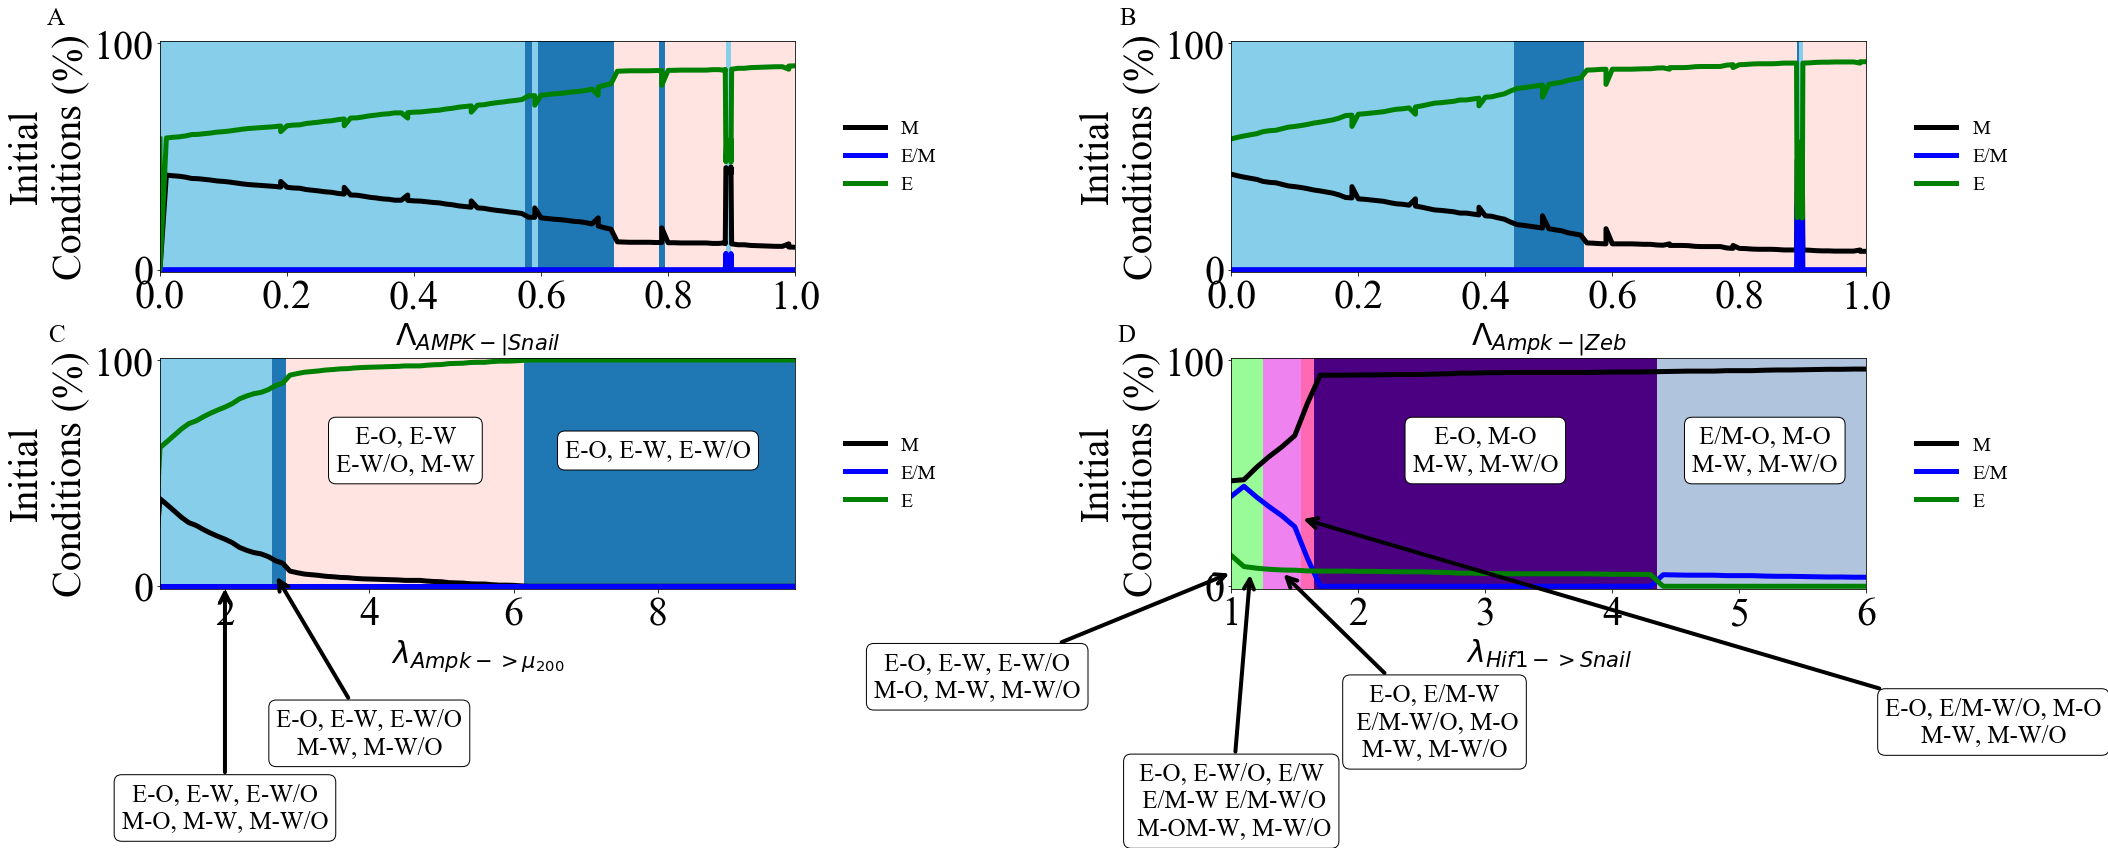

In [30]:
fig = plt.figure(figsize=(6,4))
gs1 = gridspec.GridSpec(5,3, height_ratios=[1,0.3,1,0.3,1], width_ratios=[1,0.6,1])
gs1.update(left=0.05, right=4, wspace=0.05,hspace=0.05,top=3.,bottom=0)
fs =40
matplotlib.rcParams.update({'font.size':fs})
matplotlib.rcParams.update({'hatch.linewidth':3})
##########

##########
##########
ax2b = plt.subplot(gs1[0,0])
plotPhaseICS(ax2b,'A',"data/data_noem_AS",'EMT',xlabel="$\Lambda_{AMPK-|Snail}$",xlim=(0,1))

##########
ax2b = plt.subplot(gs1[0,2])
plotPhaseICS(ax2b,'B',"data/data_noem_AZ",'EMT',xlabel="$\Lambda_{Ampk-|Zeb}$",xlim=(0,1))
##########
ax2b = plt.subplot(gs1[2,0])
plotPhaseICS(ax2b,'C',"data/data_noem_Au",'EMT',xlabel="$\lambda_{Ampk->\mu_{200}}$",xlim=(1.1,9.9))
ax2b.annotate('E-O, E-W, E-W/O\nM-W, M-W/O', fontsize=25,xy=(2.7, 5), xycoords="data",xytext=(4,-65), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-O, E-W\nE-W/O, M-W', fontsize=25,xy=(4.5, 60), xycoords="data",xytext=(4.5,60), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))#,arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-O, E-W, E-W/O\nM-O, M-W, M-W/O', fontsize=25,xy=(2, 0), xycoords="data",xytext=(2,-98), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-O, E-W, E-W/O', fontsize=25,xy=(8, 60), xycoords="data",xytext=(8,60), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))

##########
##########
ax2b = plt.subplot(gs1[2,2])
plotPhaseICS(ax2b,'D',"data/data_noem_HS",'EMT',xlabel="$\lambda_{Hif1->Snail}$",xlim=(1.,6.))#ax2b.annotate('E-O, E-W, E-W/O\nE/M-O,E/M-W,E/M-W/O\nM-O, M-W, M-W/O', fontsize=30,xy=(50000, 100), xycoords="data",xytext=(45000,160), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E/M-O, M-O\nM-W, M-W/O', fontsize=25,xy=(5.2, 60), xycoords="data",xytext=(5.2,60), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-O, M-O\nM-W, M-W/O', fontsize=25,xy=(3, 60), xycoords="data",xytext=(3,60), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-O, E/M-W/O, M-O\nM-W, M-W/O', fontsize=25,xy=(1.55, 30), xycoords="data",xytext=(7,-60), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-O, E/M-W\n E/M-W/O, M-O\nM-W, M-W/O', fontsize=25,xy=(1.4, 6), xycoords="data",xytext=(2.6,-60), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-O, E-W/O, E/W\n E/M-W E/M-W/O\n M-OM-W, M-W/O', fontsize=25,xy=(1.15, 6), xycoords="data",xytext=(1,-95), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E-O, E-W, E-W/O\nM-O, M-W, M-W/O', fontsize=25,xy=(1, 6), xycoords="data",xytext=(-1,-40), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))


fig.savefig("Figure_S24.png",bbox_inches='tight')#,dpi=300)

# Figure S25

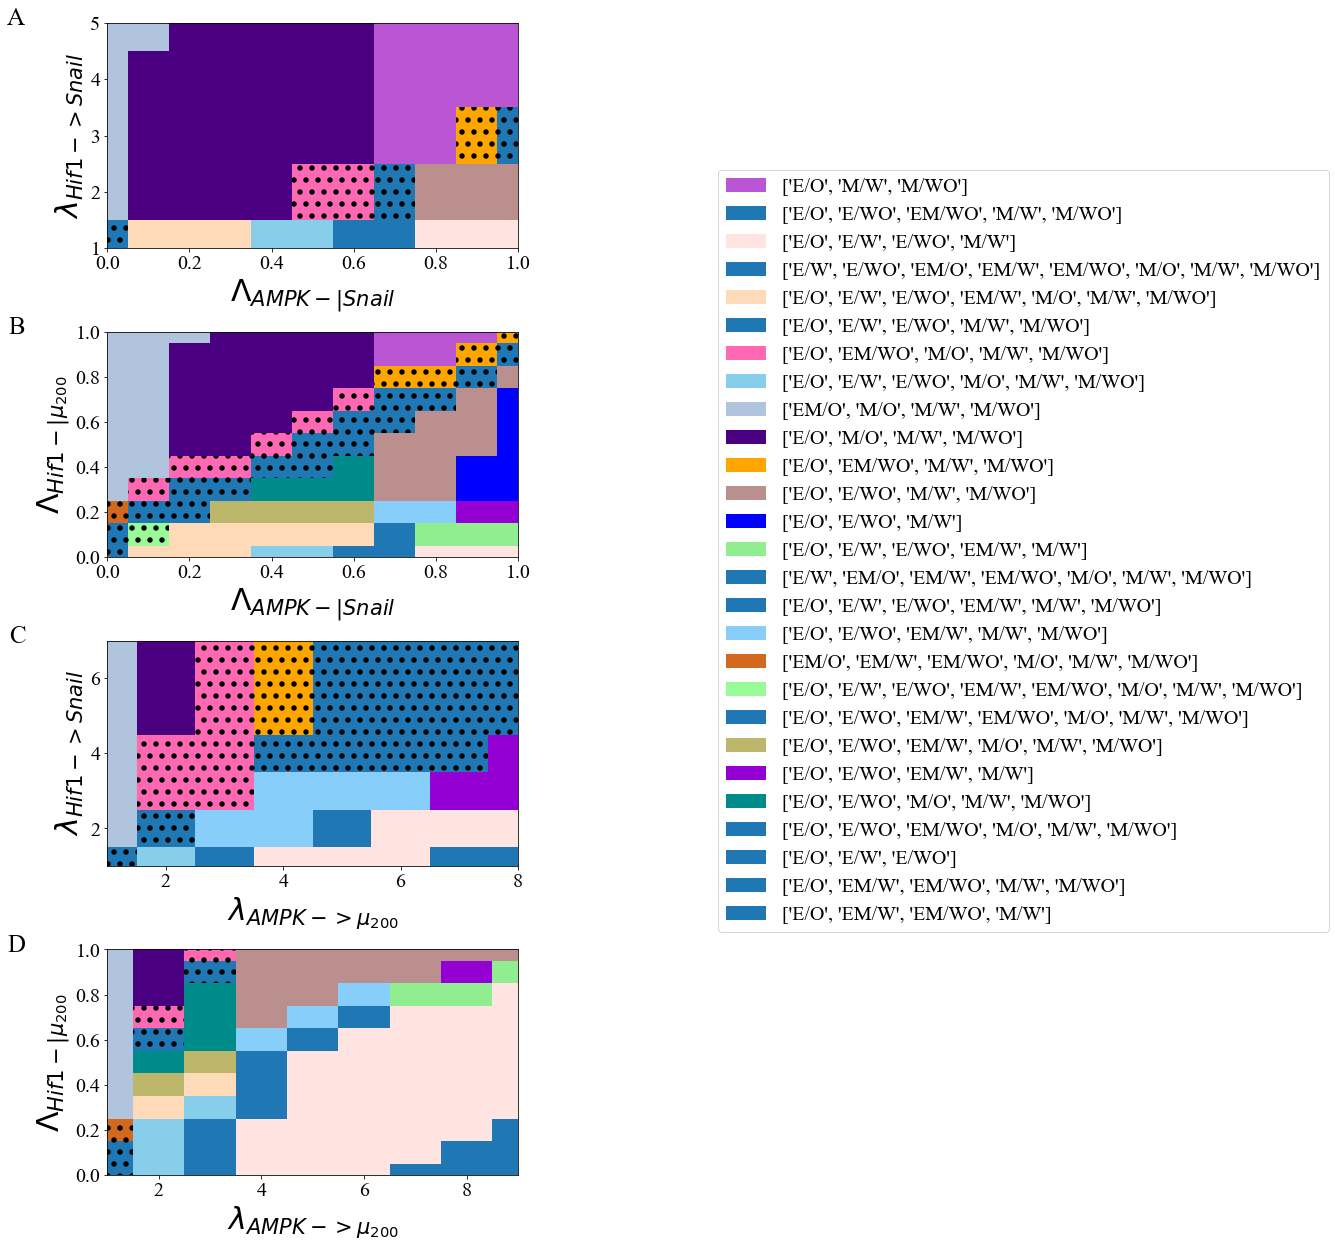

In [31]:
fig = plt.figure()#figsize=(6,4))
gs1 = gridspec.GridSpec(7,1, height_ratios=[1,0.3,1,0.3,1,0.3,1])#, width_ratios=[1,0.3,1])
gs1.update(left=0.05, right=1, wspace=0.05,hspace=0.05,top=4.,bottom=0)
fs =20
matplotlib.rcParams.update({'font.size':fs})
matplotlib.rcParams.update({'hatch.linewidth':3})
##########

##########
##########
ax2a = plt.subplot(gs1[0,0])
l1=plotPhases(ax2a,'A',"data/data_noem_AS_HS","$\Lambda_{AMPK-|Snail}$","$\lambda_{Hif1->Snail}$",reduced=False,ylim=[1,5],xlim=(0,1),legend='return')
##########
ax2b = plt.subplot(gs1[2,0])
l2=plotPhases(ax2b,'B',"data/data_noem_AS_Hu","$\Lambda_{AMPK-|Snail}$","$\Lambda_{Hif1-|\mu_{200}}$",reduced=False,ylim=[0,1],xlim=(0,1),legend='return')

ax2c = plt.subplot(gs1[4,0])
l3=plotPhases(ax2c,'C',"data/data_noem_Au_HS","$\lambda_{AMPK->\mu_{200}}$","$\lambda_{Hif1->Snail}$",reduced=False,ylim=[1,7],xlim=(1,8),legend='return')

ax2d = plt.subplot(gs1[6,0])
l4=plotPhases(ax2d,'D',"data/data_noem_Au_Hu","$\lambda_{AMPK->\mu_{200}}$","$\Lambda_{Hif1-|\mu_{200}}$",reduced=False,ylim=[0,1],xlim=(1,9),legend='return')

checks=[]
legend_elements=[]
for i in range(len(l1[1])):
    item = l1[1][i]
    col=l1[0][i]
    if item not in checks:
        legend_elements+=[ Patch(facecolor=col,label=item)]
        checks+=[item]
for i in range(len(l2[1])):
    item = l2[1][i]
    col=l2[0][i]
    if item not in checks:
        legend_elements+=[ Patch(facecolor=col,label=item)]
        checks+=[item]
for i in range(len(l3[1])):
    item = l3[1][i]
    col=l3[0][i]
    if item not in checks:
        legend_elements+=[ Patch(facecolor=col,label=item)]
        checks+=[item]
for i in range(len(l4[1])):
    item = l4[1][i]
    col=l4[0][i]
    if item not in checks:
        legend_elements+=[ Patch(facecolor=col,label=item)]
        checks+=[item]
        
ax2d.legend(handles=legend_elements, bbox_to_anchor=(3.,4.5))

fig.savefig("Figure_S25.png",bbox_inches='tight')#,dpi=300)

# Figure S26
### full for 6C

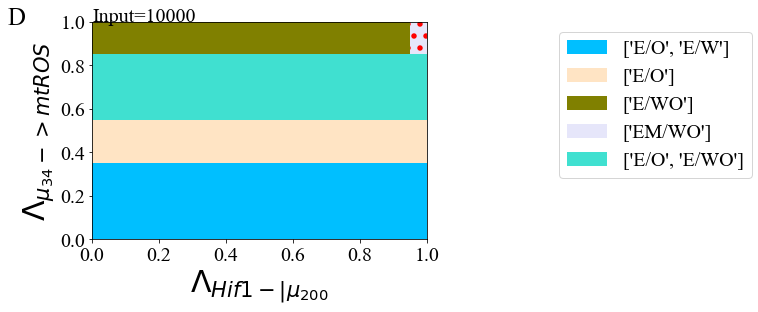

In [32]:
fig = plt.figure()#figsize=(8,13))
gs1 = gridspec.GridSpec(1,1)#, height_ratios=[1,0.5,1.,0.5,1,0.5,1], width_ratios=[1.,0.5,1])
#gs1.update(left=0.05, right=0.5, wspace=0.05,hspace=0.05,top=1,bottom=0)
fs =20
matplotlib.rcParams.update({'font.size':fs})
##########
axc = plt.subplot(gs1[0,0])
plotPhases(axc,'D','data/data_s6cnoHH',"$\Lambda_{Hif1-|\mu_{200}}$","$\Lambda_{\mu_{34}->mtROS}$",legend=True,xlim=(0,1),ylim=(0,1),legendLoc=(2.,1))
axc.text(0,1,'Input=10000')
#axc = plt.subplot(gs1[6,2])

fig.savefig("Figure_S26.png",bbox_inches='tight')#,dpi=300)

# Figure S27 psf res

(0.0, 0.0, 100.0)


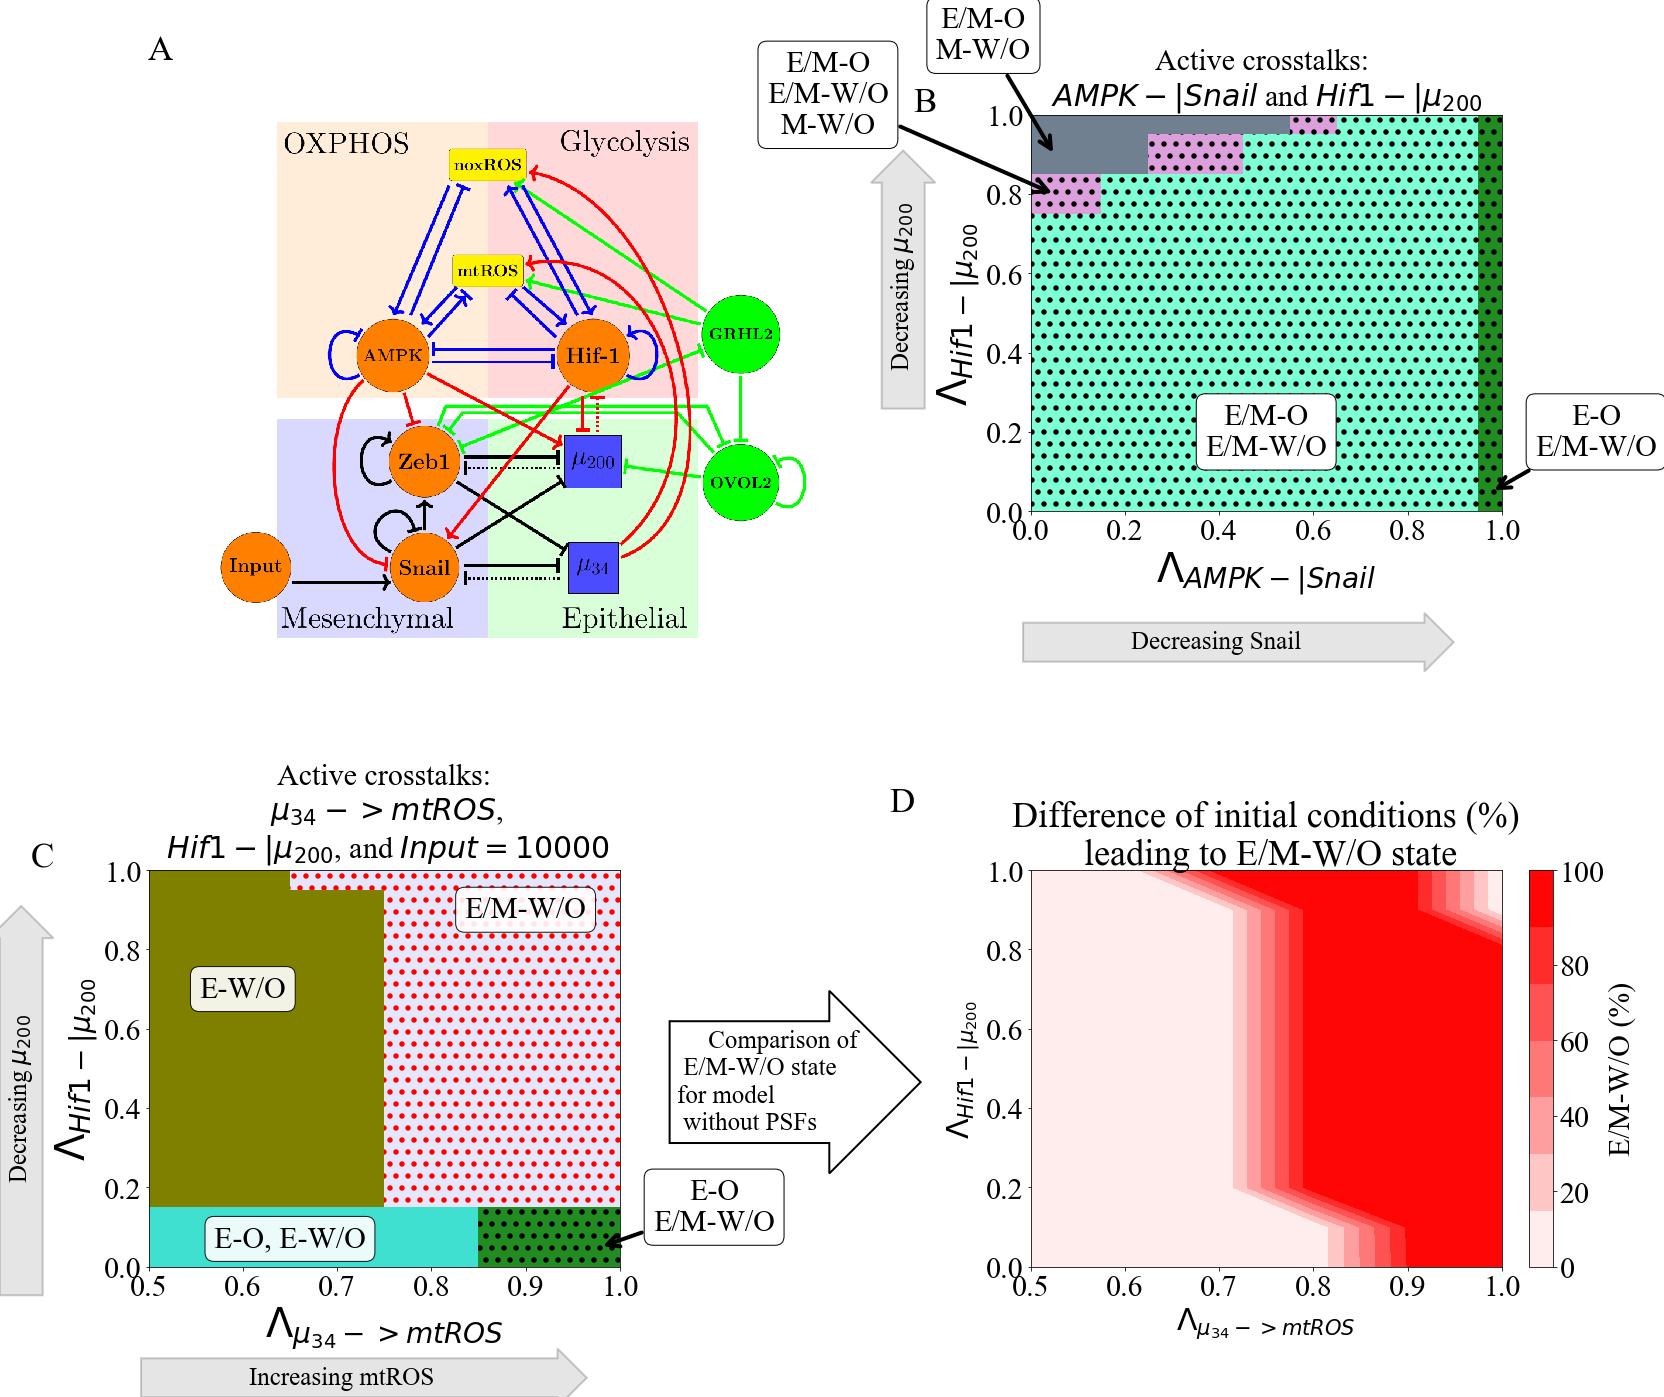

In [39]:
#############
### a1 = u3m
### b2 = HS
### B4 =  AS
### c1 = Hu, u3m, input=10000
### C2 = AS, Hu
fig = plt.figure(figsize=(10,8))
c1,c2=0.7,0.3
c3=0.4
c4,c5=0.3,0.4
gs1 = gridspec.GridSpec(4,6, height_ratios=[1.,0.3,0.5,1], width_ratios=[1,0.5,0.3,1,0.01,0.05])
gs1.update(left=0.05, right=2., wspace=0.05,hspace=0.05,top=2.,bottom=0)
fs =30
matplotlib.rcParams.update({'font.size':fs})
matplotlib.rcParams.update({'hatch.linewidth':3})

##########
###################
ax6a = plt.subplot(gs1[0:2,0:2])
ax6a.text(-0.05, 1.15, 'A',transform=ax6a.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs+5)
img = Image.open('network_psf.png')
#img.resize((8000,8000))
a = np.asarray(img)
ax6a.imshow(a)
ax6a.axis("off")


##########
#############
ax6e = plt.subplot(gs1[0,3])
plotPhases(ax6e,'B','data_6c2',"$\Lambda_{AMPK-|Snail}$","$\Lambda_{Hif1-|\mu_{200}}$",legend=False,xlim=[0.,1],ylim=[0.,1],fs=fs)

ax6e.annotate('E-O\nE/M-W/O', fontsize=30,xy=(0.98, 0.05), xycoords="data",xytext=(1.2,0.2), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax6e.annotate('E/M-O\nE/M-W/O', fontsize=30,xy=(0.5, 0.2), xycoords="data",xytext=(0.5,0.2), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"))#,arrowprops=dict(arrowstyle="->",lw=4))
ax6e.annotate('E/M-O\nM-W/O', fontsize=30,xy=(0.05, 0.9), xycoords="data",xytext=(-.1,1.2), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax6e.annotate('E/M-O\nE/M-W/O\nM-W/O', fontsize=30,xy=(0.05, 0.8), xycoords="data",xytext=(-.43,1.05), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
t=ax6e.text(0., -0.3, "                Decreasing Snail                     ",
            size=fs-5,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=0)
t=ax6e.text(-0.3, 0.85, "     Decreasing $\mu_{200}$     ",
            size=fs-5,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=90)
ax6e.text(.5,1.16,"Active crosstalks: \n$AMPK -| Snail$ and $Hif1-|\mu_{200}$",
          transform=ax6e.transAxes,verticalalignment='top', horizontalalignment='center',color='black', fontsize=fs)

############
ax6d = plt.subplot(gs1[3,0])
plotPhases(ax6d,'C','data_6c1',"$\Lambda_{\mu_{34}->mtROS}$","$\Lambda_{Hif1-|\mu_{200}}$",xlim=[0.5,1],ylim=[0,1],legend=False,switchX=False,fs=fs)

ax6d.annotate('E-O\nE/M-W/O', fontsize=30,xy=(0.98, 0.05), xycoords="data",xytext=(1.1,.15), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax6d.annotate('E/M-W/O', fontsize=30,xy=(0.9,0.9), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w",alpha=0.9))
ax6d.annotate('E-W/O', fontsize=30,xy=(0.6,0.7), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w",alpha=0.9))
ax6d.annotate('E-O, E-W/O', fontsize=30,xy=(0.65,0.07), xycoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w",alpha=0.9))

t=ax6d.text(0.5, -0.25, "                Increasing mtROS                     ",
            size=fs-5,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=0)
t=ax6d.text(0.35, 0.85, "                 Decreasing $\mu_{200}$              ",
            size=fs-5,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="gray", ec="k", lw=2,alpha=0.2),rotation=90)
ax6d.text(.5,1.26,"Active crosstalks:\n $\mu_{34}->mtROS$, \n $Hif1 -| \mu_{200}$, and $Input=10000$",
          transform=ax6d.transAxes,verticalalignment='top', horizontalalignment='center',color='black', fontsize=fs)

ax6d = plt.subplot(gs1[3,3])
ax6e = plt.subplot(gs1[3,5])
plotEMWOheatmap_diff(ax6d,ax6e,fig,'','data_6c1_1',xlim=[0.5,1],ylim=[0,1])
ax6d.text(0.35,1.15,"D",fontsize=fs+5)
ax6d.set_xlabel("$\Lambda_{\mu_{34}->mtROS}$")
ax6d.set_ylabel("$\Lambda_{Hif1-|\mu_{200}}$")
ax6d.set_title("Difference of initial conditions (%)\n leading to E/M-W/O state")
t=ax6d.text(0.125, 0.6, "     Comparison of\n E/M-W/O state\nfor model\n without PSFs     ",
            size=fs-5,verticalalignment='top', bbox=dict(boxstyle="rarrow", fc="w", ec="k", lw=2,alpha=1),rotation=0)
fig.savefig("Figure_S27.png",bbox_inches='tight')#,dpi=300)

# Figure S28 fig 10

# old Figure S27
### PSF initial conditions comparison (only have EM/WO and EM/O)

Text(0.5,1,'Coupled Network with Protein Stability Factors\n Convergence of initial conditions')

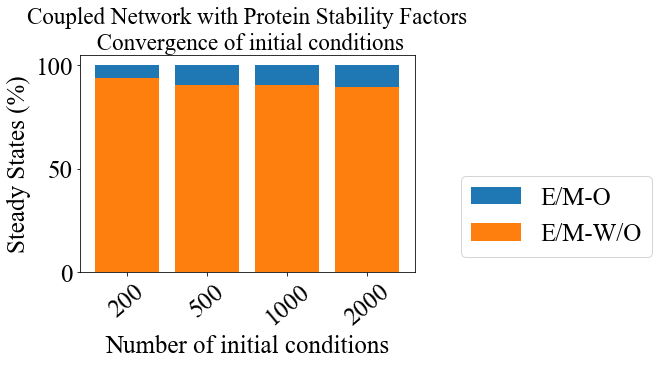

In [34]:
fig = plt.figure()#figsize=(4,10))#figsize=(8,13))
gs1 = gridspec.GridSpec(1,1)#, height_ratios=[1,0.5,1.,0.5,1,0.5,1], width_ratios=[1.,0.5,1])
#gs1.update(left=0.05, right=4, wspace=0.05,hspace=0.05,top=2,bottom=0)
fs =25
matplotlib.rcParams.update({'font.size':fs})
##########
axc = plt.subplot(gs1[0,0])
df1c = pd.read_csv("data/data_PSF_ics.txt")
axc.bar(np.arange(0,len(df1c['EM/OAvg'])),df1c['EM/OAvg']+df1c['EM/WOAvg'],label='E/M-O')
axc.bar(np.arange(0,len(df1c['EM/OAvg'])),df1c['EM/WOAvg'],label='E/M-W/O')

axc.set_xticks(np.arange(0,len(df1c['EM/OAvg'])))
axc.set_xticklabels(df1c['icsNumber'],rotation=40)
axc.set_ylabel("Steady States (%)")
axc.set_xlabel("Number of initial conditions")
axc.legend(bbox_to_anchor=(1.1,0.5))
axc.set_title("Coupled Network with Protein Stability Factors\n Convergence of initial conditions",fontsize=fs-2)
#fig.savefig("Figure_oldS27.png",bbox_inches='tight')#,dpi=300)

#  old Figure S28

### PSF
### may only need Hif and AMPK? -  show the coupled states

data/data_PSF_AS $\lambda_{AMPK-|Snail}$
data/data_PSF_Hu $\lambda_{Hif1-|\mu_{200}}$
data/data_PSF_u3m $\lambda_{\mu_{34}->mtROS}$
data/data_PSF_u3n $\lambda_{\mu_{34}->noxROS}$


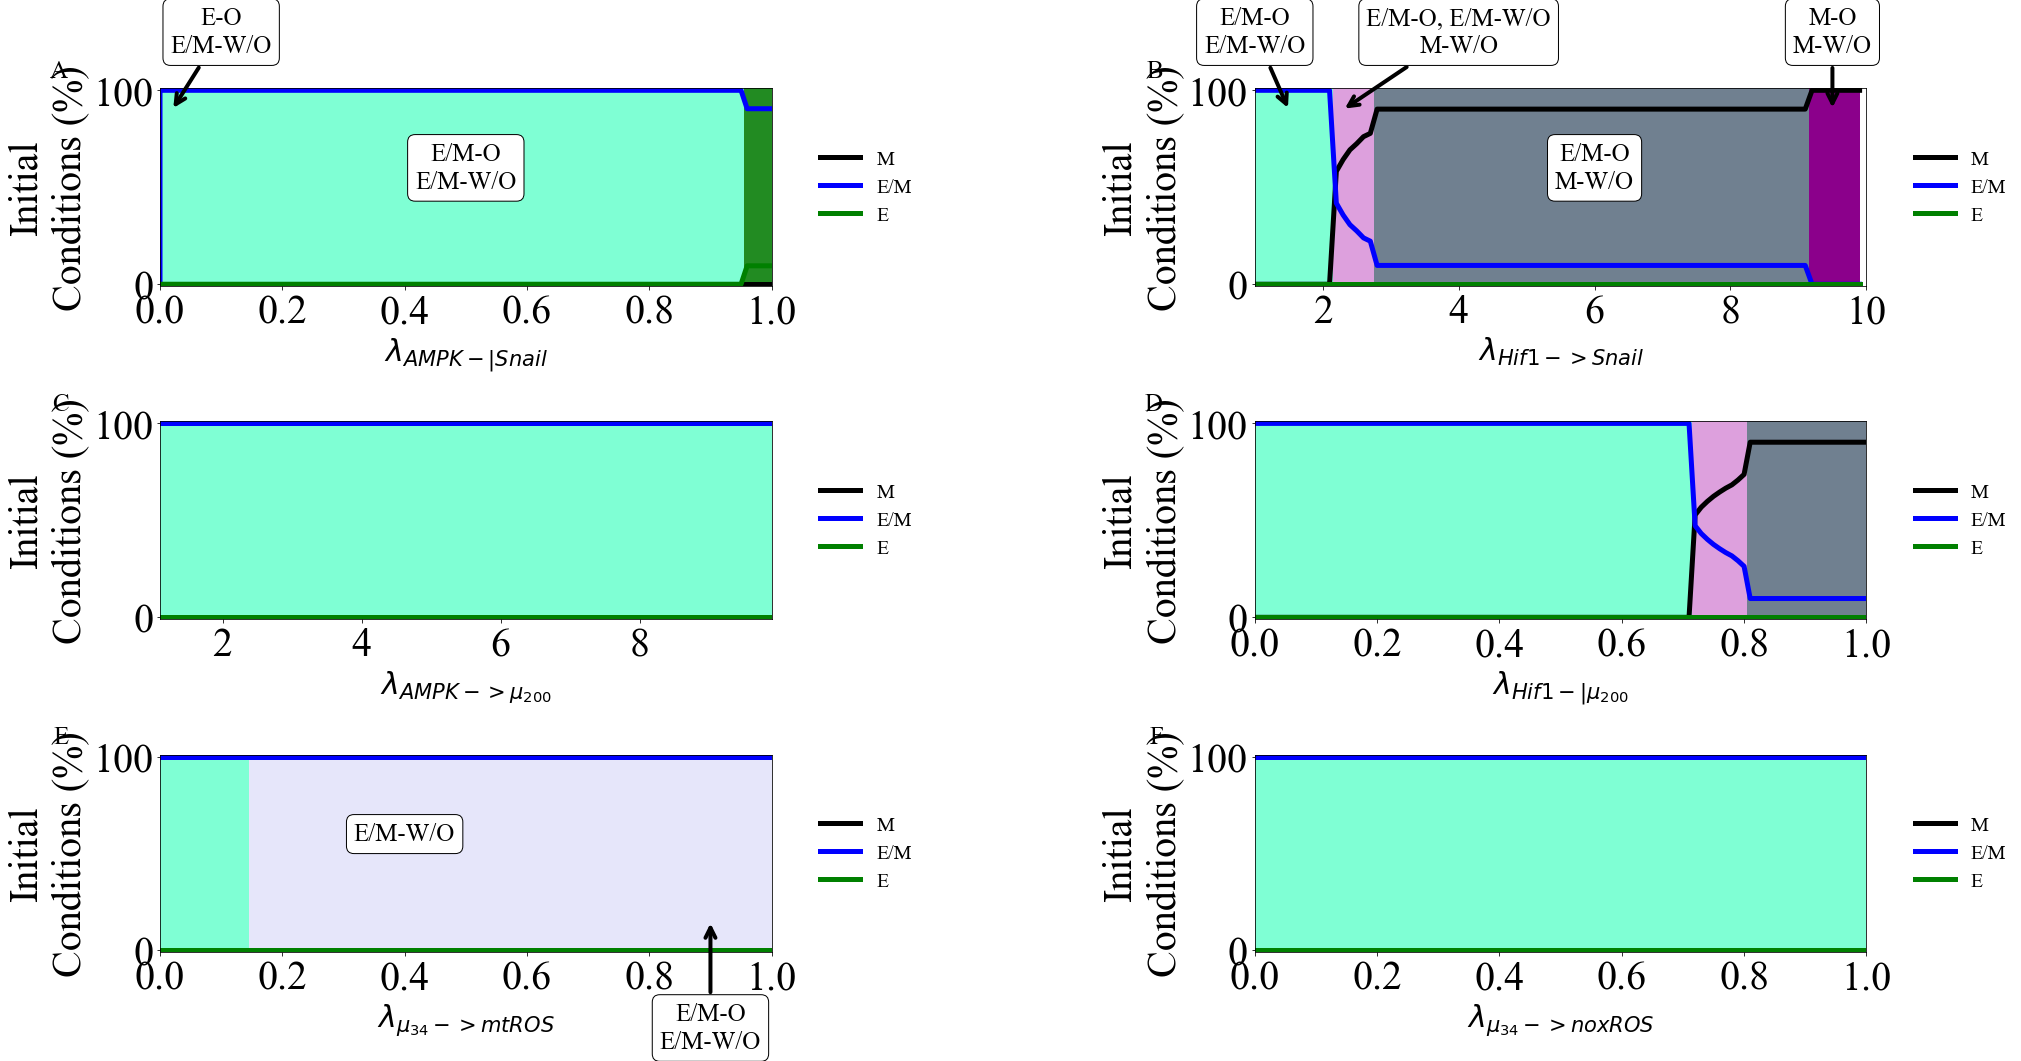

In [35]:
fig = plt.figure(figsize=(6,4))
gs1 = gridspec.GridSpec(5,3, height_ratios=[1,0.6,1,0.6,1], width_ratios=[1,0.7,1])
gs1.update(left=0.05, right=4, wspace=0.05,hspace=0.05,top=3.,bottom=0)
fs =40
matplotlib.rcParams.update({'font.size':fs})
matplotlib.rcParams.update({'hatch.linewidth':3})
##########

##########
##########
ax2b = plt.subplot(gs1[0,0])
plotPhaseICS(ax2b,'A',"data/data_PSF_AS",'EMT',xlabel="$\lambda_{AMPK-|Snail}$",xlim=[0,1])
ax2b.annotate('E-O\nE/M-W/O', fontsize=25,xy=(0.02, 90), xycoords="data",xytext=(0.1,130), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E/M-O\nE/M-W/O', fontsize=25,xy=(0.5, 60), xycoords="data",xytext=(0.5,60), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))

##########
ax2b = plt.subplot(gs1[0,2])
plotPhaseICS(ax2b,'B',"data/data_PSF_HS",'EMT',xlabel="$\lambda_{Hif1->Snail}$",xlim=[1,10])
ax2b.annotate('E/M-O\nE/M-W/O', fontsize=25,xy=(1.5, 90), xycoords="data",xytext=(1,130), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E/M-O, E/M-W/O\nM-W/O', fontsize=25,xy=(2.3, 90), xycoords="data",xytext=(4,130), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E/M-O\nM-W/O', fontsize=25,xy=(6, 60), xycoords="data",xytext=(6,60), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('M-O\nM-W/O', fontsize=25,xy=(9.5, 90), xycoords="data",xytext=(9.5,130), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))

ax2b = plt.subplot(gs1[2,0])
plotPhaseICS(ax2b,'C',"data/data_PSF_Au",'EMT',xlabel="$\lambda_{AMPK->\mu_{200}}$",xlim=[1.1,9.9])

ax2b = plt.subplot(gs1[2,2])
plotPhaseICS(ax2b,'D',"data/data_PSF_Hu",'EMT',xlabel="$\lambda_{Hif1-|\mu_{200}}$",xlim=[0,1])

ax2b = plt.subplot(gs1[4,0])
plotPhaseICS(ax2b,'E',"data/data_PSF_u3m",'EMT',xlabel="$\lambda_{\mu_{34}->mtROS}$",xlim=[0,1])
ax2b.annotate('E/M-O\nE/M-W/O', fontsize=25,xy=(0.9, 15), xycoords="data",xytext=(0.9,-40), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))
ax2b.annotate('E/M-W/O', fontsize=25,xy=(0.4, 60), xycoords="data",xytext=(0.4,60), textcoords="data",va="center", ha='center',bbox=dict(boxstyle="round", fc="w"),arrowprops=dict(arrowstyle="->",lw=4))

ax2b = plt.subplot(gs1[4,2])
plotPhaseICS(ax2b,'F',"data/data_PSF_u3n",'EMT',xlabel="$\lambda_{\mu_{34}->noxROS}$",xlim=[0,1])

#fig.savefig("Figure_oldS28.png",bbox_inches='tight')#,dpi=300)

# Figures old S29
## Full for 7c

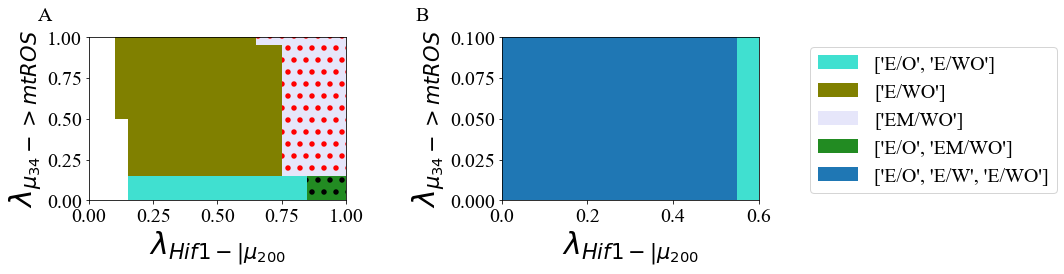

In [36]:
fig = plt.figure(figsize=(12,3))
gs1 = gridspec.GridSpec(1,3, height_ratios=[1], width_ratios=[1,0.3,1])
fs =20
matplotlib.rcParams.update({'font.size':fs})
matplotlib.rcParams.update({'hatch.linewidth':3})
##########

##########
##########
ax2b = plt.subplot(gs1[0,0])
l1=plotPhases(ax2b,'',"data/data_7cPSF","$\lambda_{Hif1-|\mu_{200}}$","$\lambda_{\mu_{34}->mtROS}$",reduced=False,ylim=[0,1],xlim=(0,1),legend='return',legendLoc=(2,1))
ax2b.text(-0.2,1.1,'A',fontsize=fs)
##########

ax2b = plt.subplot(gs1[0,2])
l2=plotPhases(ax2b,'',"data/data_4cComp","$\lambda_{Hif1-|\mu_{200}}$","$\lambda_{\mu_{34}->mtROS}$",reduced=False,ylim=[0,0.1],xlim=(0,0.6),legend='return',legendLoc=(2,1))
##########
ax2b.text(-0.2,0.11,'B',fontsize=fs)

checks=[]
legend_elements=[]
for i in range(len(l1[1])): 
    item = l1[1][i]
    col=l1[0][i]
    if item not in checks:
        legend_elements+=[ Patch(facecolor=col,label=item)]
        checks+=[item]
for i in range(len(l2[1])):
    item = l2[1][i]
    col=l2[0][i]
    if item not in checks:
        legend_elements+=[ Patch(facecolor=col,label=item)]
        checks+=[item]
        
ax2b.legend(handles=legend_elements, bbox_to_anchor=(2.2,1.))

#fig.savefig("Figure_S29.png",bbox_inches='tight')#,dpi=300)

(['lightsteelblue', 'dodgerblue', 'chocolate', 'darkgreen'], [['EM/O', 'M/O', 'M/W', 'M/WO'], ['M/O', 'M/W', 'M/WO'], ['EM/O', 'EM/W', 'EM/WO', 'M/O', 'M/W', 'M/WO'], ['EM/O', 'EM/WO', 'M/O', 'M/W', 'M/WO']])


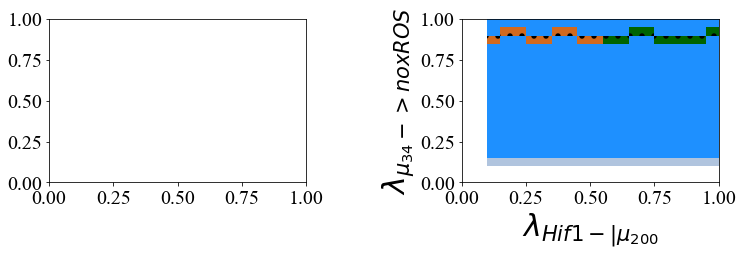

In [37]:
fig = plt.figure(figsize=(12,3))
gs1 = gridspec.GridSpec(1,3, height_ratios=[1], width_ratios=[1,0.3,1])
fs =20
matplotlib.rcParams.update({'font.size':fs})
matplotlib.rcParams.update({'hatch.linewidth':3})
##########

##########
##########
ax2b = plt.subplot(gs1[0,0])

ax2b = plt.subplot(gs1[0,2])
l2=plotPhases(ax2b,'',"data/data_u3nHuInput","$\lambda_{Hif1-|\mu_{200}}$","$\lambda_{\mu_{34}->noxROS}$",reduced=False,ylim=[0,1],xlim=(0,1),legend='return',legendLoc=(2,1))
print l2

# Figure old S4
## A- shows original metabolism values
## B- shows metabolism values with miRNA reg


rerun the code and also print out the fixed points

        ###  code in ~/Research/EMT_MR/understanding/checks/metabolism_HMRNA/final_par
        ### and ~/Research/EMT_MR/understanding/checks/metabolism


IOError: [Errno 2] No such file or directory: '/home/madeline/Research/EMT_MR/understanding/checks/metabolism/null_oncotarget.png'

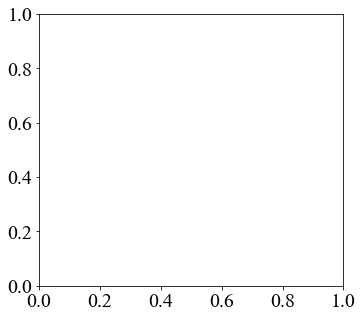

In [38]:
fig = plt.figure(figsize=(12,5))#figsize=(8,13))
gs1 = gridspec.GridSpec(1,2)#5, 3, height_ratios=[1,0.5,1.,0.7,1.], width_ratios=[1.2,0.3,0.6])
#gs1.update(left=0.05, right=4, wspace=0.05,hspace=0.05,top=2,bottom=0)
fs =20
matplotlib.rcParams.update({'font.size':fs})


ax1 = plt.subplot(gs1[0,0])

img = Image.open('/home/madeline/Research/EMT_MR/understanding/checks/metabolism/null_oncotarget.png')
img.resize((1,1))
a = np.asarray(img)
ax1.imshow(a)
ax1.axis("off")
ax1.text(-0.1, 1.05, 'A',transform=ax1.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs)


ax2 = plt.subplot(gs1[0,1])

img = Image.open('/home/madeline/Research/EMT_MR/understanding/checks/metabolism_HMRNA/final_par/null_finalPar.png')
img.resize((1,1))
a = np.asarray(img)
ax2.imshow(a)
ax2.axis("off")
ax2.text(-0.1, 1.05, 'B',transform=ax2.transAxes,verticalalignment='top', horizontalalignment='right',color='black', fontsize=fs)



##fig.savefig("oldFigure_S4.png",bbox_inches='tight')#,dpi=300)